In [1]:
# Required libraries, use pip install -r requirements.txt to install all dependencies
# Basic Data Handling and Scientific Computing Libraries
import numpy as np  # numerical operations
import pandas as pd  # data manipulation and analysis
import math # numerical operations

# Data Visualization Libraries
import matplotlib.pyplot as plt  # creating visualizations
import seaborn as sns  # data visualization based on matplotlib

# Scikit-learn for Machine Learning Models & Metrics
from sklearn.model_selection import train_test_split, KFold, GridSearchCV  # splitting datasets, cross-validation, and hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier  # the Random Forest classification model
from sklearn.svm import SVC  # Support Vector Classification model
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score)  # various evaluation metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder  # data scaling and encoding
from sklearn.inspection import permutation_importance  # feature importance

# TensorFlow and Keras for Neural Networks
import tensorflow as tf  # TensorFlow, for building and training neural network models
from tensorflow import keras  
from tensorflow.keras.models import Sequential  # linear stack of layers in neural networks
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv2D, Flatten, BatchNormalization, Activation  # neural network layers
from tensorflow.keras.regularizers import l1_l2  # L1 and L2 regularization
from tensorflow.keras.optimizers import Adam  # Optimizer for training neural networks

# LightGBM for Gradient Boosting
import lightgbm as lgb  

# SHAP for Model output explaination
import shap  

# Concurrent Futures for Parallel Processing (Not used)
import concurrent.futures
from concurrent.futures import ThreadPoolExecutor  

# Miscellaneous Utilities
import gc  # Garbage Collection to manage memory
import time  # measuring time
import socket  # socket operations
import struct  # converting between Python values and C structs
from typing import Optional  # type hinting
from scipy.stats import mode # mode function

# Set Pandas Display Options
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Use maximum width for displaying
pd.set_option('display.max_colwidth', None)  # Display full width of columns


In [2]:
# Importing the dataset (make sure to use the correct path)
file_path = "ddos_balanced/final_dataset.csv"
df = pd.read_csv(file_path)

# Display the first 5 rows of the dataframe and its shape
print(f"\nDataFrame shape: {df.shape}\n")
df.head()


DataFrame shape: (12794627, 85)



Unnamed: 0                               Flow ID         Src IP  Src Port  \
0         624  192.168.4.118-203.73.24.75-4504-80-6  192.168.4.118      4504   
1         625  192.168.4.118-203.73.24.75-4504-80-6  192.168.4.118      4504   
2         626  192.168.4.118-203.73.24.75-4505-80-6  192.168.4.118      4505   
3         627  192.168.4.118-203.73.24.75-4505-80-6  192.168.4.118      4505   
4         628  192.168.4.118-203.73.24.75-4506-80-6  192.168.4.118      4506   

         Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0  203.73.24.75        80         6  12/06/2010 08:34:32 AM        3974862   
1  203.73.24.75        80         6  12/06/2010 08:34:36 AM             63   
2  203.73.24.75        80         6  12/06/2010 08:34:36 AM         476078   
3  203.73.24.75        80         6  12/06/2010 08:34:37 AM            151   
4  203.73.24.75        80         6  12/06/2010 08:34:37 AM         472507   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0            29            44             86.0          59811.0   
1             1             1              0.0              0.0   
2             2             6             86.0           3037.0   
3             2             1              0.0              0.0   
4             2             5             73.0           1050.0   

   Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
0             86.0              0.0          2.965517        15.969799   
1              0.0              0.0          0.000000         0.000000   
2             86.0              0.0         43.000000        60.811183   
3              0.0              0.0          0.000000         0.000000   
4             73.0              0.0         36.500000        51.618795   

   Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  \
0           1460.0              0.0       1359.340909       372.027190   
1              0.0              0.0          0.000000         0.000000   
2           1460.0              0.0        506.166667       740.224403   
3              0.0              0.0          0.000000         0.000000   
4           1050.0              0.0        210.000000       469.574275   

    Flow Byts/s   Flow Pkts/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  \
0  15068.950821     18.365417   55206.416667  195478.316654     1566821.0   
1      0.000000  31746.031746      63.000000       0.000000          63.0   
2   6559.849436     16.803969   68011.142857  110862.707451      232203.0   
3      0.000000  19867.549669      75.500000      98.287843         145.0   
4   2376.684367     14.814595   78751.166667  118675.492251      232355.0   

   Flow IAT Min  Fwd IAT Tot  Fwd IAT Mean    Fwd IAT Std  Fwd IAT Max  \
0         167.0    3735347.0     133405.25  341775.688712    1805015.0   
1          63.0          0.0          0.00       0.000000          0.0   
2           6.0        134.0        134.00       0.000000        134.0   
3           6.0        145.0        145.00       0.000000        145.0   
4           7.0        179.0        179.00       0.000000        179.0   

   Fwd IAT Min  Bwd IAT Tot   Bwd IAT Mean    Bwd IAT Std  Bwd IAT Max  \
0        167.0    3974862.0   92438.651163  248174.820574    1566821.0   
1          0.0          0.0       0.000000       0.000000          0.0   
2        134.0     476078.0   95215.600000  123467.303580     232601.0   
3        145.0          0.0       0.000000       0.000000          0.0   
4        179.0     472507.0  118126.750000  131726.857333     232875.0   

   Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  Fwd URG Flags  Bwd URG Flags  \
0       3997.0              0              0              0              0   
1          0.0              0              0              0              0   
2          6.0              0              0              0              0   
3          0.0              0              0              0              0   
4          7.0   

In [22]:
# Printing the first 100 samples to a .csv file

# Select the first 100 samples
subset_data = df.head(100)

# Save this subset to a new CSV file
subset_data.to_csv('first_100_samples.csv', index=False)

In [3]:
# Verifying the Dataset

# number of rows and columns in the dataset.
print("Dataset Shape:", df.shape)

# concise summary of the df (datatypes)
df.info()

# Quick statistical summary of the numerical columns
df.describe()


Dataset Shape: (12794627, 85)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12794627 entries, 0 to 12794626
Data columns (total 85 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Flow ID            object 
 2   Src IP             object 
 3   Src Port           int64  
 4   Dst IP             object 
 5   Dst Port           int64  
 6   Protocol           int64  
 7   Timestamp          object 
 8   Flow Duration      int64  
 9   Tot Fwd Pkts       int64  
 10  Tot Bwd Pkts       int64  
 11  TotLen Fwd Pkts    float64
 12  TotLen Bwd Pkts    float64
 13  Fwd Pkt Len Max    float64
 14  Fwd Pkt Len Min    float64
 15  Fwd Pkt Len Mean   float64
 16  Fwd Pkt Len Std    float64
 17  Bwd Pkt Len Max    float64
 18  Bwd Pkt Len Min    float64
 19  Bwd Pkt Len Mean   float64
 20  Bwd Pkt Len Std    float64
 21  Flow Byts/s        float64
 22  Flow Pkts/s        float64
 23  Flow IAT Mean      float64
 24  Flow IAT Std      

invalid value encountered in subtract
invalid value encountered in subtract


Unnamed: 0      Src Port      Dst Port      Protocol  Flow Duration  \
count  1.279463e+07  1.279463e+07  1.279463e+07  1.279463e+07   1.279463e+07   
mean   2.662390e+06  3.707054e+04  1.464290e+04  7.828588e+00   8.219593e+06   
std    2.169382e+06  2.521985e+04  2.306383e+04  4.206168e+00   2.477327e+07   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  -1.000000e+00   
25%    8.984830e+05  4.430000e+02  8.000000e+01  6.000000e+00   1.262000e+03   
50%    2.040991e+06  5.059200e+04  8.000000e+01  6.000000e+00   3.206500e+04   
75%    3.903946e+06  5.621500e+04  3.855000e+04  6.000000e+00   4.159736e+06   
max    7.902474e+06  6.553500e+04  6.553500e+04  1.700000e+01   1.200000e+08   

       Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
count  1.279463e+07  1.279463e+07     1.279463e+07     1.279463e+07   
mean   2.719636e+01  4.974281e+00     1.125726e+03     3.264955e+03   
std    1.720577e+03  2.509204e+02     5.479157e+04     5.387678e+05   
min    0.000000e+00  0.000000e+00     0.000000e+00     0.000000e+00   
25%    1.000000e+00  1.000000e+00     0.000000e+00     0.000000e+00   
50%    2.000000e+00  1.000000e+00     4.200000e+01     1.120000e+02   
75%    4.000000e+00  4.000000e+00     9.350000e+02     3.580000e+02   
max    3.096280e+05  2.919230e+05     9.908096e+06     6.554527e+08   

       Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
count     1.279463e+07     1.279463e+07      1.279463e+07     1.279463e+07   
mean      2.922581e+02     7.095577e+00      7.622126e+01     1.307921e+02   
std       3.931045e+02     1.974606e+01      9.438475e+01     1.890678e+02   
min       0.000000e+00     0.000000e+00      0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00      0.000000e+00     0.000000e+00   
50%       4.000000e+01     0.000000e+00      3.600000e+01     0.000000e+00   
75%       6.770000e+02     0.000000e+00      1.420000e+02     2.226233e+02   
max       2.336000e+04     1.472000e+03      4.660441e+03     7.137621e+03   

       Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  \
count     1.279463e+07     1.279463e+07      1.279463e+07     1.279463e+07   
mean      3.010289e+02     1.694692e+01      9.189324e+01     1.224332e+02   
std       4.431349e+02     4.253935e+01      1.414036e+02     1.813809e+02   
min       0.000000e+00     0.000000e+00      0.000000e+00     0.000000e+00   
25%       0.000000e+00     0.000000e+00      0.000000e+00     0.000000e+00   
50%       1.000000e+02     0.000000e+00      6.800000e+01     0.000000e+00   
75%       3.500000e+02     0.000000e+00      1.136667e+02     1.805000e+02   
max       6.516000e+04     3.684000e+03      3.037508e+04     2.244841e+04   

        Flow Byts/s   Flow Pkts/s  Flow IAT Mean  Flow IAT Std  Flow IAT Max  \
count  1.276491e+07  1.279463e+07   1.279463e+07  1.279463e+07  1.279463e+07   
mean            inf           inf   1.858787e+06  9.547560e+05  4.340038e+06   
std             NaN           NaN   8.888754e+06  3.430755e+06  1.302173e+07   
min    0.000000e+00 -2.000000e+06  -1.000000e+00  0.000000e+00 -1.000000e+00   
25%    0.000000e+00  2.215615e+00   9.458333e+02  0.000000e+00  1.053000e+03   
50%    2.937508e+02  8.807081e+01   1.892533e+04  2.510229e+02  3.004600e+04   
75%    1.221405e+04  2.042206e+03   5.077293e+05  4.565057e+05  3.894914e+06   
max             inf           inf   1.199993e+08  8.480808e+07  1.199997e+08   

       Flow IAT Min   Fwd IAT Tot  Fwd IAT Mean   Fwd IAT Std   Fwd IAT Max  \
count  1.279463e+07  1.279463e+07  1.279463e+07  1.279463e+07  1.279463e+07   
mean   1.450054e+06  7.144639e+06  1.909381e+06  7.337939e+05  3.354991e+06   
std    8.795806e+06  2.448516e+07  8.982503e+06  3.547276e+06  1.233305e+07   
min   -1.300000e+01  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    5.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    4.700000e+01  1.272000e+03  4.573333e+02

In [3]:
# Analyzing the Dataset for missing/infinite values

# Set thresholds
MISSING_VALUES_COLUMN_THRESHOLD = 0.5  # 50% of data missing
INFINITE_VALUES_THRESHOLD = 0.1        # 10% of data is infinite
MISSING_VALUES_ROW_THRESHOLD = 0.5     # 50% of data missing

# Calculate missing and infinite values in one go
numeric_cols = df.select_dtypes(include=[np.number]).columns
missing_values = df.isna().sum()
infinite_values = np.isinf(df[numeric_cols]).sum()

# Combine percentages calculation
total_values = len(df)
missing_percentages = missing_values / total_values
infinite_percentages = infinite_values / total_values

# Determine columns to drop
columns_to_drop = missing_percentages[(missing_percentages > MISSING_VALUES_COLUMN_THRESHOLD) | (infinite_percentages > INFINITE_VALUES_THRESHOLD)]
columns_to_drop_df = pd.DataFrame({'Missing Percentage': missing_percentages[columns_to_drop.index], 'Infinite Percentage': infinite_percentages[columns_to_drop.index]}).fillna(0)

# Identify columns for missing and infinite values separately for imputation
moderate_missing_cols = missing_percentages[(missing_percentages > 0) & (missing_percentages <= MISSING_VALUES_COLUMN_THRESHOLD)]
moderate_infinite_cols = infinite_percentages[(infinite_percentages > 0) & (infinite_percentages <= INFINITE_VALUES_THRESHOLD)]

# Combine the columns (use union of indices)
columns_for_imputation_set = set(moderate_missing_cols.index).union(set(moderate_infinite_cols.index))

# Convert the set to a list for DataFrame creation
columns_for_imputation_list = list(columns_for_imputation_set)

# Create DataFrame for columns to impute
columns_for_imputation_df = pd.DataFrame(index=columns_for_imputation_list)
columns_for_imputation_df['Missing Percentage'] = missing_percentages[columns_for_imputation_df.index]
columns_for_imputation_df['Infinite Percentage'] = infinite_percentages[columns_for_imputation_df.index]
columns_for_imputation_df.fillna(0, inplace=True)  # Fill NaN with 0 for readability

# Analyze rows for missing values
rows_to_drop_df = pd.DataFrame(df.isna().sum(axis=1) / df.shape[1], columns=['Missing Values Proportion'])
rows_to_drop_df = rows_to_drop_df[rows_to_drop_df['Missing Values Proportion'] > MISSING_VALUES_ROW_THRESHOLD]

# Print results
print(f"\nColumns with High Missing/Infinite Values (To Drop): {len(columns_to_drop_df)}")
if not(columns_to_drop_df.empty):
    print(columns_to_drop_df)
    
print(f"\nColumns with Moderate Missing/Infinite Values (Consider Imputation): {len(columns_for_imputation_df)}")
if not(columns_for_imputation_df.empty):
    print(columns_for_imputation_df)
    
print(f"\nTotal Number of Rows to Drop: {len(rows_to_drop_df)}")
if not(rows_to_drop_df.empty):
    print(rows_to_drop_df)

# Detailed count for missing and infinite values
missing_values_count = missing_values[missing_values > 0]
infinite_values_count = infinite_values[infinite_values > 0]
missing_values_df = pd.DataFrame(missing_values_count, columns=['Missing Values Count'])
infinite_values_df = pd.DataFrame(infinite_values_count, columns=['Infinite Values Count'])

if not missing_values_df.empty:
    print("\nMissing Values Count Before Imputation:\n", missing_values_df)
else:
    print("\nNo missing values detected.")

if not infinite_values_df.empty:
    print("\nInfinite Values Count in Numeric Columns Before Imputation:\n", infinite_values_df)
else:
    print("\nNo infinite values detected.")

# df.drop(columns=columns_to_drop_df.index, inplace=True)
# df.drop(index=rows_to_drop_df.index, inplace=True)



Columns with High Missing/Infinite Values (To Drop): 0

Columns with Moderate Missing/Infinite Values (Consider Imputation): 2
             Missing Percentage  Infinite Percentage
Flow Byts/s            0.002322             0.001412
Flow Pkts/s            0.000000             0.003734

Total Number of Rows to Drop: 0

Missing Values Count Before Imputation:
              Missing Values Count
Flow Byts/s                 29713

Infinite Values Count in Numeric Columns Before Imputation:
              Infinite Values Count
Flow Byts/s                  18067
Flow Pkts/s                  47780


In [4]:
# Imputation based on the skewness of the data in each column (mean, median)

# Function to display before and after imputation values for rows with missing/infinite values
def display_before_after_imputation(df, column, impute_function):
    print(f"Column: {column}")

    # Find rows with missing or infinite values
    missing_or_infinite_rows = df[column].isnull() | np.isinf(df[column])

    # Ensure there are missing/infinite values to impute
    if missing_or_infinite_rows.any():
        # Select a sample of indices with missing/infinite values
        sample_size = min(10, missing_or_infinite_rows.sum())
        sample_indices = missing_or_infinite_rows[missing_or_infinite_rows].sample(sample_size, random_state=0).index

        # Create a DataFrame to display before and after values
        sample_df = pd.DataFrame(index=sample_indices)
        sample_df['Before Imputation'] = df.loc[sample_indices, column]
        
        # Perform imputation on the original DataFrame
        df.loc[missing_or_infinite_rows, column] = impute_function(df[column].copy())
        
        sample_df['After Imputation'] = impute_function(df[column].copy()).loc[sample_indices]

        # Print the DataFrame
        print(sample_df)
        print("\n")
    else:
        print("No missing or infinite values to impute.")

# Extract columns from the DataFrame for imputation
columns_for_imputation = columns_for_imputation_df.index.tolist()

# Replace infinite values with NaN for numeric columns in the imputation list
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols_for_imputation = [col for col in columns_for_imputation if col in numeric_cols]
df[numeric_cols_for_imputation] = df[numeric_cols_for_imputation].replace([np.inf, -np.inf], np.nan)

# Impute missing values based on skewness
skewness_threshold = 0.5  # Threshold for considering a distribution as skewed
for col in columns_for_imputation:
    if col in numeric_cols:
        if abs(df[col].skew()) > skewness_threshold:
            display_before_after_imputation(df, col, lambda x: x.fillna(x.median()))
        else:
            display_before_after_imputation(df, col, lambda x: x.fillna(x.mean()))


Column: Flow Byts/s
          Before Imputation  After Imputation
9199155                 NaN         293.53479
8239370                 NaN         293.53479
6647435                 NaN         293.53479
11195294                NaN         293.53479
7196000                 NaN         293.53479
11116910                NaN         293.53479
10389617                NaN         293.53479
6685591                 NaN         293.53479
9392196                 NaN         293.53479
11883781                NaN         293.53479


Column: Flow Pkts/s
          Before Imputation  After Imputation
9199155                 NaN         86.075451
8239370                 NaN         86.075451
6647435                 NaN         86.075451
11195294                NaN         86.075451
7196000                 NaN         86.075451
11116910                NaN         86.075451
10389617                NaN         86.075451
6685591                 NaN         86.075451
9392196                 NaN         86

In [9]:
# Correlation Matrix Function
def plot_correlation_heatmap(df, figsize=(48, 32), cmap='coolwarm', title="Correlation Matrix"):
    # Selecting numeric columns and handling missing values
    numeric_df = df.select_dtypes(include=[np.number])
    
    # Feature names (column names of DataFrame)
    feature_names = numeric_df.columns

    # Compute the correlation matrix
    #corr_matrix = numeric_df.corr() # disabled pandas correlation due to being slower than numpy
    numeric_data = numeric_df.to_numpy()
    corr_matrix = np.corrcoef(numeric_data, rowvar=False)

    # Creating heatmap
    plt.figure(figsize=figsize)
    heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap,
                      square=True, linewidths=.5, cbar_kws={"shrink": .5},
                      xticklabels=feature_names, yticklabels=feature_names)  # Feature names as labels
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()

invalid value encountered in subtract
invalid value encountered in divide
invalid value encountered in divide


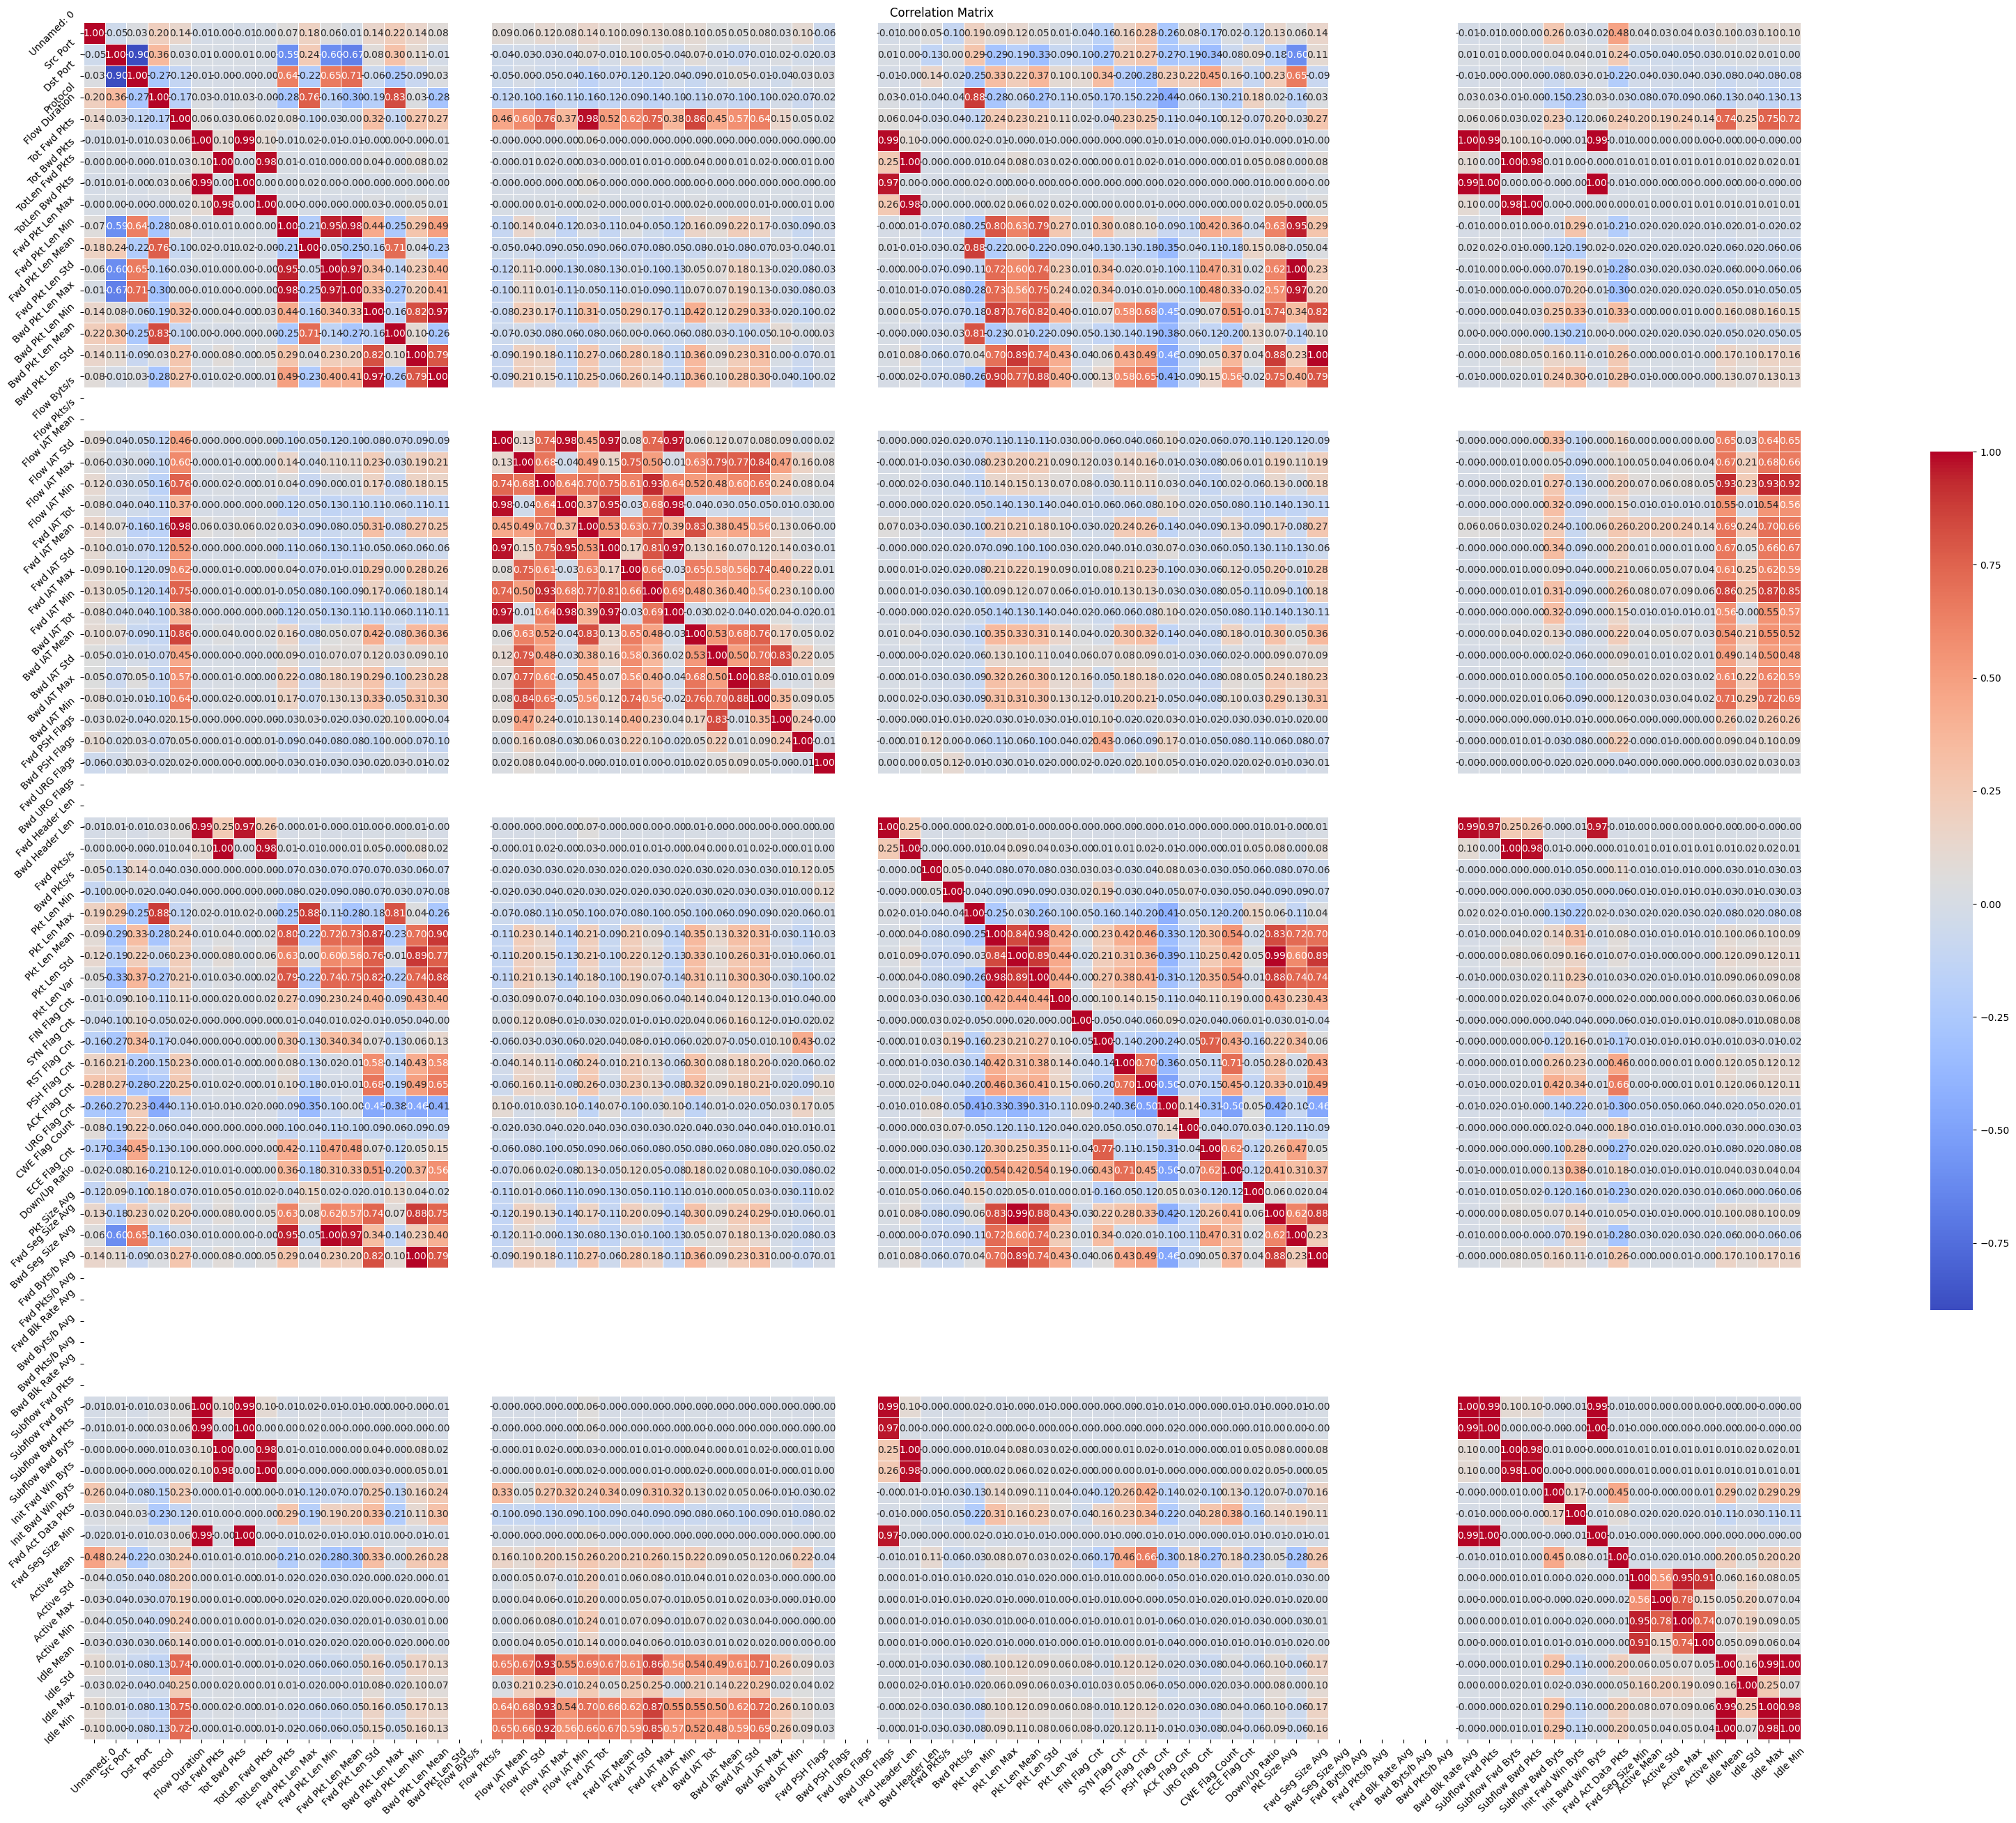

In [5]:
# Plotting correlation matrix
plot_correlation_heatmap(df)

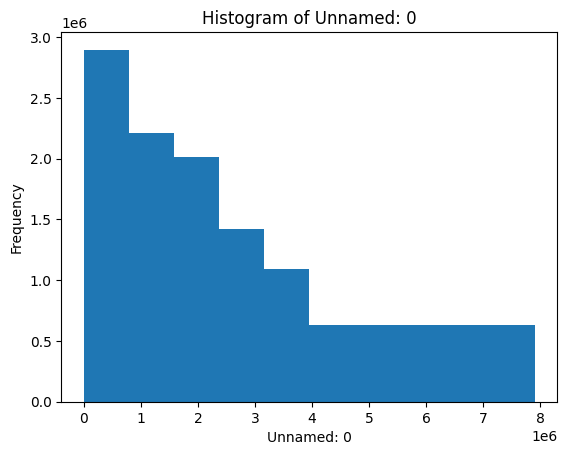

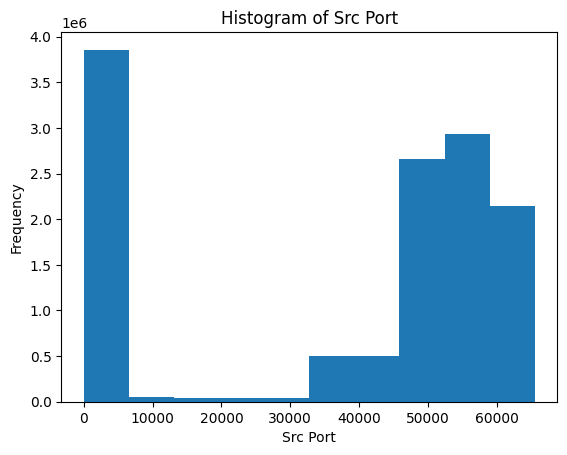

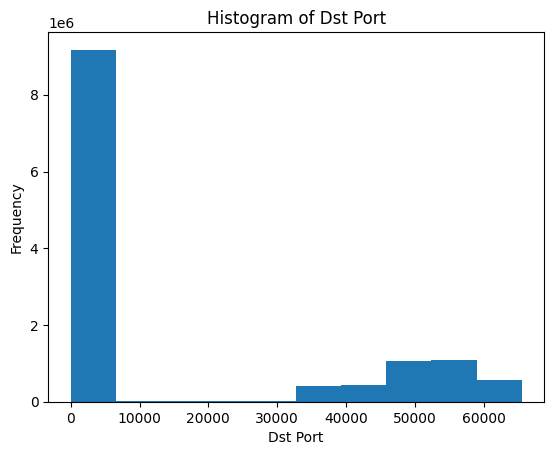

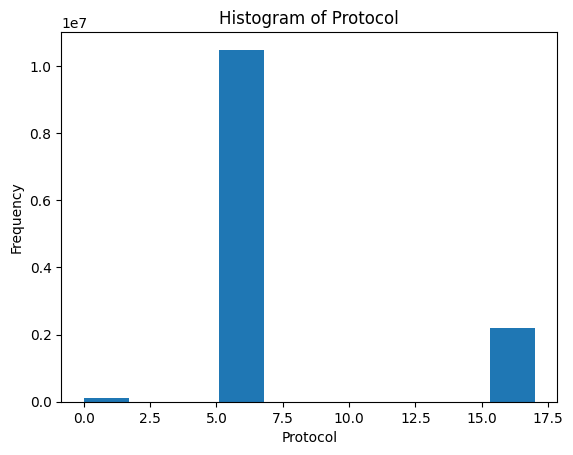

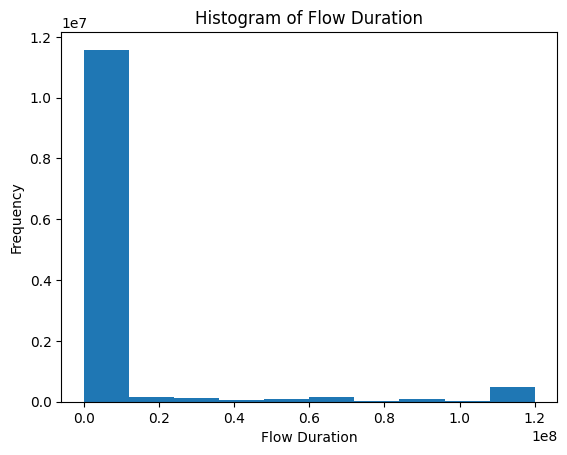

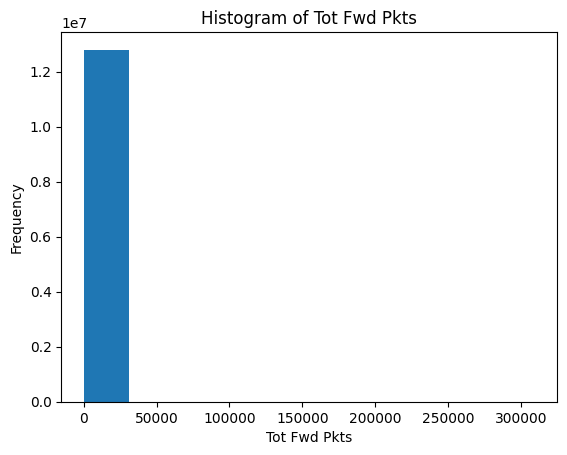

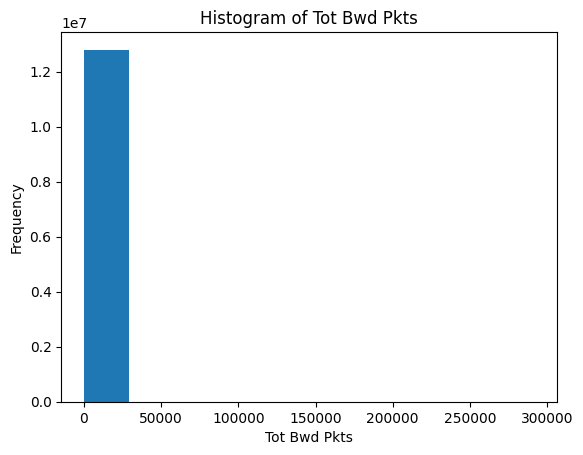

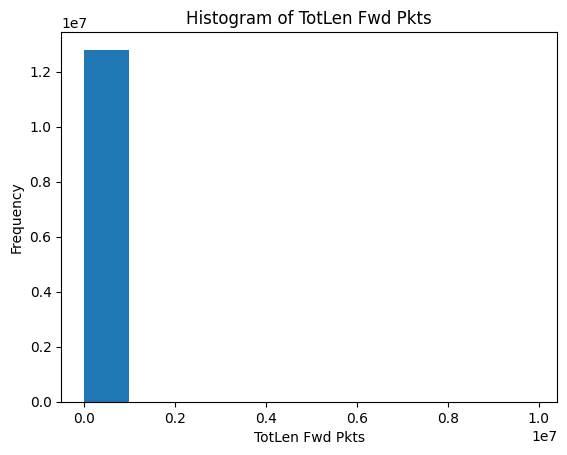

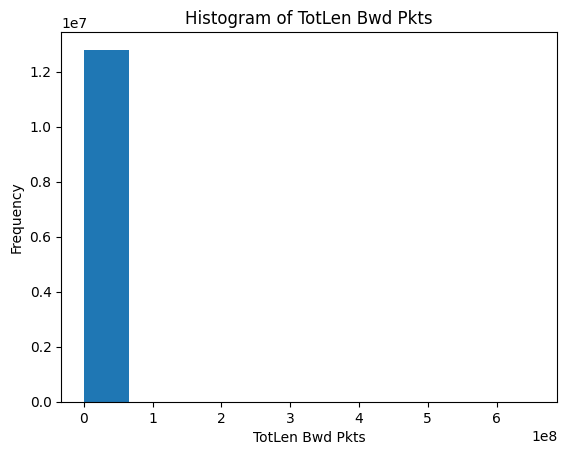

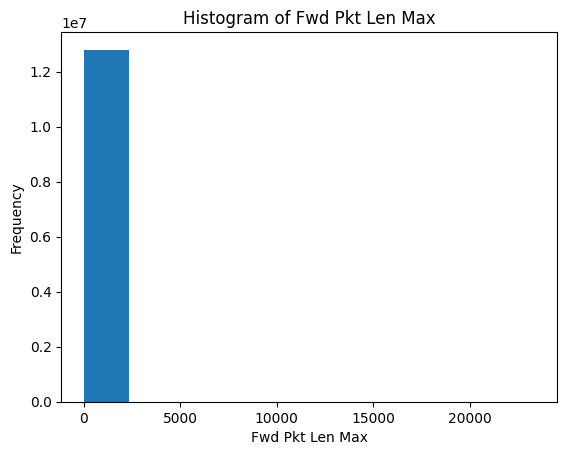

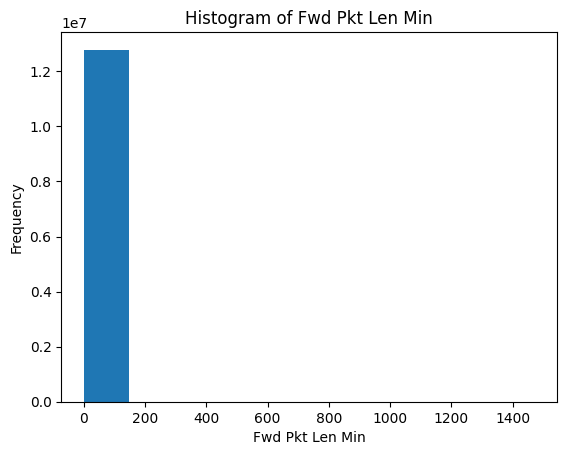

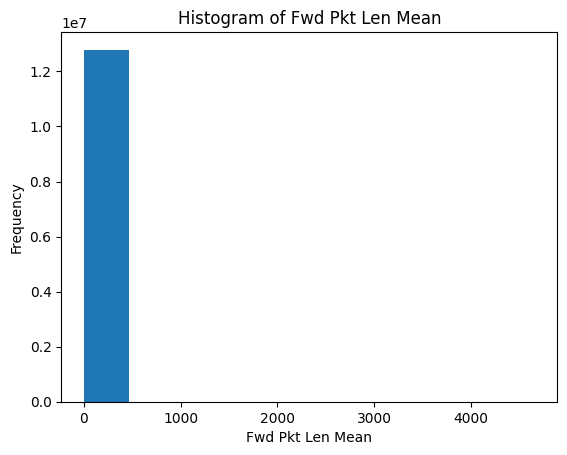

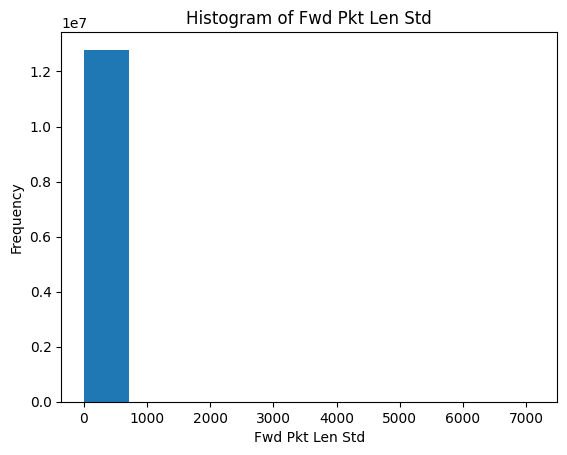

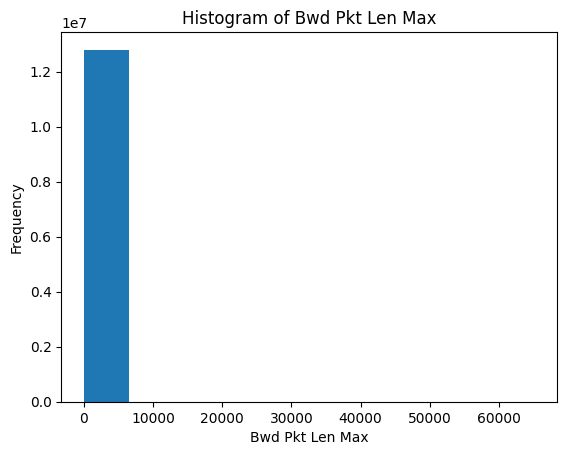

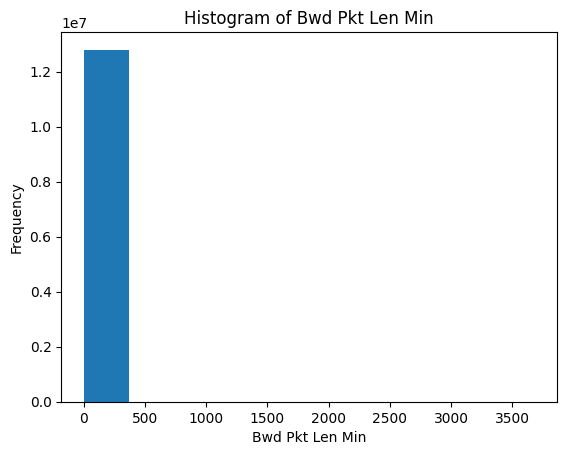

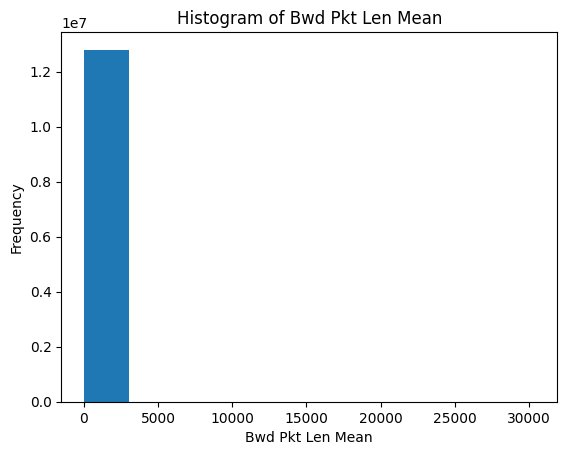

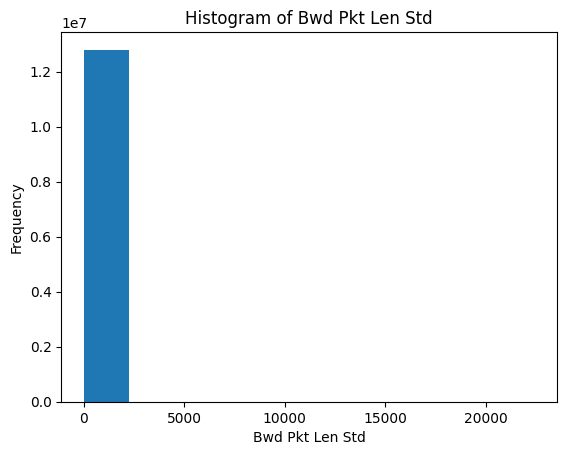

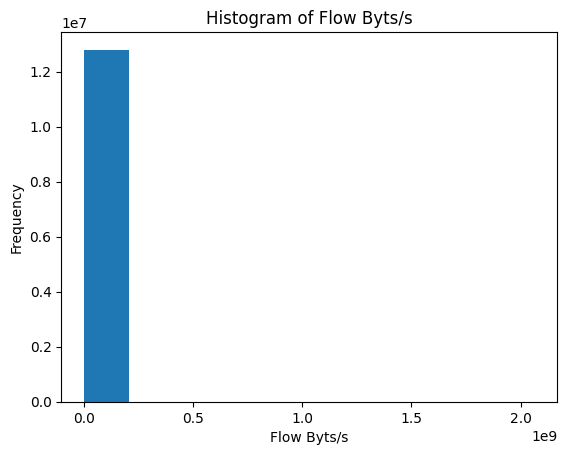

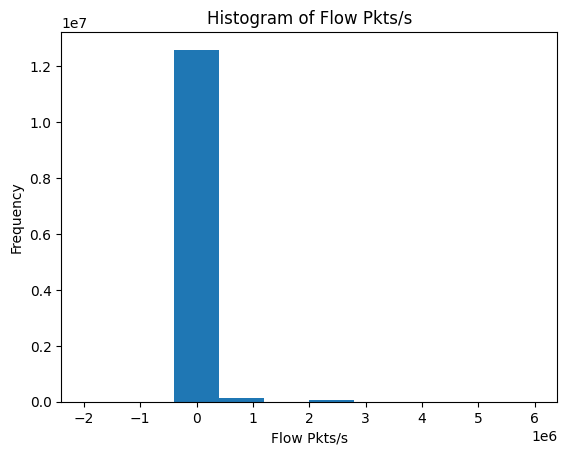

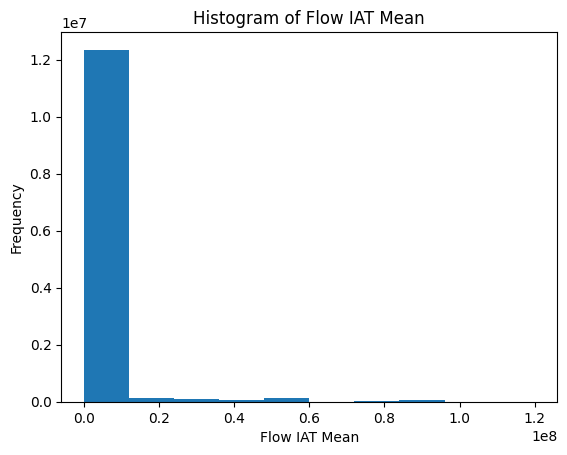

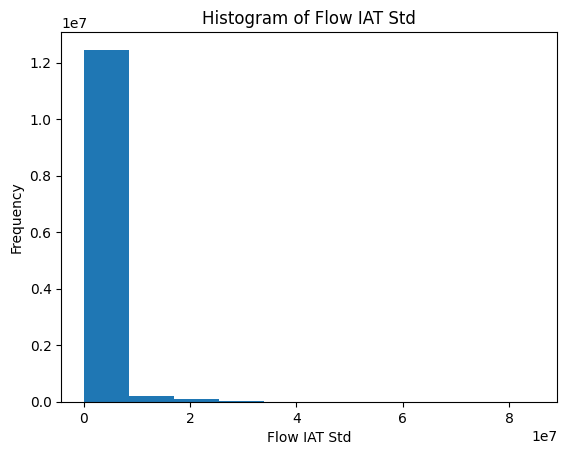

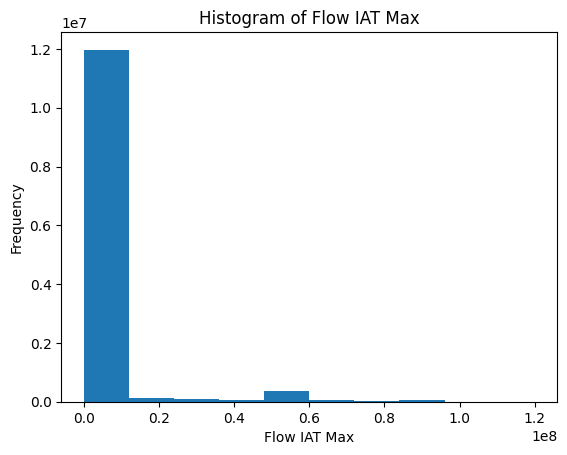

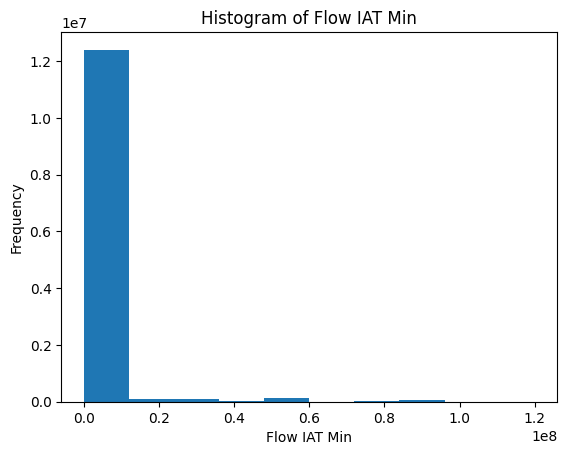

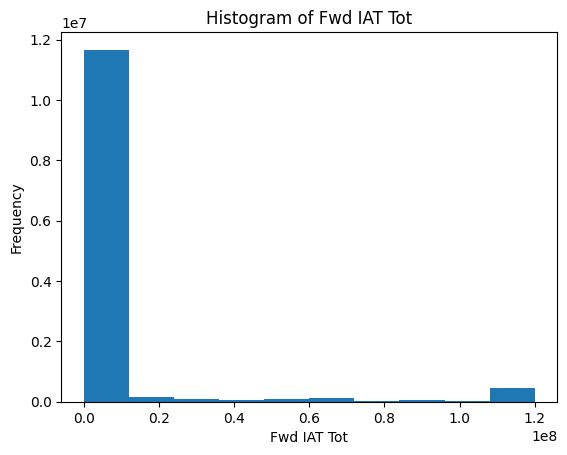

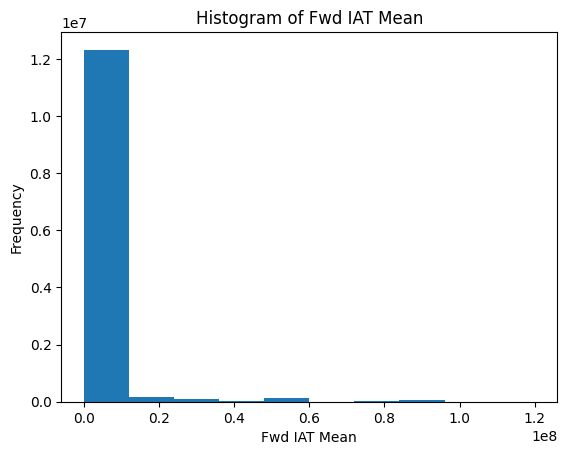

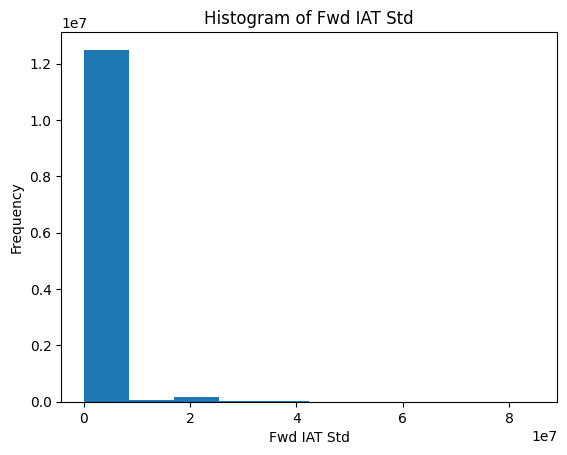

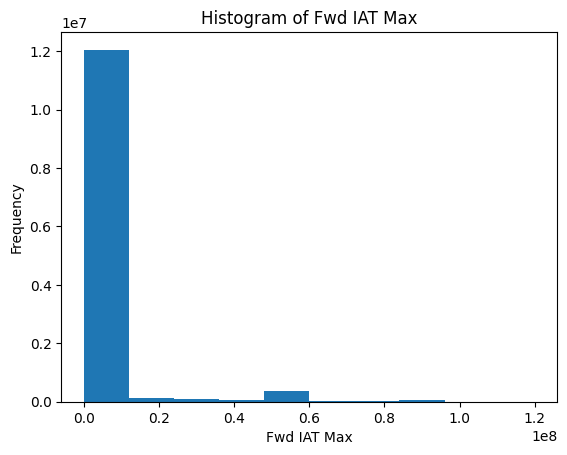

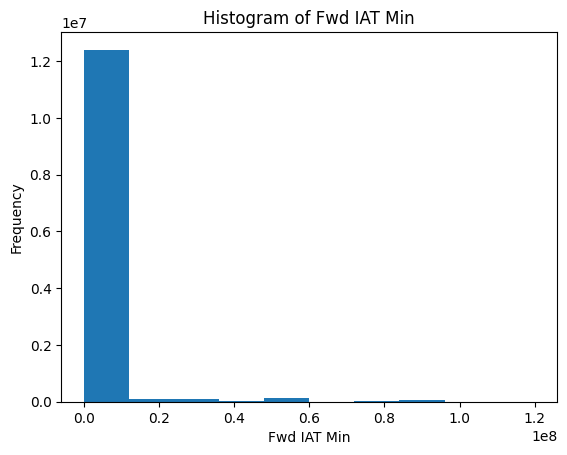

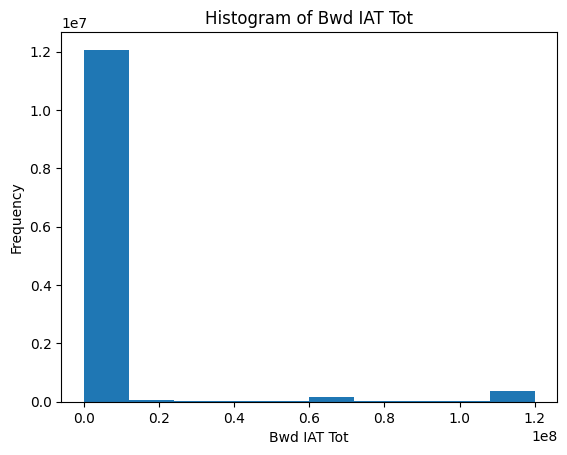

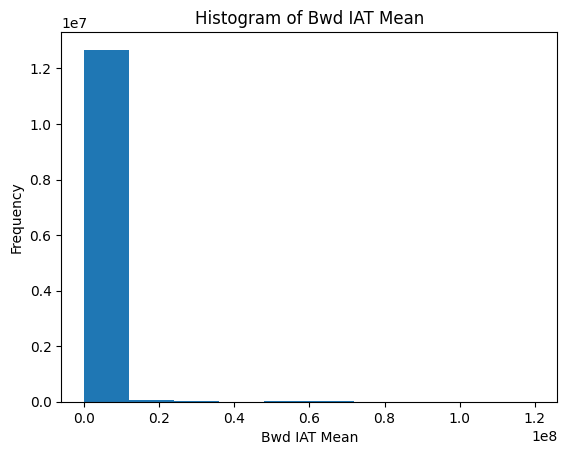

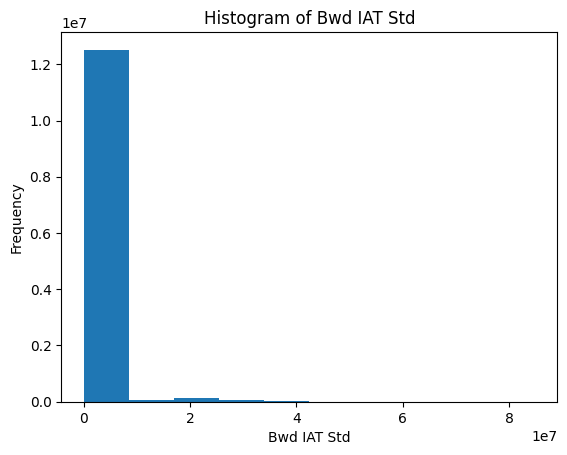

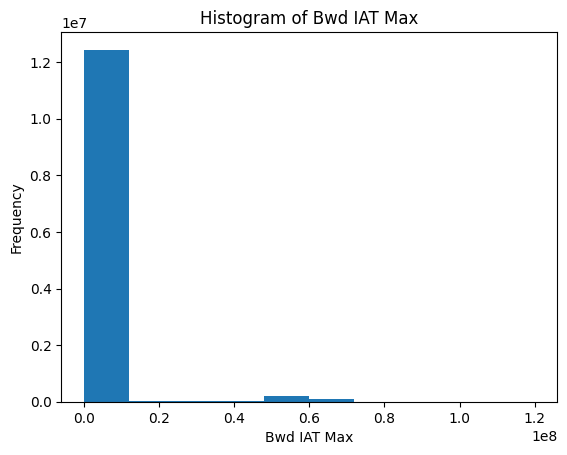

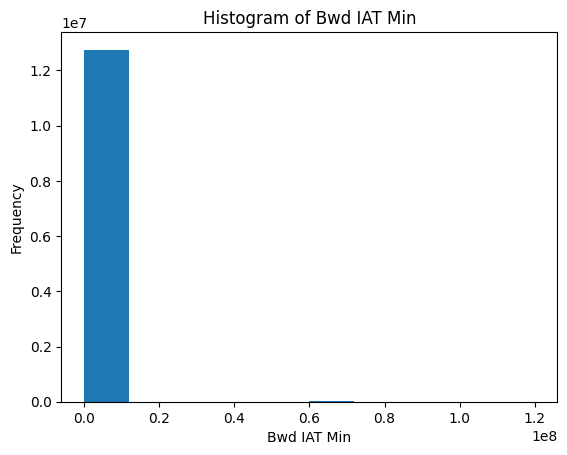

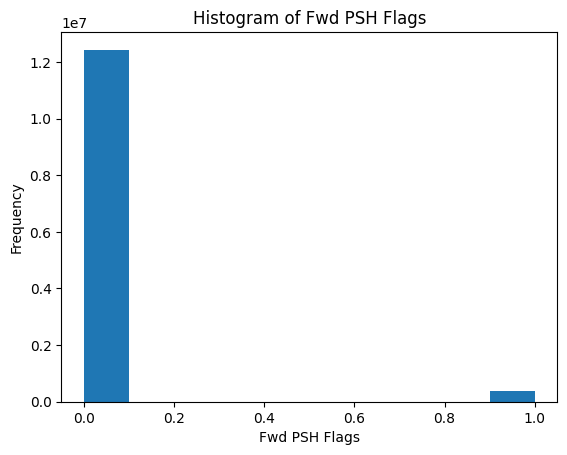

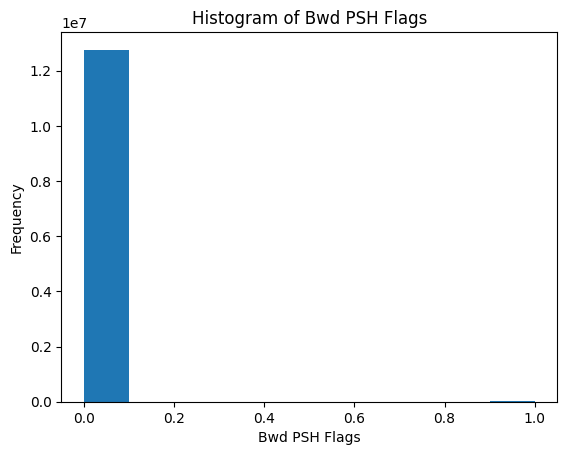

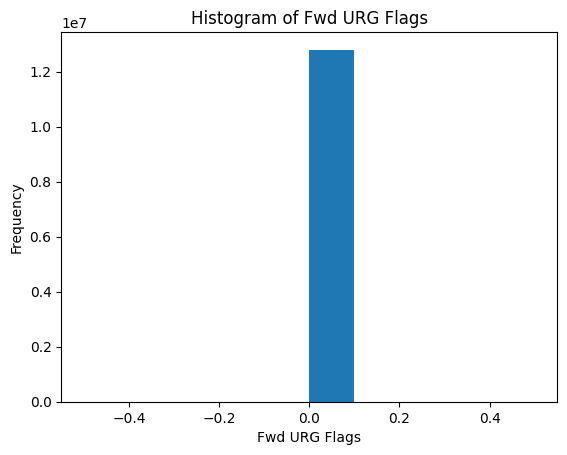

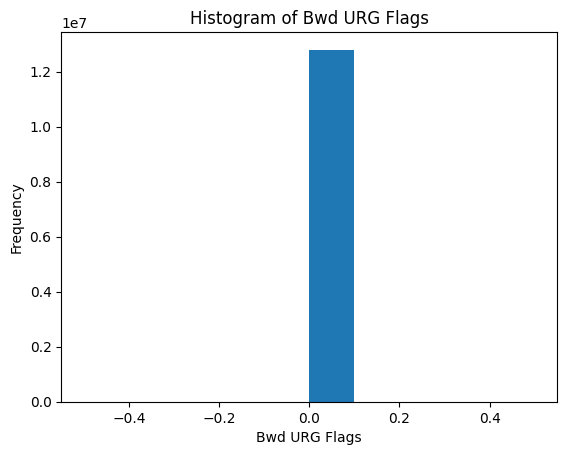

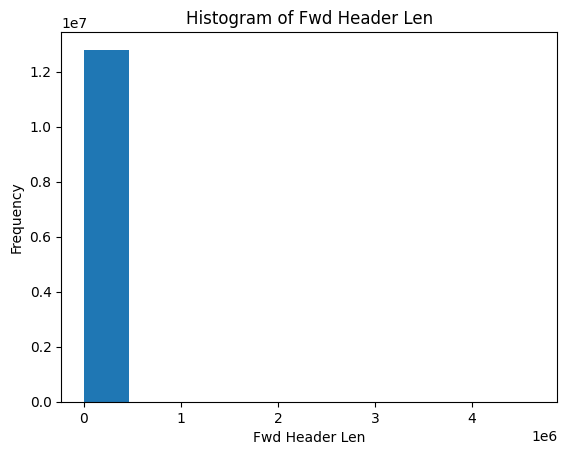

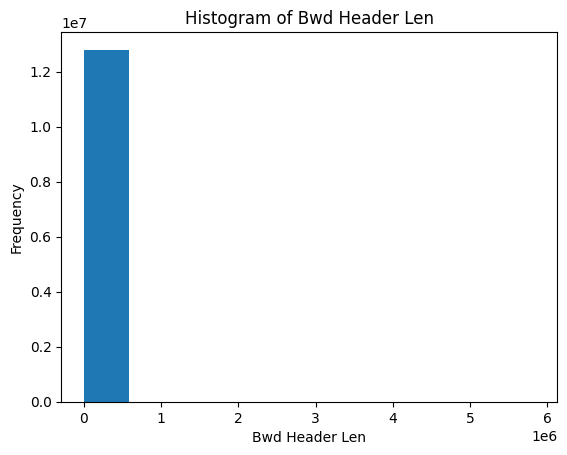

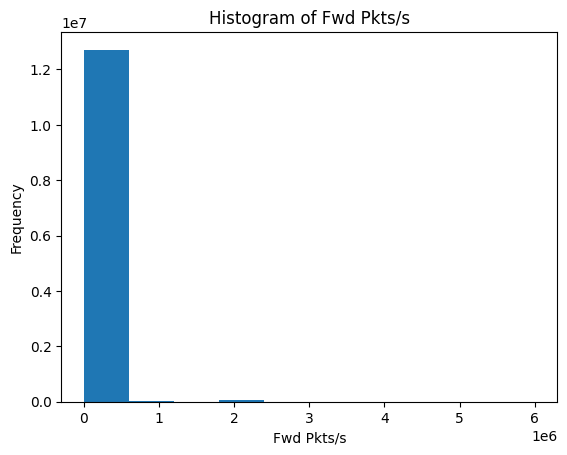

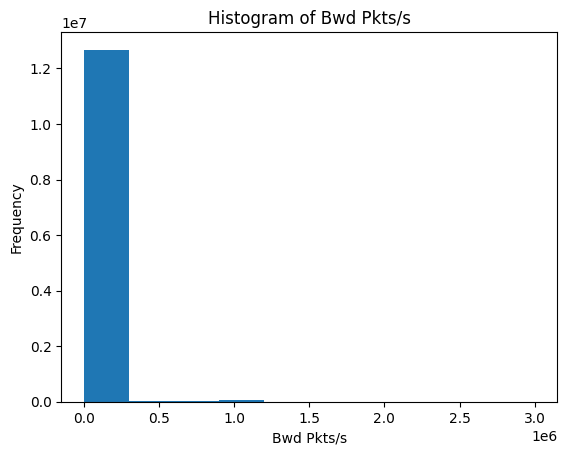

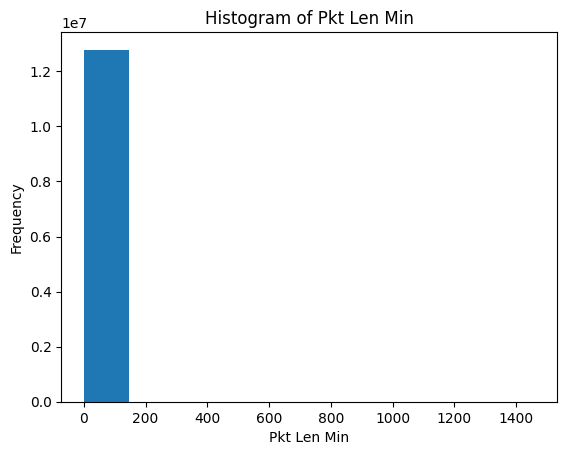

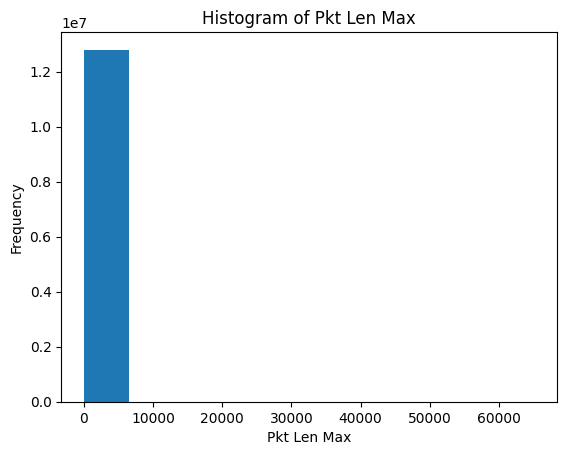

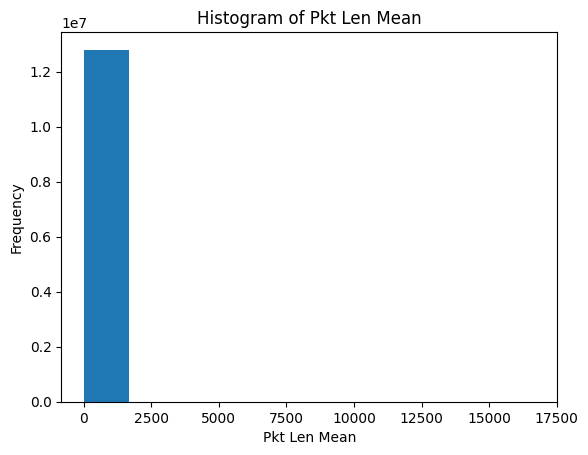

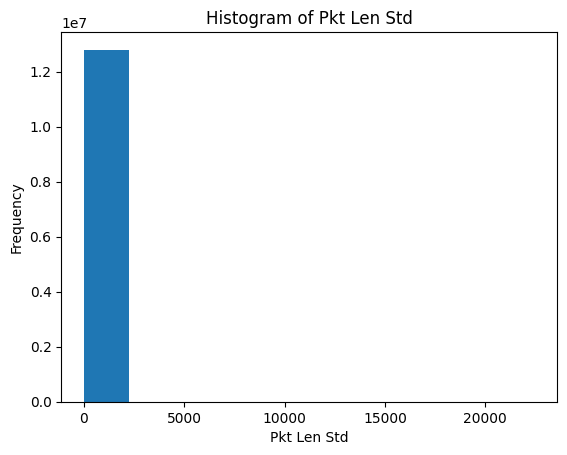

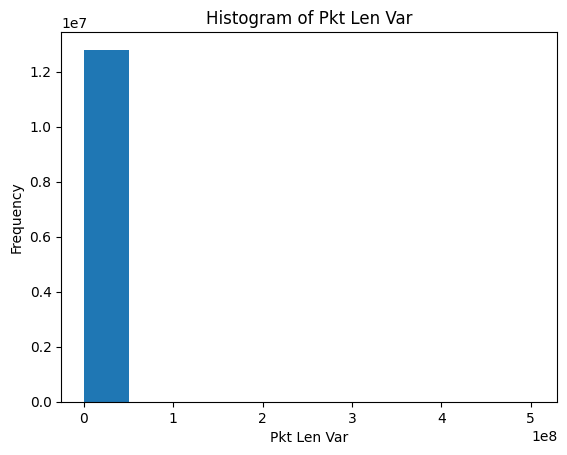

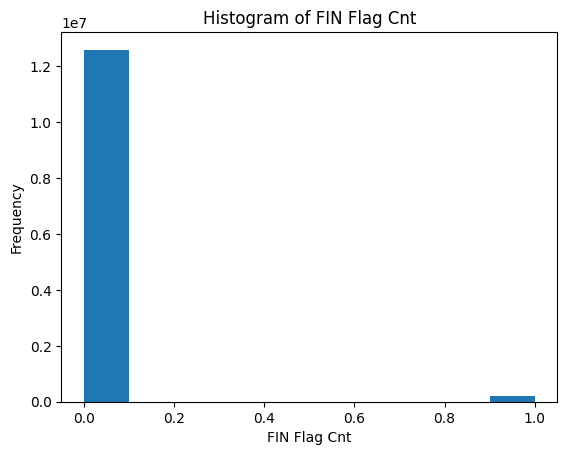

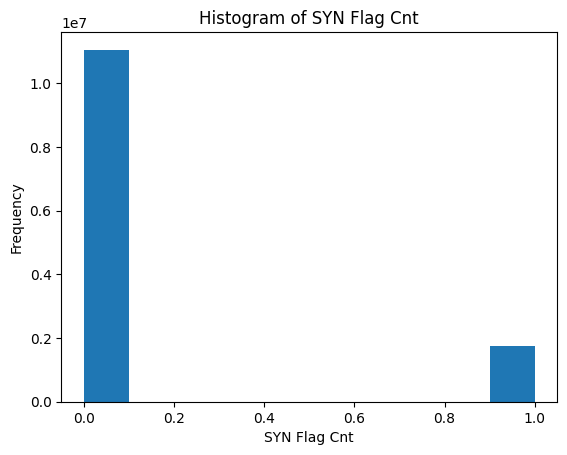

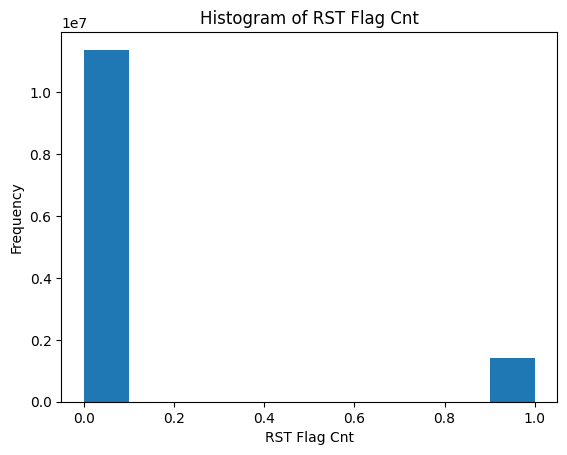

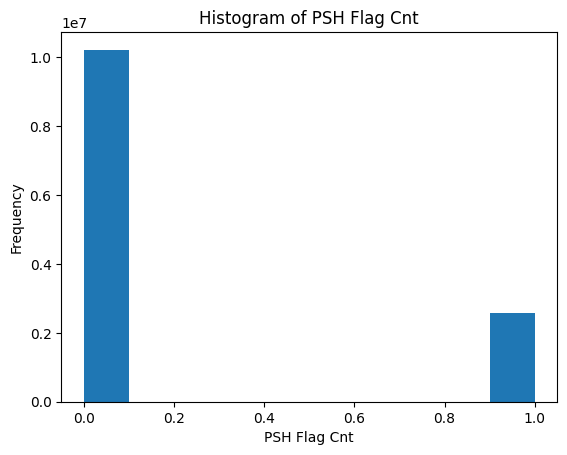

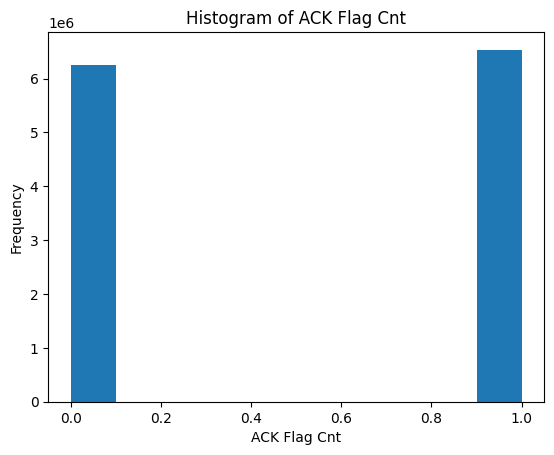

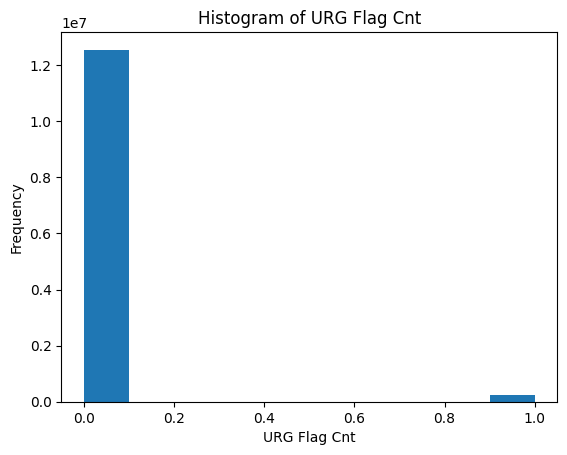

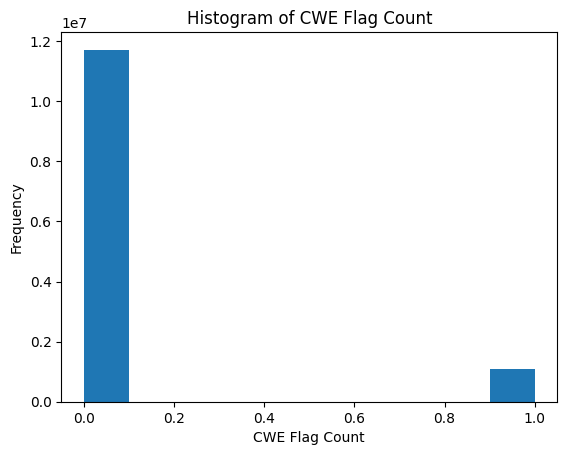

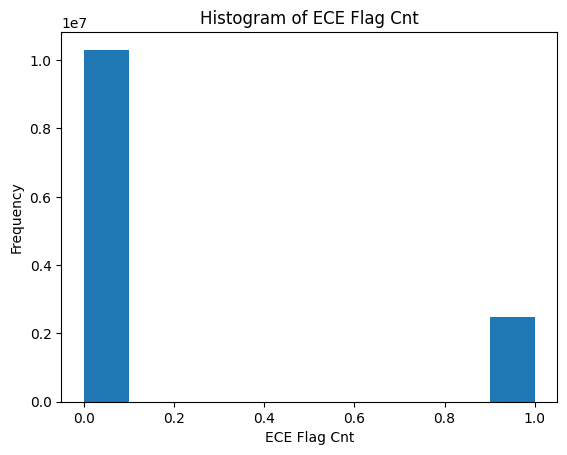

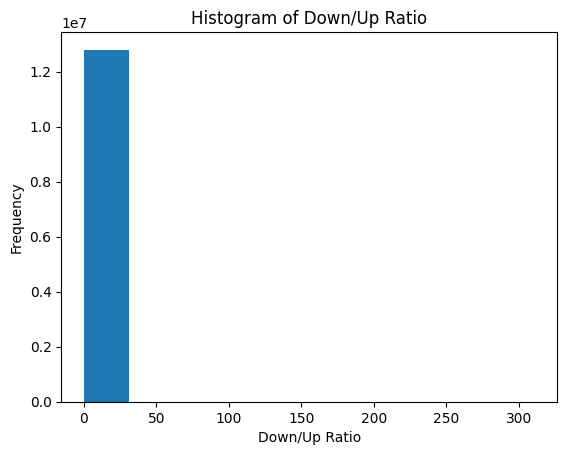

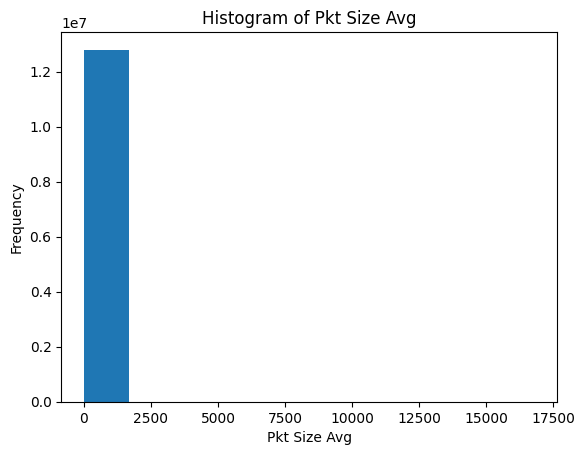

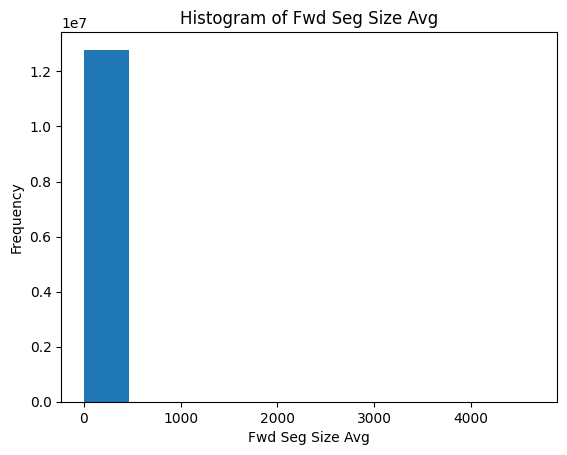

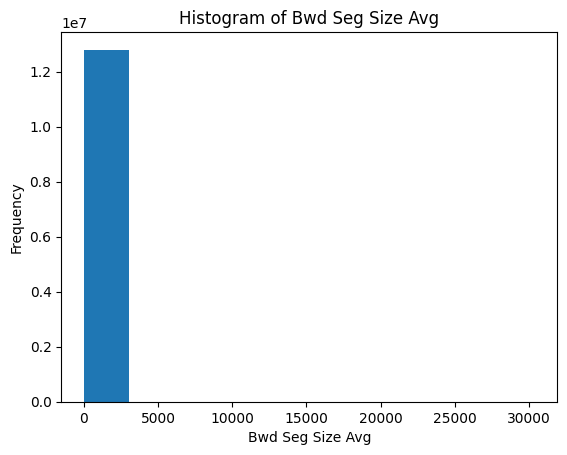

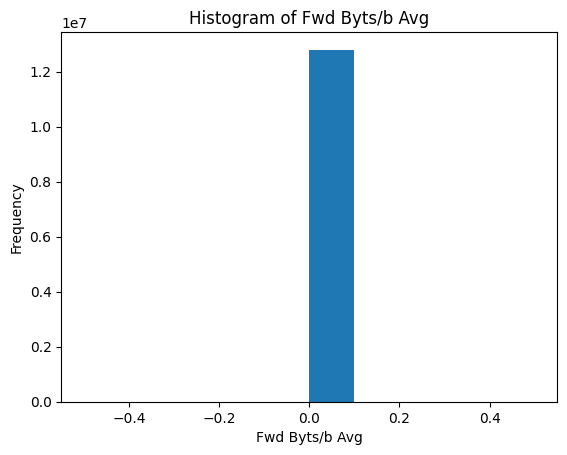

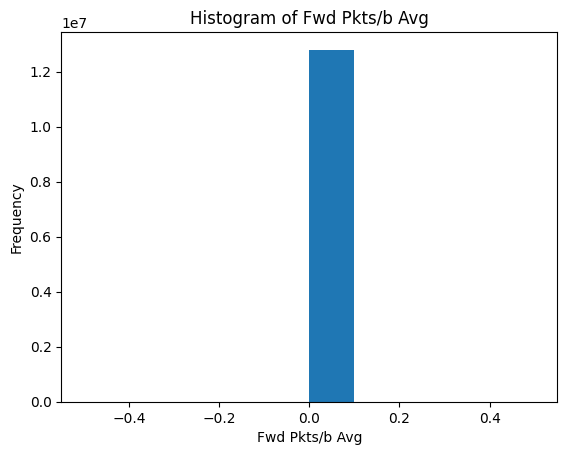

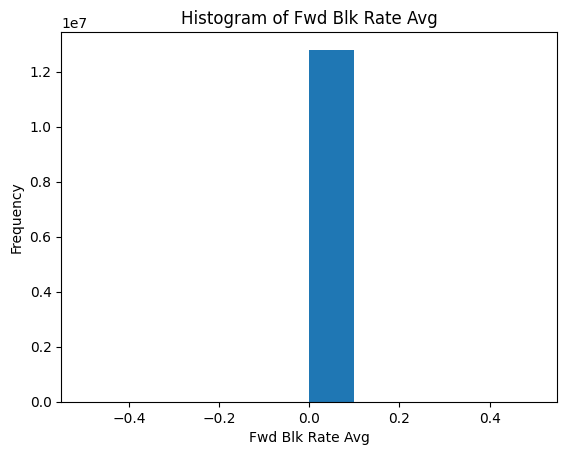

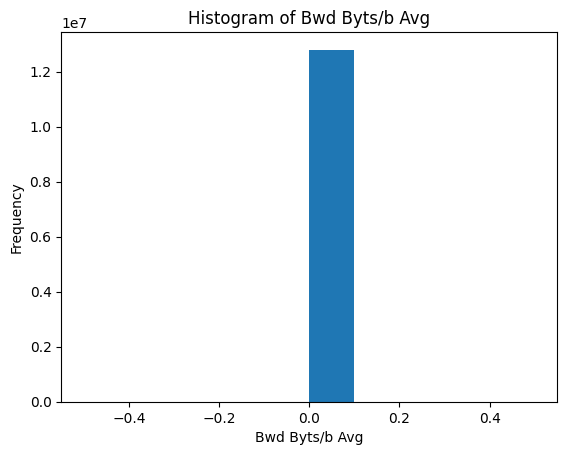

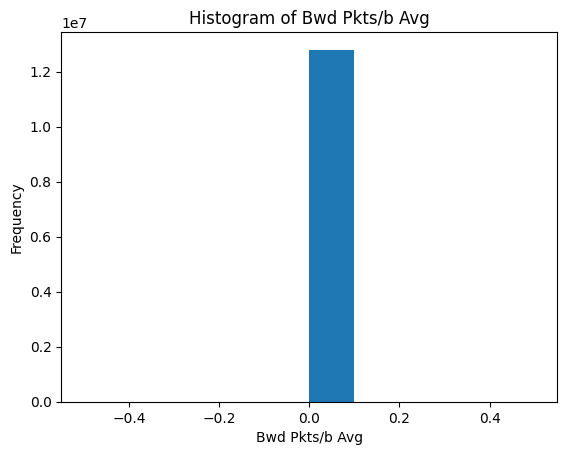

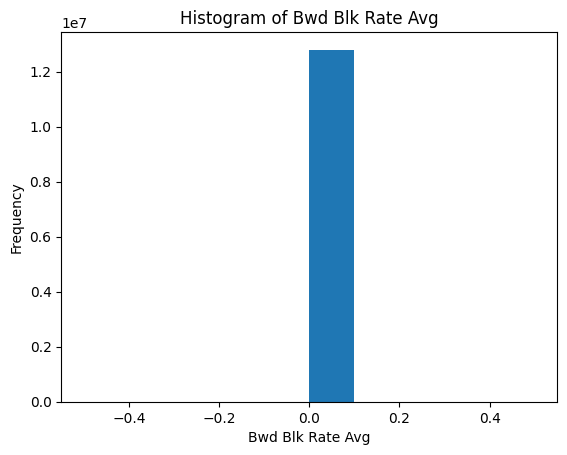

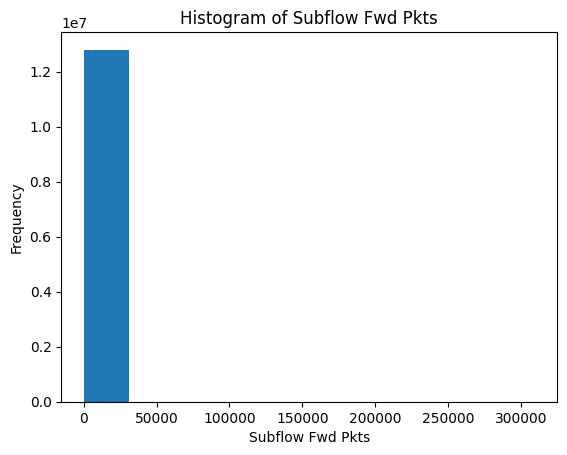

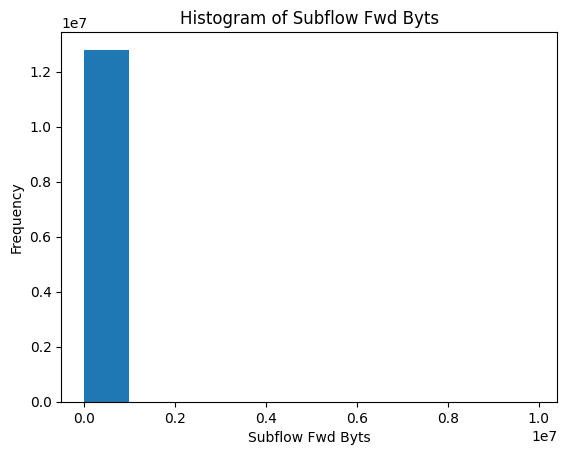

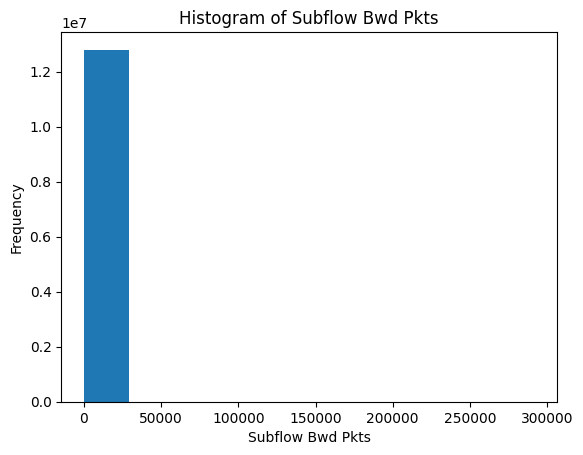

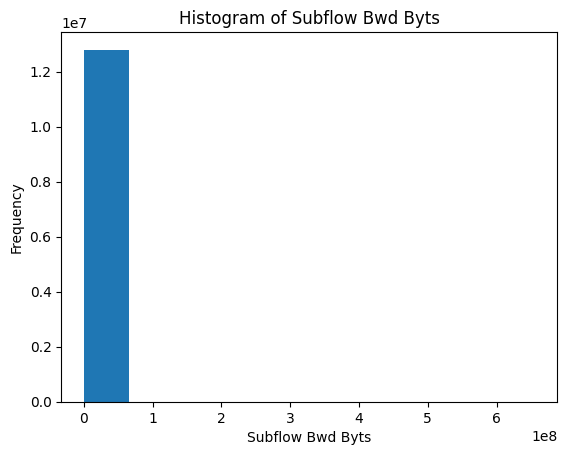

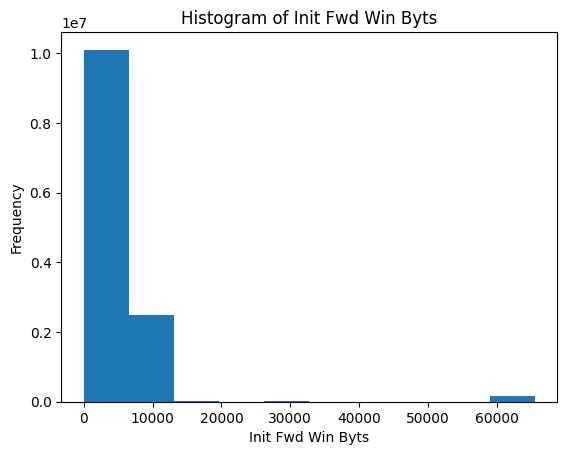

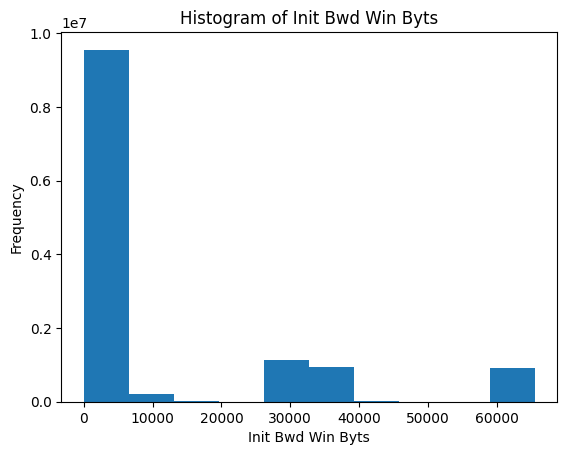

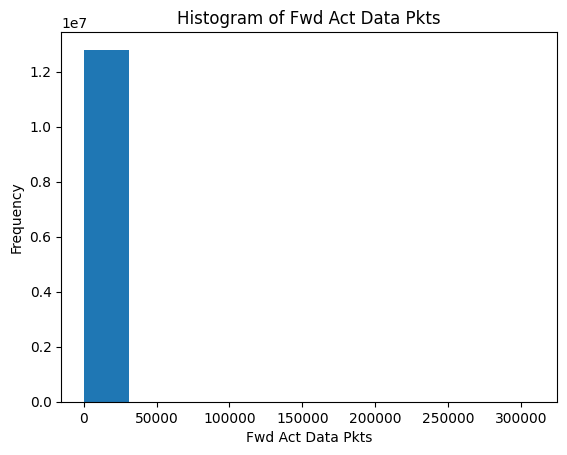

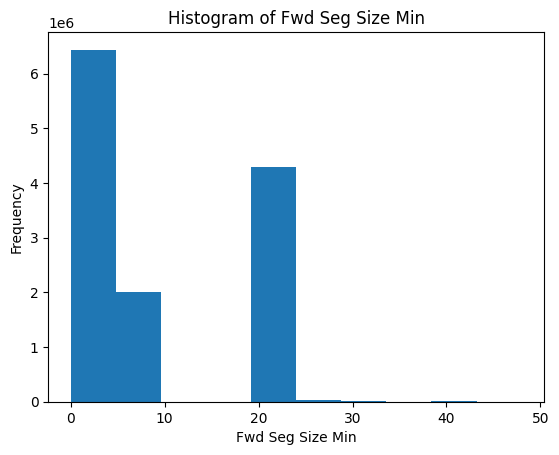

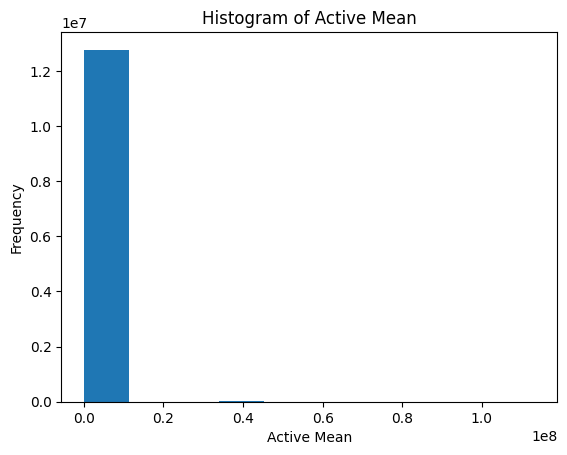

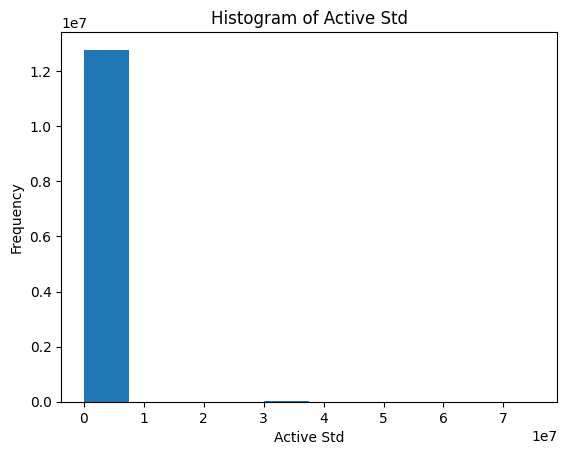

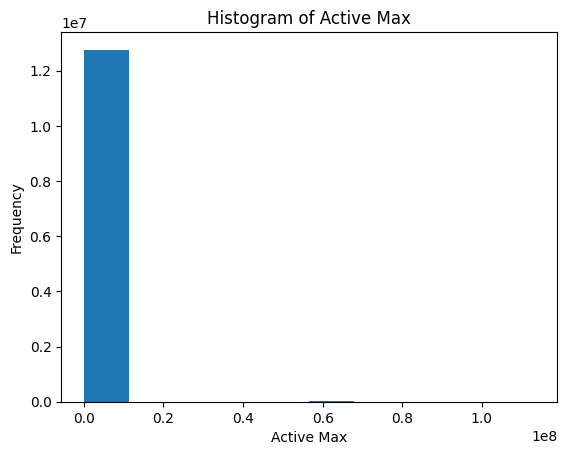

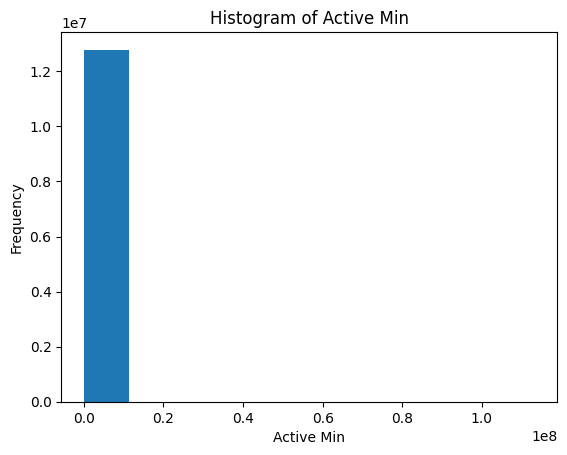

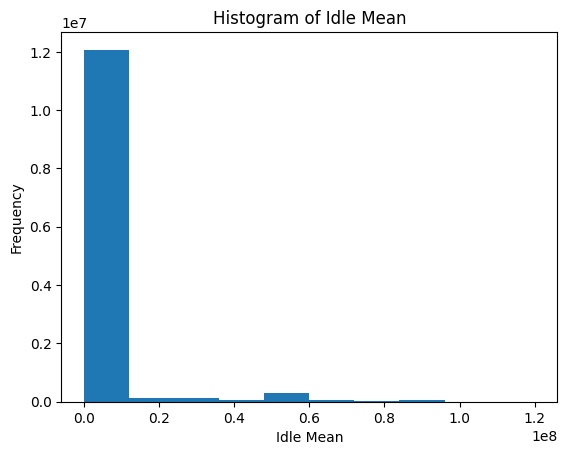

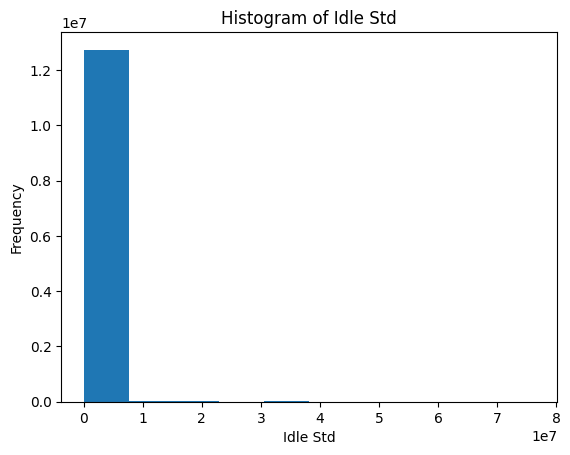

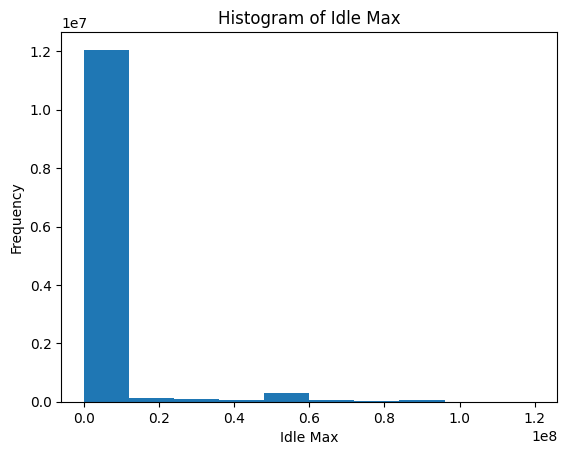

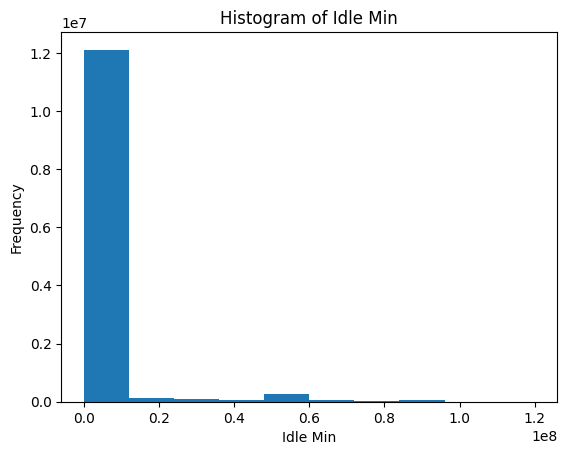

In [6]:
# Histograms for numerical data

numerical_columns = df.select_dtypes(include=['number']).columns

# Set the number of bins and figsize
bins = 10
figsize = (10, 6)

# Loop through each numerical column and create a histogram
for column in numerical_columns:
    plt.hist(df[column], bins=bins)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

In [5]:
# Feature Engineering : Dropping columns with unique values and irrelevant columns

# Informing about the original shape of the DataFrame
print(f"Original DataFrame shape: {df.shape}")

# Dropping the first two columns (as they are not useful)
df = df.iloc[:, 2:]
print("\nFirst two columns dropped.")
print(f"DataFrame shape after dropping first two columns: {df.shape}")

# Finding columns with only one unique value
columns_with_single_value = df.columns[df.nunique() <= 1]
print("\nColumns with only one unique value (to be dropped):")
print(columns_with_single_value.tolist())

# Dropping columns with only one unique value
df = df.drop(columns=columns_with_single_value)
print("\nColumns with single unique value dropped.")

# Informing about the modifed shape of the DataFrame
print(f"DataFrame shape after dropping these columns: {df.shape}")

# Displaying the first few rows of the modified DataFrame
print("\nModified DataFrame (first 5 rows):")
df.head()

Original DataFrame shape: (12794627, 85)

First two columns dropped.
DataFrame shape after dropping first two columns: (12794627, 83)

Columns with only one unique value (to be dropped):
['Fwd URG Flags', 'Bwd URG Flags', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg']

Columns with single unique value dropped.
DataFrame shape after dropping these columns: (12794627, 75)

Modified DataFrame (first 5 rows):


Src IP  Src Port        Dst IP  Dst Port  Protocol  \
0  192.168.4.118      4504  203.73.24.75        80         6   
1  192.168.4.118      4504  203.73.24.75        80         6   
2  192.168.4.118      4505  203.73.24.75        80         6   
3  192.168.4.118      4505  203.73.24.75        80         6   
4  192.168.4.118      4506  203.73.24.75        80         6   

                Timestamp  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0  12/06/2010 08:34:32 AM        3974862            29            44   
1  12/06/2010 08:34:36 AM             63             1             1   
2  12/06/2010 08:34:36 AM         476078             2             6   
3  12/06/2010 08:34:37 AM            151             2             1   
4  12/06/2010 08:34:37 AM         472507             2             5   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0             86.0          59811.0             86.0              0.0   
1              0.0              0.0              0.0              0.0   
2             86.0           3037.0             86.0              0.0   
3              0.0              0.0              0.0              0.0   
4             73.0           1050.0             73.0              0.0   

   Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
0          2.965517        15.969799           1460.0              0.0   
1          0.000000         0.000000              0.0              0.0   
2         43.000000        60.811183           1460.0              0.0   
3          0.000000         0.000000              0.0              0.0   
4         36.500000        51.618795           1050.0              0.0   

   Bwd Pkt Len Mean  Bwd Pkt Len Std   Flow Byts/s   Flow Pkts/s  \
0       1359.340909       372.027190  15068.950821     18.365417   
1          0.000000         0.000000      0.000000  31746.031746   
2        506.166667       740.224403   6559.849436     16.803969   
3          0.000000         0.000000      0.000000  19867.549669   
4        210.000000       469.574275   2376.684367     14.814595   

   Flow IAT Mean   Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Tot  \
0   55206.416667  195478.316654     1566821.0         167.0    3735347.0   
1      63.000000       0.000000          63.0          63.0          0.0   
2   68011.142857  110862.707451      232203.0           6.0        134.0   
3      75.500000      98.287843         145.0           6.0        145.0   
4   78751.166667  118675.492251      232355.0           7.0        179.0   

   Fwd IAT Mean    Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Tot  \
0     133405.25  341775.688712    1805015.0        167.0    3974862.0   
1          0.00       0.000000          0.0          0.0          0.0   
2        134.00       0.000000        134.0        134.0     476078.0   
3        145.00       0.000000        145.0        145.0          0.0   
4        179.00       0.000000        179.0        179.0     472507.0   

    Bwd IAT Mean    Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  \
0   92438.651163  248174.820574    1566821.0       3997.0              0   
1       0.000000       0.000000          0.0          0.0              0   
2   95215.600000  123467.303580     232601.0          6.0              0   
3       0.000000       0.000000          0.0          0.0              0   
4  118126.750000  131726.857333     232875.0          7.0              0   

   Bwd PSH Flags  Fwd Header Len  Bwd Header Len    Fwd Pkts/s    Bwd Pkts/s  \
0              0             768             896      7.295851     11.069567   
1              0              20              20  15873.015873  15873.015873   
2              0              40             136      4.200992     12.602977   
3              0              40              20  13245.033113   6622.516556   
4              0              40             116      4.232742     10.581854   

   Pkt Len Min  Pkt Len Max  Pkt Len Mean  Pkt Len Std    Pkt Len

In [6]:
# Feature Engineering : Timestamp column extraction with pandas (70 times faster than previous method with numpy)
# Uniforming the format of timestamps
def vectorized_parse_timestamp(ts_series):
    # Handling AM/PM format
    am_pm_mask = ts_series.str.contains('AM|PM', regex=True, na=False)
    ts_series_am_pm = pd.to_datetime(ts_series[am_pm_mask], format='%d/%m/%Y %I:%M:%S %p', errors='coerce')

    # Handling 24-hour format
    ts_series_24hr = pd.to_datetime(ts_series[~am_pm_mask], format='%d/%m/%Y %H:%M:%S', errors='coerce')

    # Combining results and ensuring a datetime-like dtype
    return pd.concat([ts_series_am_pm, ts_series_24hr]).reindex_like(ts_series)

# vectorized parsing to the 'Timestamp' column
df['Parsed_Timestamp'] = vectorized_parse_timestamp(df['Timestamp'])

# Check for NaT values which indicates parsing errors
nat_count = df['Parsed_Timestamp'].isna().sum()
if nat_count > 0:
    print(f"There are {nat_count} rows with unparseable timestamps.")
else:
    # Extracting date and time components
    df['Year'] = df['Parsed_Timestamp'].dt.year
    df['Month'] = df['Parsed_Timestamp'].dt.month
    df['Day'] = df['Parsed_Timestamp'].dt.day
    df['Hour'] = df['Parsed_Timestamp'].dt.hour
    df['Minute'] = df['Parsed_Timestamp'].dt.minute
    df['Second'] = df['Parsed_Timestamp'].dt.second
    df['Day_of_Week'] = df['Parsed_Timestamp'].dt.dayofweek
    df['Is_Weekend'] = df['Day_of_Week'].apply(lambda x: 1 if x > 4 else 0)

    # Dropping the original 'Timestamp' and the 'Parsed_Timestamp' columns
    df.drop(columns=['Timestamp', 'Parsed_Timestamp'], inplace=True)

    print("Parsed Timestamps and Extracted Components:")

# Output
print(f"\nDataFrame shape: {df.shape}\n")
df.head()


Parsed Timestamps and Extracted Components:

DataFrame shape: (12794627, 82)



Src IP  Src Port        Dst IP  Dst Port  Protocol  Flow Duration  \
0  192.168.4.118      4504  203.73.24.75        80         6        3974862   
1  192.168.4.118      4504  203.73.24.75        80         6             63   
2  192.168.4.118      4505  203.73.24.75        80         6         476078   
3  192.168.4.118      4505  203.73.24.75        80         6            151   
4  192.168.4.118      4506  203.73.24.75        80         6         472507   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0            29            44             86.0          59811.0   
1             1             1              0.0              0.0   
2             2             6             86.0           3037.0   
3             2             1              0.0              0.0   
4             2             5             73.0           1050.0   

   Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
0             86.0              0.0          2.965517        15.969799   
1              0.0              0.0          0.000000         0.000000   
2             86.0              0.0         43.000000        60.811183   
3              0.0              0.0          0.000000         0.000000   
4             73.0              0.0         36.500000        51.618795   

   Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  \
0           1460.0              0.0       1359.340909       372.027190   
1              0.0              0.0          0.000000         0.000000   
2           1460.0              0.0        506.166667       740.224403   
3              0.0              0.0          0.000000         0.000000   
4           1050.0              0.0        210.000000       469.574275   

    Flow Byts/s   Flow Pkts/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  \
0  15068.950821     18.365417   55206.416667  195478.316654     1566821.0   
1      0.000000  31746.031746      63.000000       0.000000          63.0   
2   6559.849436     16.803969   68011.142857  110862.707451      232203.0   
3      0.000000  19867.549669      75.500000      98.287843         145.0   
4   2376.684367     14.814595   78751.166667  118675.492251      232355.0   

   Flow IAT Min  Fwd IAT Tot  Fwd IAT Mean    Fwd IAT Std  Fwd IAT Max  \
0         167.0    3735347.0     133405.25  341775.688712    1805015.0   
1          63.0          0.0          0.00       0.000000          0.0   
2           6.0        134.0        134.00       0.000000        134.0   
3           6.0        145.0        145.00       0.000000        145.0   
4           7.0        179.0        179.00       0.000000        179.0   

   Fwd IAT Min  Bwd IAT Tot   Bwd IAT Mean    Bwd IAT Std  Bwd IAT Max  \
0        167.0    3974862.0   92438.651163  248174.820574    1566821.0   
1          0.0          0.0       0.000000       0.000000          0.0   
2        134.0     476078.0   95215.600000  123467.303580     232601.0   
3        145.0          0.0       0.000000       0.000000          0.0   
4        179.0     472507.0  118126.750000  131726.857333     232875.0   

   Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  Fwd Header Len  Bwd Header Len  \
0       3997.0              0              0             768             896   
1          0.0              0              0              20              20   
2          6.0              0              0              40             136   
3          0.0              0              0              40              20   
4          7.0              0              0              40             116   

     Fwd Pkts/s    Bwd Pkts/s  Pkt Len Min  Pkt Len Max  Pkt Len Mean  \
0      7.295851     11.069567          0.0       1460.0    809.418919   
1  15873.015873  15873.015873          0.0          0.0      0.000000   
2      4.200992     12.602977          0.0       1460.0    347.000000   
3  13245.033113   6622.516556          0.0          0.0      0.000000   
4      4.232742     10.581854          0.0 

In [7]:
# count integers in multiple columns to make sure timestamp extraction was successful
def count_integers_multiple_columns(df, column_names):
    results = []

    for column in column_names:
        # Check if the values in the column are integers
        is_integer = df[column].apply(lambda x: isinstance(x, int))
        # Count the number of integer values
        integer_count = is_integer.sum()
        # Append results
        results.append({'Column': column, 'Integer_Count': integer_count})

    # Total number of samples in the DataFrame
    total_samples = len(df)

    # Creating the result DataFrame
    result_df = pd.DataFrame(results)
    result_df['Total_Samples'] = total_samples

    return result_df

# List of columns to check
columns_to_check = ['Hour', 'Minute', 'Second']

# Get the result
result_df = count_integers_multiple_columns(df, columns_to_check)

# Display the result
print(result_df)

   Column  Integer_Count  Total_Samples
0    Hour       12794627       12794627
1  Minute       12794627       12794627
2  Second       12794627       12794627


In [7]:
# Feature Engineering : Label Encoding with visualization

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Label' column
df['Label_encoded'] = label_encoder.fit_transform(df['Label'])

# Get unique categories found in the DataFrame
unique_categories = df['Label'].unique()

# Display progress message
print("Processing categories:")

# Loop through unique categories
for category in unique_categories:
    # Filter DataFrame for the current category
    category_df = df[df['Label'] == category]
    
    # Get the number of samples in the category
    num_samples = category_df.shape[0]
    
    # Limit the number of samples to display to 10 or fewer
    num_samples_to_display = min(10, num_samples)
    
    # Display category name and number of samples
    print(f"\nCategory: {category} ({num_samples} samples)")
    
    # Select the first 10 samples (or fewer if there are fewer than 10)
    selected_samples = category_df.head(num_samples_to_display)
    
    # Display original 'Label' column for selected samples
    print("\nOriginal 'Label' Column:")
    print(selected_samples[['Label']])
    
    # Display encoded 'Label_encoded' column for selected samples
    print("\nEncoded 'Label_encoded' Column:")
    print(selected_samples[['Label_encoded']])
    
# Drop the original 'Label' column
df = df.drop(columns=['Label'])

# Display completion message
print("\nProcessing completed.")
print(df.shape)
df.head()

Processing categories:

Category: ddos (6472647 samples)

Original 'Label' Column:
  Label
0  ddos
1  ddos
2  ddos
3  ddos
4  ddos
5  ddos
6  ddos
7  ddos
8  ddos
9  ddos

Encoded 'Label_encoded' Column:
   Label_encoded
0              1
1              1
2              1
3              1
4              1
5              1
6              1
7              1
8              1
9              1

Category: Benign (6321980 samples)

Original 'Label' Column:
          Label
6472647  Benign
6472648  Benign
6472649  Benign
6472650  Benign
6472651  Benign
6472652  Benign
6472653  Benign
6472654  Benign
6472655  Benign
6472656  Benign

Encoded 'Label_encoded' Column:
         Label_encoded
6472647              0
6472648              0
6472649              0
6472650              0
6472651              0
6472652              0
6472653              0
6472654              0
6472655              0
6472656              0

Processing completed.
(12794627, 82)


Src IP  Src Port        Dst IP  Dst Port  Protocol  Flow Duration  \
0  192.168.4.118      4504  203.73.24.75        80         6        3974862   
1  192.168.4.118      4504  203.73.24.75        80         6             63   
2  192.168.4.118      4505  203.73.24.75        80         6         476078   
3  192.168.4.118      4505  203.73.24.75        80         6            151   
4  192.168.4.118      4506  203.73.24.75        80         6         472507   

   Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
0            29            44             86.0          59811.0   
1             1             1              0.0              0.0   
2             2             6             86.0           3037.0   
3             2             1              0.0              0.0   
4             2             5             73.0           1050.0   

   Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  Fwd Pkt Len Std  \
0             86.0              0.0          2.965517        15.969799   
1              0.0              0.0          0.000000         0.000000   
2             86.0              0.0         43.000000        60.811183   
3              0.0              0.0          0.000000         0.000000   
4             73.0              0.0         36.500000        51.618795   

   Bwd Pkt Len Max  Bwd Pkt Len Min  Bwd Pkt Len Mean  Bwd Pkt Len Std  \
0           1460.0              0.0       1359.340909       372.027190   
1              0.0              0.0          0.000000         0.000000   
2           1460.0              0.0        506.166667       740.224403   
3              0.0              0.0          0.000000         0.000000   
4           1050.0              0.0        210.000000       469.574275   

    Flow Byts/s   Flow Pkts/s  Flow IAT Mean   Flow IAT Std  Flow IAT Max  \
0  15068.950821     18.365417   55206.416667  195478.316654     1566821.0   
1      0.000000  31746.031746      63.000000       0.000000          63.0   
2   6559.849436     16.803969   68011.142857  110862.707451      232203.0   
3      0.000000  19867.549669      75.500000      98.287843         145.0   
4   2376.684367     14.814595   78751.166667  118675.492251      232355.0   

   Flow IAT Min  Fwd IAT Tot  Fwd IAT Mean    Fwd IAT Std  Fwd IAT Max  \
0         167.0    3735347.0     133405.25  341775.688712    1805015.0   
1          63.0          0.0          0.00       0.000000          0.0   
2           6.0        134.0        134.00       0.000000        134.0   
3           6.0        145.0        145.00       0.000000        145.0   
4           7.0        179.0        179.00       0.000000        179.0   

   Fwd IAT Min  Bwd IAT Tot   Bwd IAT Mean    Bwd IAT Std  Bwd IAT Max  \
0        167.0    3974862.0   92438.651163  248174.820574    1566821.0   
1          0.0          0.0       0.000000       0.000000          0.0   
2        134.0     476078.0   95215.600000  123467.303580     232601.0   
3        145.0          0.0       0.000000       0.000000          0.0   
4        179.0     472507.0  118126.750000  131726.857333     232875.0   

   Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  Fwd Header Len  Bwd Header Len  \
0       3997.0              0              0             768             896   
1          0.0              0              0              20              20   
2          6.0              0              0              40             136   
3          0.0              0              0              40              20   
4          7.0              0              0              40             116   

     Fwd Pkts/s    Bwd Pkts/s  Pkt Len Min  Pkt Len Max  Pkt Len Mean  \
0      7.295851     11.069567          0.0       1460.0    809.418919   
1  15873.015873  15873.015873          0.0          0.0      0.000000   
2      4.200992     12.602977          0.0       1460.0    347.000000   
3  13245.033113   6622.516556          0.0          0.0      0.000000   
4      4.232742     10.581854          0.0 

In [8]:
# Feature Engineering: IP addresses Encoding
def ip_to_int(ip):
    return struct.unpack("!I", socket.inet_aton(ip))[0]

df['Src IP Encoded'] = df['Src IP'].apply(ip_to_int)
df['Dst IP Encoded'] = df['Dst IP'].apply(ip_to_int)

# Drop the original columns
df.drop(columns=['Src IP', 'Dst IP'], inplace=True)
print(df.shape)
df.head()


(12794627, 82)


Src Port  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      4504        80         6        3974862            29            44   
1      4504        80         6             63             1             1   
2      4505        80         6         476078             2             6   
3      4505        80         6            151             2             1   
4      4506        80         6         472507             2             5   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0             86.0          59811.0             86.0              0.0   
1              0.0              0.0              0.0              0.0   
2             86.0           3037.0             86.0              0.0   
3              0.0              0.0              0.0              0.0   
4             73.0           1050.0             73.0              0.0   

   Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
0          2.965517        15.969799           1460.0              0.0   
1          0.000000         0.000000              0.0              0.0   
2         43.000000        60.811183           1460.0              0.0   
3          0.000000         0.000000              0.0              0.0   
4         36.500000        51.618795           1050.0              0.0   

   Bwd Pkt Len Mean  Bwd Pkt Len Std   Flow Byts/s   Flow Pkts/s  \
0       1359.340909       372.027190  15068.950821     18.365417   
1          0.000000         0.000000      0.000000  31746.031746   
2        506.166667       740.224403   6559.849436     16.803969   
3          0.000000         0.000000      0.000000  19867.549669   
4        210.000000       469.574275   2376.684367     14.814595   

   Flow IAT Mean   Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Tot  \
0   55206.416667  195478.316654     1566821.0         167.0    3735347.0   
1      63.000000       0.000000          63.0          63.0          0.0   
2   68011.142857  110862.707451      232203.0           6.0        134.0   
3      75.500000      98.287843         145.0           6.0        145.0   
4   78751.166667  118675.492251      232355.0           7.0        179.0   

   Fwd IAT Mean    Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Tot  \
0     133405.25  341775.688712    1805015.0        167.0    3974862.0   
1          0.00       0.000000          0.0          0.0          0.0   
2        134.00       0.000000        134.0        134.0     476078.0   
3        145.00       0.000000        145.0        145.0          0.0   
4        179.00       0.000000        179.0        179.0     472507.0   

    Bwd IAT Mean    Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  \
0   92438.651163  248174.820574    1566821.0       3997.0              0   
1       0.000000       0.000000          0.0          0.0              0   
2   95215.600000  123467.303580     232601.0          6.0              0   
3       0.000000       0.000000          0.0          0.0              0   
4  118126.750000  131726.857333     232875.0          7.0              0   

   Bwd PSH Flags  Fwd Header Len  Bwd Header Len    Fwd Pkts/s    Bwd Pkts/s  \
0              0             768             896      7.295851     11.069567   
1              0              20              20  15873.015873  15873.015873   
2              0              40             136      4.200992     12.602977   
3              0              40              20  13245.033113   6622.516556   
4              0              40             116      4.232742     10.581854   

   Pkt Len Min  Pkt Len Max  Pkt Len Mean  Pkt Len Std    Pkt Len Var  \
0          0.0       1460.0    809.418919   728.862428  531240.438541   
1          0.0          0.0      0.000000     0.000000       0.000000   
2          0.0       1460.0    347.000000   632.515217  400075.500000   
3          0.0          0.0      0.000000     0.000000       0.000000   
4          0.0       1050.0    140.375000 

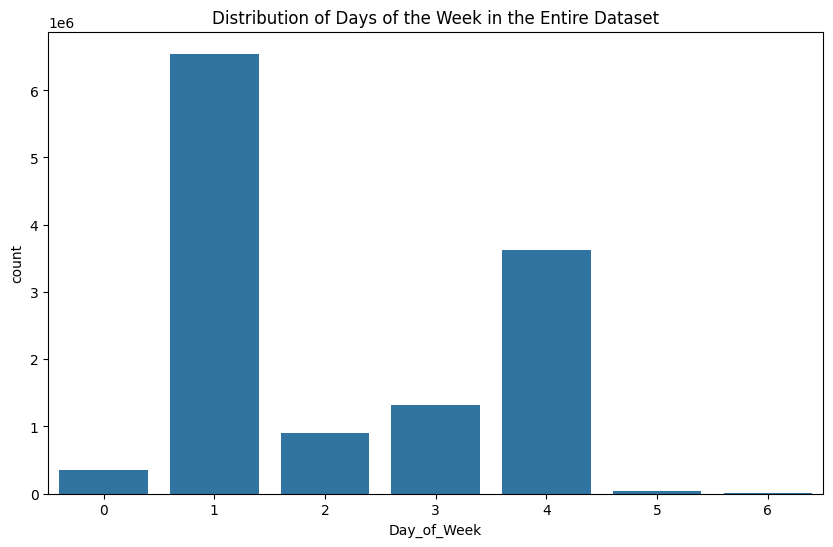

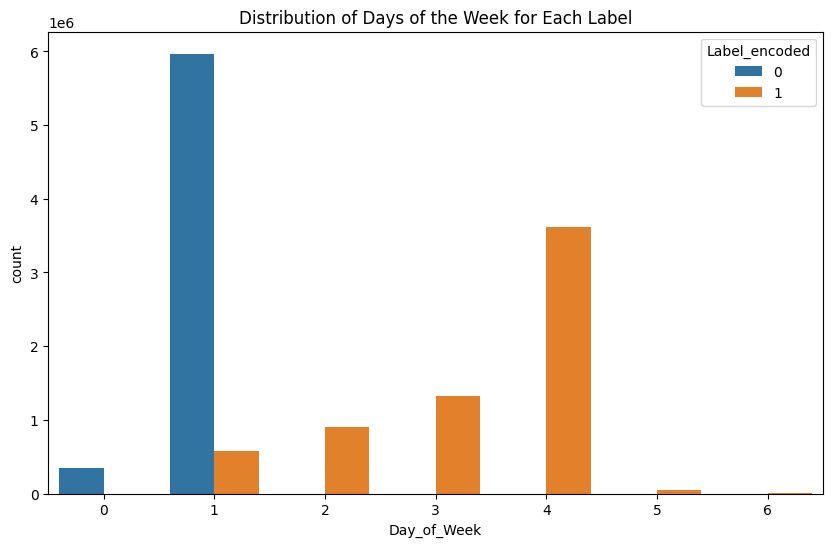

In [17]:
# Plotting the distribution of 'day_of_week' for the entire dataset (high importance and not well distributed feature)
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', data=df)
plt.title('Distribution of Days of the Week in the Entire Dataset')
plt.show()

# Plotting the distribution for each label
plt.figure(figsize=(10, 6))
sns.countplot(x='Day_of_Week', hue='Label_encoded', data=df)
plt.title('Distribution of Days of the Week for Each Label')
plt.show()

In [9]:
# Feature Engineering : Dropping irrelevant & badly distributed noisey features
columns_to_drop = ['Is_Weekend', 'Day_of_Week', 'Year', 'Month', 'Day']
df = df.drop(columns_to_drop, axis=1)
print(df.shape)
df.head()

(12794627, 77)


Src Port  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      4504        80         6        3974862            29            44   
1      4504        80         6             63             1             1   
2      4505        80         6         476078             2             6   
3      4505        80         6            151             2             1   
4      4506        80         6         472507             2             5   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0             86.0          59811.0             86.0              0.0   
1              0.0              0.0              0.0              0.0   
2             86.0           3037.0             86.0              0.0   
3              0.0              0.0              0.0              0.0   
4             73.0           1050.0             73.0              0.0   

   Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
0          2.965517        15.969799           1460.0              0.0   
1          0.000000         0.000000              0.0              0.0   
2         43.000000        60.811183           1460.0              0.0   
3          0.000000         0.000000              0.0              0.0   
4         36.500000        51.618795           1050.0              0.0   

   Bwd Pkt Len Mean  Bwd Pkt Len Std   Flow Byts/s   Flow Pkts/s  \
0       1359.340909       372.027190  15068.950821     18.365417   
1          0.000000         0.000000      0.000000  31746.031746   
2        506.166667       740.224403   6559.849436     16.803969   
3          0.000000         0.000000      0.000000  19867.549669   
4        210.000000       469.574275   2376.684367     14.814595   

   Flow IAT Mean   Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Tot  \
0   55206.416667  195478.316654     1566821.0         167.0    3735347.0   
1      63.000000       0.000000          63.0          63.0          0.0   
2   68011.142857  110862.707451      232203.0           6.0        134.0   
3      75.500000      98.287843         145.0           6.0        145.0   
4   78751.166667  118675.492251      232355.0           7.0        179.0   

   Fwd IAT Mean    Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Bwd IAT Tot  \
0     133405.25  341775.688712    1805015.0        167.0    3974862.0   
1          0.00       0.000000          0.0          0.0          0.0   
2        134.00       0.000000        134.0        134.0     476078.0   
3        145.00       0.000000        145.0        145.0          0.0   
4        179.00       0.000000        179.0        179.0     472507.0   

    Bwd IAT Mean    Bwd IAT Std  Bwd IAT Max  Bwd IAT Min  Fwd PSH Flags  \
0   92438.651163  248174.820574    1566821.0       3997.0              0   
1       0.000000       0.000000          0.0          0.0              0   
2   95215.600000  123467.303580     232601.0          6.0              0   
3       0.000000       0.000000          0.0          0.0              0   
4  118126.750000  131726.857333     232875.0          7.0              0   

   Bwd PSH Flags  Fwd Header Len  Bwd Header Len    Fwd Pkts/s    Bwd Pkts/s  \
0              0             768             896      7.295851     11.069567   
1              0              20              20  15873.015873  15873.015873   
2              0              40             136      4.200992     12.602977   
3              0              40              20  13245.033113   6622.516556   
4              0              40             116      4.232742     10.581854   

   Pkt Len Min  Pkt Len Max  Pkt Len Mean  Pkt Len Std    Pkt Len Var  \
0          0.0       1460.0    809.418919   728.862428  531240.438541   
1          0.0          0.0      0.000000     0.000000       0.000000   
2          0.0       1460.0    347.000000   632.515217  400075.500000   
3          0.0          0.0      0.000000     0.000000       0.000000   
4          0.0       1050.0    140.375000 

In [10]:
# List of feature names to be dropped Based on feature importance studying
features_to_drop = ['TotLen Bwd Pkts', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
                    'Flow IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
                    'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Pkt Len Mean', 'FIN Flag Cnt',
                    'SYN Flag Cnt', 'RST Flag Cnt', 'URG Flag Cnt', 'ECE Flag Cnt', 'Pkt Size Avg',
                    'Bwd Seg Size Avg', 'Active Mean', 'Active Std', 'Active Max', 'Active Min',
                    'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'Minute', 'Second']

# Drop the features from df
df.drop(columns=features_to_drop, inplace=True)


print(df.shape)
df.head()

(12794627, 47)


Src Port  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0      4504        80         6        3974862            29            44   
1      4504        80         6             63             1             1   
2      4505        80         6         476078             2             6   
3      4505        80         6            151             2             1   
4      4506        80         6         472507             2             5   

   TotLen Fwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0             86.0             86.0              0.0          2.965517   
1              0.0              0.0              0.0          0.000000   
2             86.0             86.0              0.0         43.000000   
3              0.0              0.0              0.0          0.000000   
4             73.0             73.0              0.0         36.500000   

   Fwd Pkt Len Std  Bwd Pkt Len Min   Flow Byts/s   Flow Pkts/s  \
0        15.969799              0.0  15068.950821     18.365417   
1         0.000000              0.0      0.000000  31746.031746   
2        60.811183              0.0   6559.849436     16.803969   
3         0.000000              0.0      0.000000  19867.549669   
4        51.618795              0.0   2376.684367     14.814595   

   Flow IAT Mean  Flow IAT Max  Flow IAT Min  Fwd IAT Tot  Fwd IAT Mean  \
0   55206.416667     1566821.0         167.0    3735347.0     133405.25   
1      63.000000          63.0          63.0          0.0          0.00   
2   68011.142857      232203.0           6.0        134.0        134.00   
3      75.500000         145.0           6.0        145.0        145.00   
4   78751.166667      232355.0           7.0        179.0        179.00   

     Fwd IAT Std  Fwd IAT Max  Fwd IAT Min  Fwd Header Len  Bwd Header Len  \
0  341775.688712    1805015.0        167.0             768             896   
1       0.000000          0.0          0.0              20              20   
2       0.000000        134.0        134.0              40             136   
3       0.000000        145.0        145.0              40              20   
4       0.000000        179.0        179.0              40             116   

     Fwd Pkts/s    Bwd Pkts/s  Pkt Len Min  Pkt Len Max  Pkt Len Std  \
0      7.295851     11.069567          0.0       1460.0   728.862428   
1  15873.015873  15873.015873          0.0          0.0     0.000000   
2      4.200992     12.602977          0.0       1460.0   632.515217   
3  13245.033113   6622.516556          0.0          0.0     0.000000   
4      4.232742     10.581854          0.0       1050.0   368.430624   

     Pkt Len Var  PSH Flag Cnt  ACK Flag Cnt  CWE Flag Count  Down/Up Ratio  \
0  531240.438541             0             0               0            1.0   
1       0.000000             0             1               0            1.0   
2  400075.500000             0             0               0            3.0   
3       0.000000             0             1               0            0.0   
4  135741.125000             0             0               0            2.0   

   Fwd Seg Size Avg  Subflow Fwd Pkts  Subflow Fwd Byts  Subflow Bwd Pkts  \
0          2.965517                29                86                44   
1          0.000000                 1                 0                 1   
2         43.000000                 2                86                 6   
3          0.000000                 2                 0                 1   
4         36.500000                 2                73                 5   

   Subflow Bwd Byts  Init Fwd Win Byts  Init Bwd Win Byts  Fwd Act Data Pkts  \
0             59811                 -1               5840                  1   
1                 0                 -1              17520                  0   
2              3037                 -1               5840                  1   
3                 0                 -1              17520                  

In [12]:
# === NOT USED TOGETHER ANYMORE === standardization & normalization (Not needed for random forest)

# Update numeric_cols to include only the numeric columns currently in df, excluding 'Label_encoded'
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Label_encoded' in numeric_cols:
    numeric_cols.remove('Label_encoded')

# Initialize scalers
scaler_standard = StandardScaler()
scaler_normalize = MinMaxScaler()

# Skewness threshold for deciding between standardization and normalization
skewness_threshold = 1.0 

# Assess each column and suggest action
suggested_actions = {}
for col in numeric_cols:
    skewness = df[col].skew()
    if abs(skewness) > skewness_threshold:
        suggested_actions[col] = 'Normalize'
    else:
        suggested_actions[col] = 'Standardize'

# Display suggestions
print("Suggested Actions based on Skewness:")
for col, action in suggested_actions.items():
    print(f"{col}: {action}")


for col, action in suggested_actions.items():
    if action == 'Normalize':
        df[col] = scaler_normalize.fit_transform(df[[col]])
    elif action == 'Standardize':
        df[col] = scaler_standard.fit_transform(df[[col]])
    
print("Scaling applied as per suggestions.")
print(df.shape)
df.head()

Suggested Actions based on Skewness:
Src Port: Standardize
Dst Port: Normalize
Protocol: Normalize
Flow Duration: Normalize
Tot Fwd Pkts: Normalize
Tot Bwd Pkts: Normalize
TotLen Fwd Pkts: Normalize
TotLen Bwd Pkts: Normalize
Fwd Pkt Len Max: Normalize
Fwd Pkt Len Min: Normalize
Fwd Pkt Len Mean: Normalize
Fwd Pkt Len Std: Normalize
Bwd Pkt Len Max: Normalize
Bwd Pkt Len Min: Normalize
Bwd Pkt Len Mean: Normalize
Bwd Pkt Len Std: Normalize
Flow Byts/s: Normalize
Flow Pkts/s: Normalize
Flow IAT Mean: Normalize
Flow IAT Std: Normalize
Flow IAT Max: Normalize
Flow IAT Min: Normalize
Fwd IAT Tot: Normalize
Fwd IAT Mean: Normalize
Fwd IAT Std: Normalize
Fwd IAT Max: Normalize
Fwd IAT Min: Normalize
Bwd IAT Tot: Normalize
Bwd IAT Mean: Normalize
Bwd IAT Std: Normalize
Bwd IAT Max: Normalize
Bwd IAT Min: Normalize
Fwd PSH Flags: Normalize
Bwd PSH Flags: Normalize
Fwd Header Len: Normalize
Bwd Header Len: Normalize
Fwd Pkts/s: Normalize
Bwd Pkts/s: Normalize
Pkt Len Min: Normalize
Pkt Len Max:

Src Port  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
0 -1.291306  0.001221  0.352941   3.312386e-02      0.000094      0.000151   
1 -1.291306  0.001221  0.352941   5.333333e-07      0.000003      0.000003   
2 -1.291266  0.001221  0.352941   3.967325e-03      0.000006      0.000021   
3 -1.291266  0.001221  0.352941   1.266667e-06      0.000006      0.000003   
4 -1.291227  0.001221  0.352941   3.937567e-03      0.000006      0.000017   

   TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
0         0.000009         0.000091         0.003682              0.0   
1         0.000000         0.000000         0.000000              0.0   
2         0.000009         0.000005         0.003682              0.0   
3         0.000000         0.000000         0.000000              0.0   
4         0.000007         0.000002         0.003125              0.0   

   Fwd Pkt Len Mean  Fwd Pkt Len Std  Bwd Pkt Len Max  Bwd Pkt Len Min  \
0          0.000636         0.002237         0.022406              0.0   
1          0.000000         0.000000         0.000000              0.0   
2          0.009227         0.008520         0.022406              0.0   
3          0.000000         0.000000         0.000000              0.0   
4          0.007832         0.007232         0.016114              0.0   

   Bwd Pkt Len Mean  Bwd Pkt Len Std  Flow Byts/s  Flow Pkts/s  Flow IAT Mean  \
0          0.044752         0.016573     0.000007     0.250002   4.600644e-04   
1          0.000000         0.000000     0.000000     0.253968   5.333363e-07   
2          0.016664         0.032974     0.000003     0.250002   5.667710e-04   
3          0.000000         0.000000     0.000000     0.252483   6.375036e-07   
4          0.006914         0.020918     0.000001     0.250002   6.562717e-04   

   Flow IAT Std  Flow IAT Max  Flow IAT Min  Fwd IAT Tot  Fwd IAT Mean  \
0      0.002305  1.305688e-02  1.500008e-06     0.031128      0.001112   
1      0.000000  5.333345e-07  6.333368e-07     0.000000      0.000000   
2      0.001307  1.935038e-03  1.583342e-07     0.000001      0.000001   
3      0.000001  1.216669e-06  1.583342e-07     0.000001      0.000001   
4      0.001399  1.936304e-03  1.666676e-07     0.000001      0.000001   

   Fwd IAT Std  Fwd IAT Max  Fwd IAT Min   Bwd IAT Tot  Bwd IAT Mean  \
0     0.004028     0.015042     0.000001  3.312388e-02  7.705632e-04   
1     0.000000     0.000000     0.000000  8.333340e-09  8.335851e-09   
2     0.000000     0.000001     0.000001  3.967328e-03  7.937114e-04   
3     0.000000     0.000001     0.000001  8.333340e-09  8.335851e-09   
4     0.000000     0.000001     0.000001  3.937570e-03  9.846954e-04   

   Bwd IAT Std   Bwd IAT Max   Bwd IAT Min  Fwd PSH Flags  Bwd PSH Flags  \
0     0.002925  1.305925e-02  3.332673e-05            0.0            0.0   
1     0.000000  8.334868e-09  8.335851e-09            0.0            0.0   
2     0.001455  1.938707e-03  5.835096e-08            0.0            0.0   
3     0.000000  8.334868e-09  8.335851e-09            0.0            0.0   
4     0.001553  1.940991e-03  6.668681e-08            0.0            0.0   

   Fwd Header Len  Bwd Header Len    Fwd Pkts/s  Bwd Pkts/s  Pkt Len Min  \
0        0.000165        0.000153  1.215975e-06    0.000004          0.0   
1        0.000004        0.000003  2.645503e-03    0.005291          0.0   
2        0.000009        0.000023  7.001654e-07    0.000004          0.0   
3        0.000009        0.000003  2.207506e-03    0.002208          0.0   
4        0.000009        0.000020  7.054569e-07    0.000004          0.0   

   Pkt Len Max  Pkt Len Mean  Pkt Len Std  Pkt Len Var  FIN Flag Cnt  \
0     0.022406      0.048493     0.032446     0.001053           0.0   
1     0.000000      0.000000     0.000000     0.000000           0.0   
2     0.022406      0.020789     0.028157     0.000793           0.0   
3     0.000000      0.000000     0.000000     0.000000           0.0   
4     0.016

In [11]:
# Standardization & Normalization Function (optimized and separated)

def scale_dataframe(df, columns_to_scale, scaler):
    if not set(columns_to_scale).issubset(df.columns):
        raise ValueError("Some columns to scale are not in the DataFrame.")
    
    start_time = time.time()

    # Apply scaling to the specified columns
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    end_time = time.time()
    time_taken = end_time - start_time

    print(f"Scaling applied to {len(columns_to_scale)} features using {type(scaler).__name__}.")
    print(f"Time taken: {time_taken:.2f} seconds.")
    return 

def get_columns_to_scale(df, label_column):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if label_column in numeric_cols:
        numeric_cols.remove(label_column)
    return numeric_cols

In [12]:
# Apply Standardization to the dataset excluding label (better for MLP)
label_column = 'Label_encoded'
numeric_cols_to_scale = get_columns_to_scale(df, label_column)
scale_dataframe(df, numeric_cols_to_scale, StandardScaler()) # In place
#df_standardized = scale_dataframe(df.copy(), numeric_cols_to_scale, StandardScaler()) # New df (not used)

Scaling applied to 46 features using StandardScaler.
Time taken: 19.70 seconds.


In [12]:
# Apply Normalization to the dataset excluding label (better for SVM)
label_column = 'Label_encoded'
numeric_cols_to_scale = get_columns_to_scale(df, label_column)
scale_dataframe(df, numeric_cols_to_scale, MinMaxScaler()) # In place
#df_normalized = scale_dataframe(df.copy(), numeric_cols_to_scale, MinMaxScaler()) # New df (not used)

Scaling applied to 46 features using MinMaxScaler.
Time taken: 18.92 seconds.


In [13]:
# Feature Engineering : Datatype Optimization (downcast variable types to optimize memory usage (62% less memory usage))

# Downcasting function
def auto_opt_pd_dtypes(df_: pd.DataFrame, inplace=False) -> Optional[pd.DataFrame]:
    df = df_ if inplace else df_.copy()
        
    for col in df.columns:
        orig_dtype = df[col].dtype  # Store original data type
        # print(f" Column: {col} Type: {orig_dtype}") # print function for debugging
        # Process integers
        if issubclass(orig_dtype.type, np.integer):
            # Unsigned integers
            if df[col].min() >= 0:
                df[col] = pd.to_numeric(df[col], downcast='unsigned')
            # Signed integers
            else:
                df[col] = pd.to_numeric(df[col], downcast='integer')

        # Process other real numbers, but only if not originally an integer (Disabled due to mean loss, some problem with pandas?)
        #elif issubclass(df[col].dtypes.type, np.floating) and not issubclass(orig_dtype.type, np.integer):
        #    df[col] = pd.to_numeric(df[col], downcast='float')
    
    if not inplace:
        return df
    
# Function to ensure no information loss occured while downcasting using mean & median
def calculate_mean_median_loss(df_):
    results = pd.DataFrame(columns=['Column', 'Type Before', 'Type After', 'Mean Loss', 'Median Loss'])

    # Calculate mean and median before optimization
    means_before = df_.mean()
    medians_before = df_.median()
    
    # Store types before optimization
    types_before = df_.dtypes

    # Apply the auto_opt_pd_dtypes function
    final_memory = df_.memory_usage(deep=True).sum()
    print(f"\nStarting Memory Usage: {final_memory/1e9} GB")
    auto_opt_pd_dtypes(df_, inplace=True)
    final_memory = df_.memory_usage(deep=True).sum()
    print(f"\nFinal Memory Usage: {final_memory/1e9} GB")

    # Calculate mean and median after optimization
    means_after = df_.mean()
    medians_after = df_.median()

    # Populate the results DataFrame
    for col in df_.columns:
        type_before = str(types_before[col])
        type_after = str(df_[col].dtype)
        mean_loss = means_before[col] - means_after[col]
        median_loss = medians_before[col] - medians_after[col]

        # Add row to the DataFrame
        results.loc[len(results)] = [col, type_before, type_after, mean_loss, median_loss]

    return results


In [14]:
# Data Type optimization usage
loss_df = calculate_mean_median_loss(df)
print(loss_df)


Starting Memory Usage: 4.759601376 GB

Final Memory Usage: 4.721217495 GB
               Column Type Before Type After  Mean Loss  Median Loss
0            Src Port     float64    float64        0.0          0.0
1            Dst Port     float64    float64        0.0          0.0
2            Protocol     float64    float64        0.0          0.0
3       Flow Duration     float64    float64        0.0          0.0
4        Tot Fwd Pkts     float64    float64        0.0          0.0
5        Tot Bwd Pkts     float64    float64        0.0          0.0
6     TotLen Fwd Pkts     float64    float64        0.0          0.0
7     Fwd Pkt Len Max     float64    float64        0.0          0.0
8     Fwd Pkt Len Min     float64    float64        0.0          0.0
9    Fwd Pkt Len Mean     float64    float64        0.0          0.0
10    Fwd Pkt Len Std     float64    float64        0.0          0.0
11    Bwd Pkt Len Min     float64    float64        0.0          0.0
12        Flow Byts/s     fl

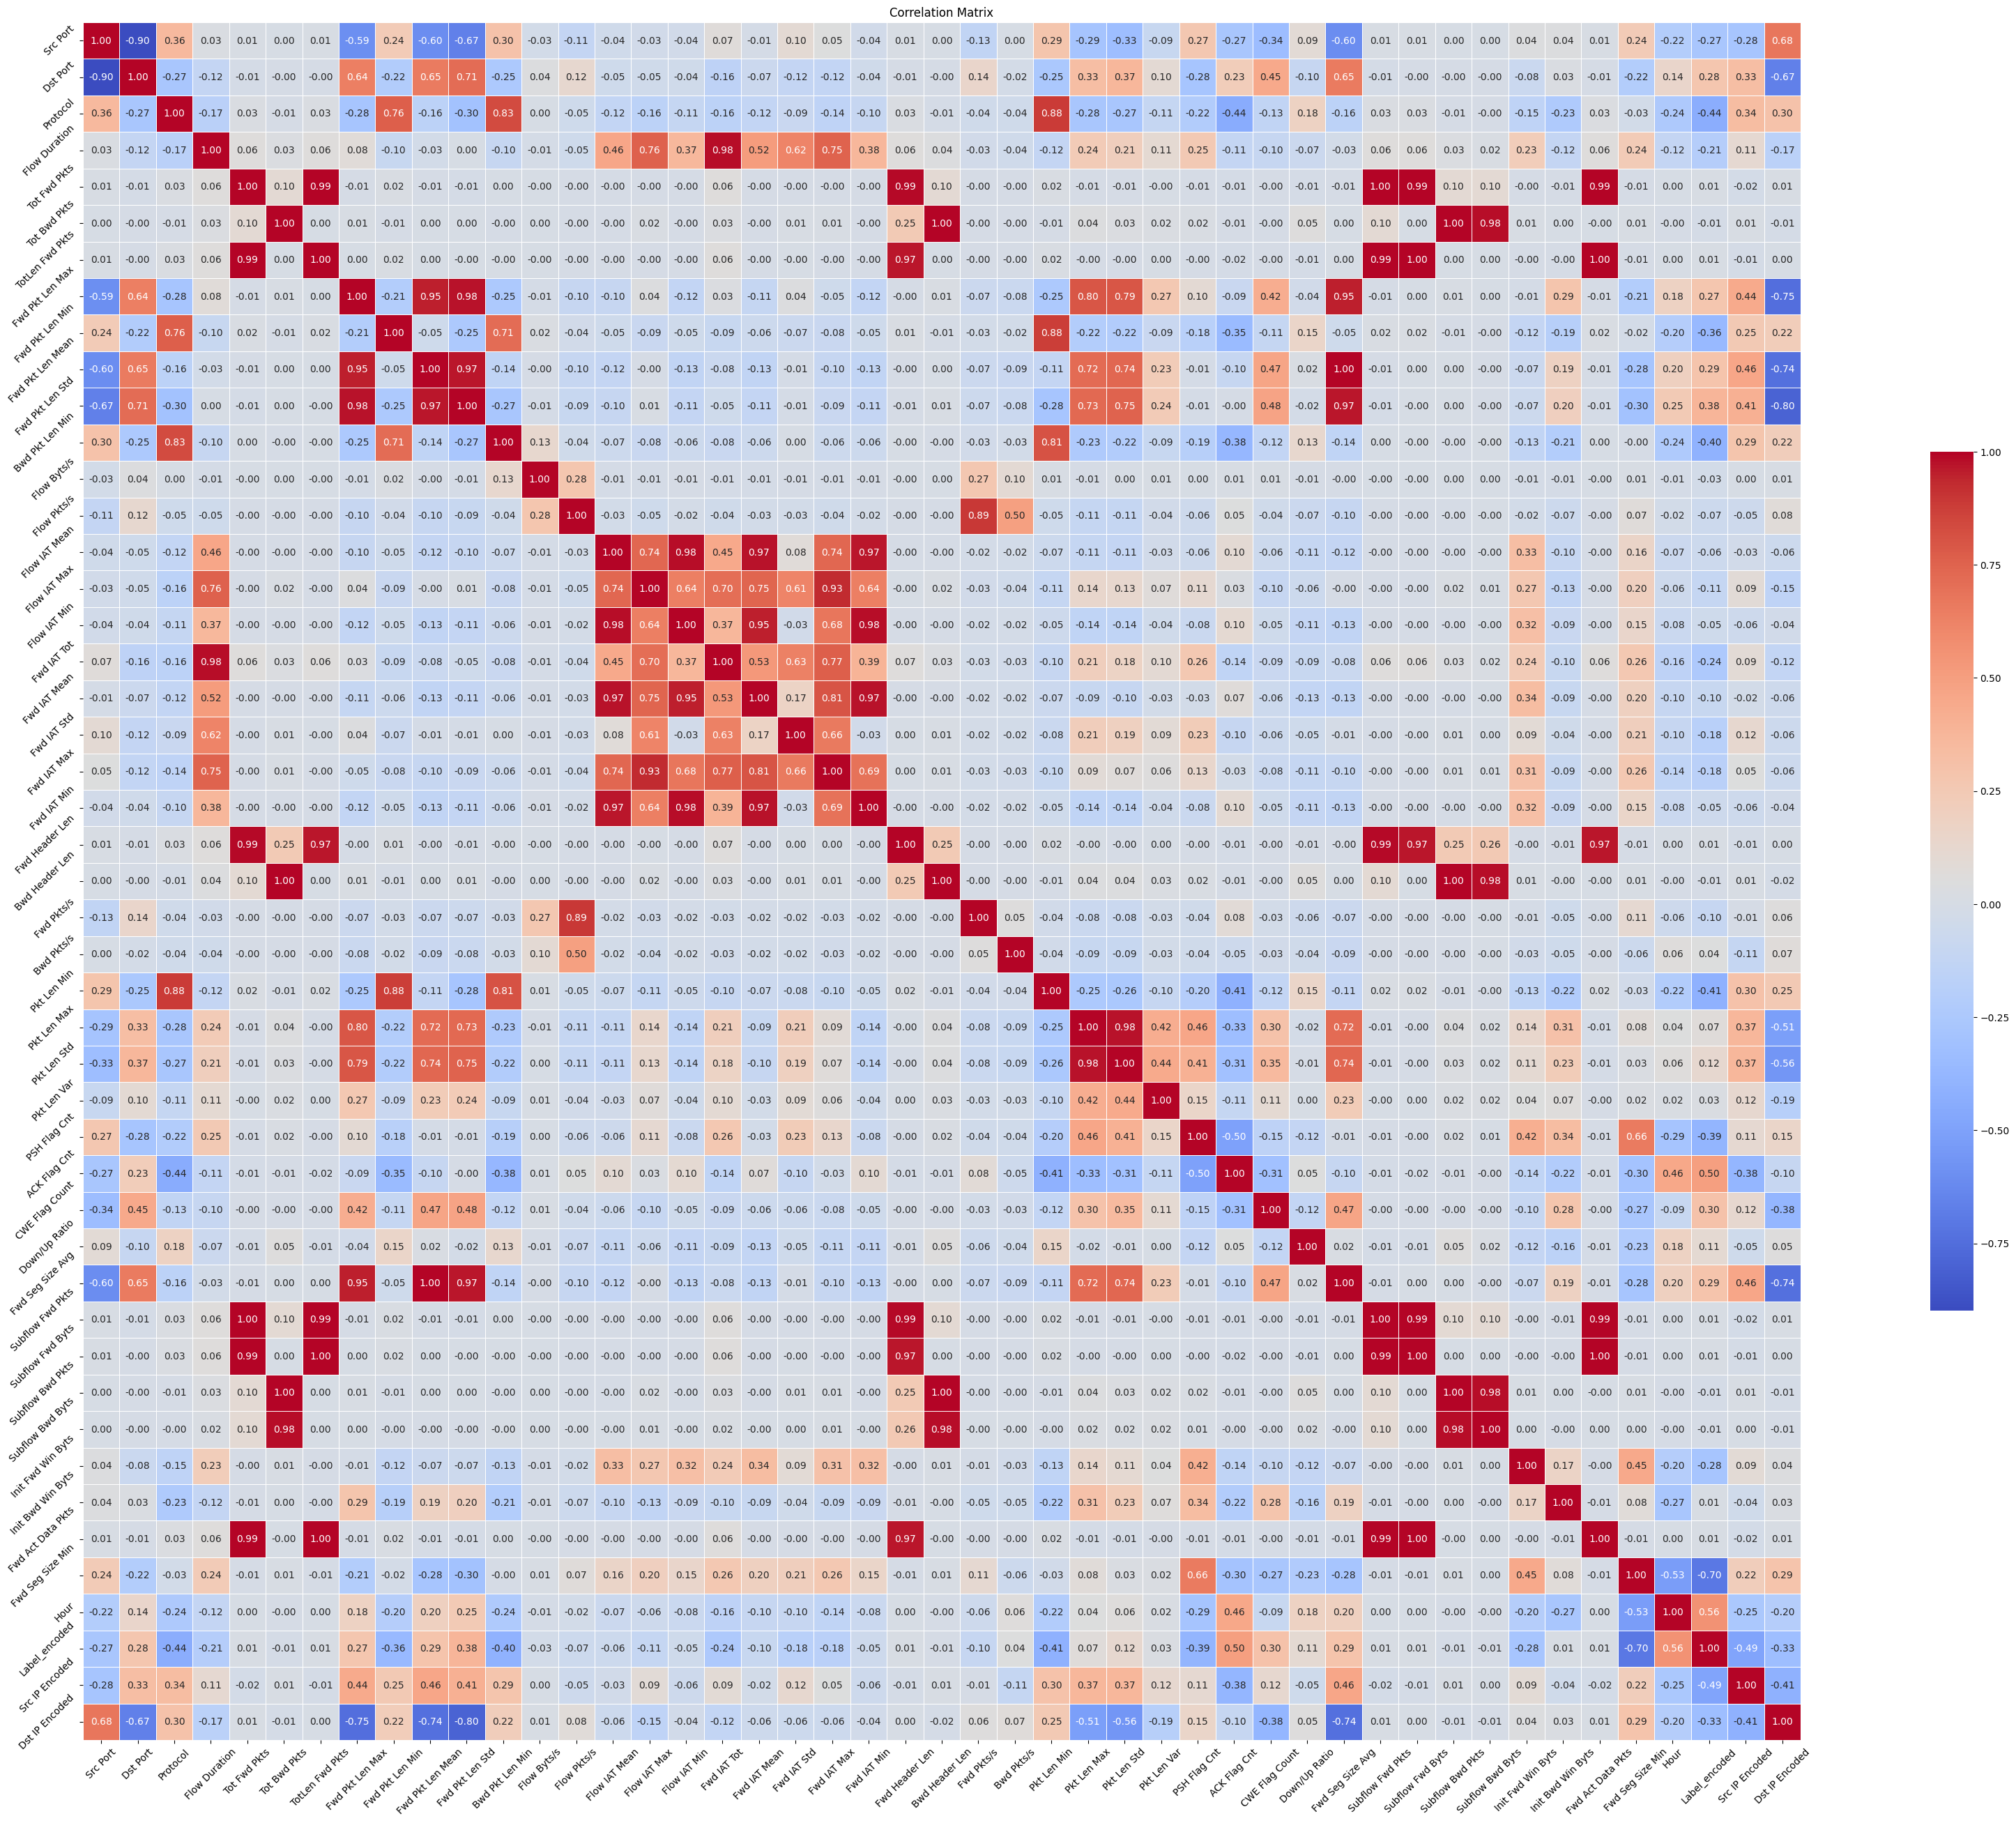

In [19]:
# Plotting Correlation matrix #2
plot_correlation_heatmap(df)

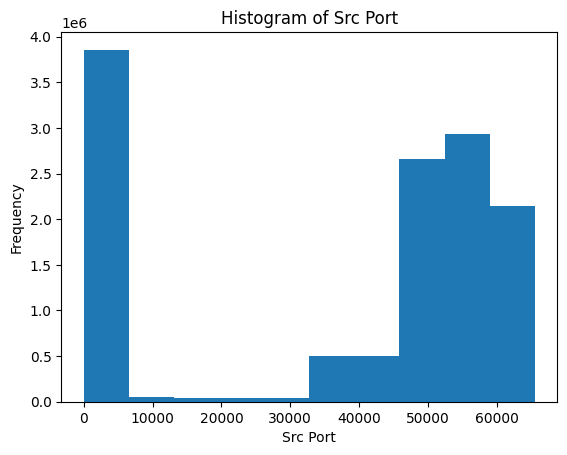

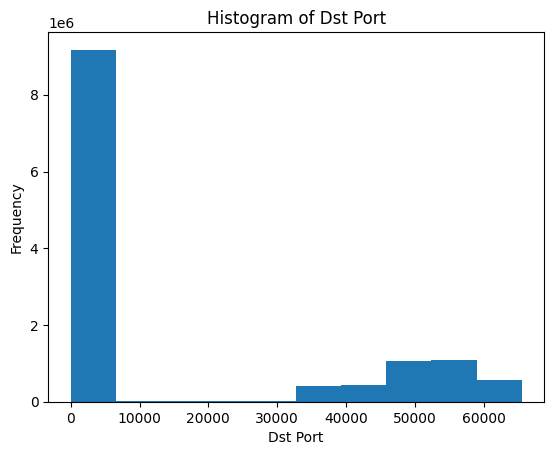

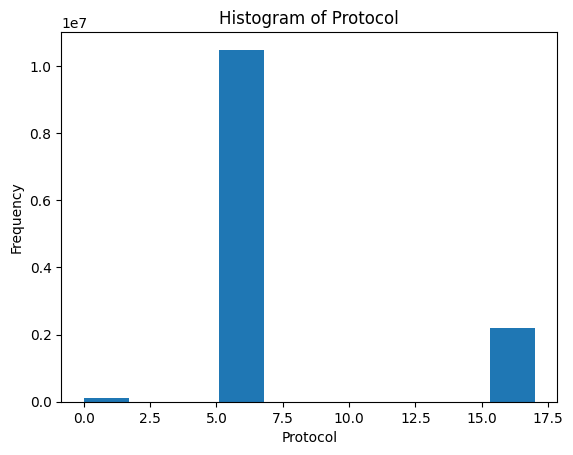

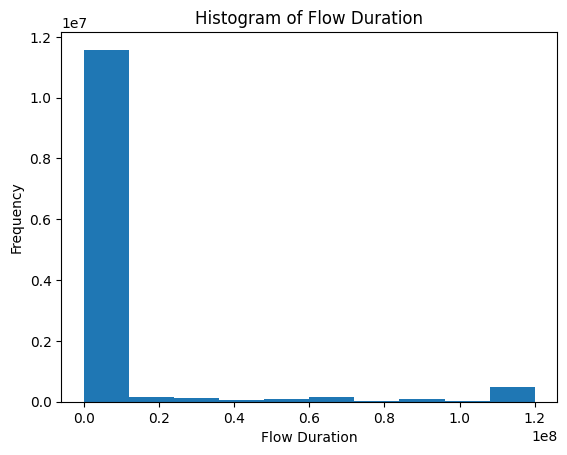

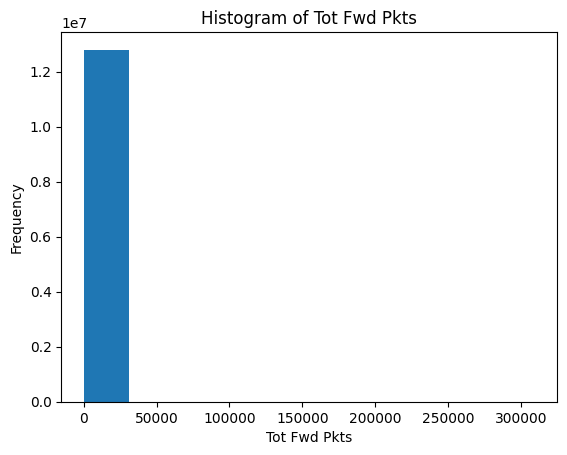

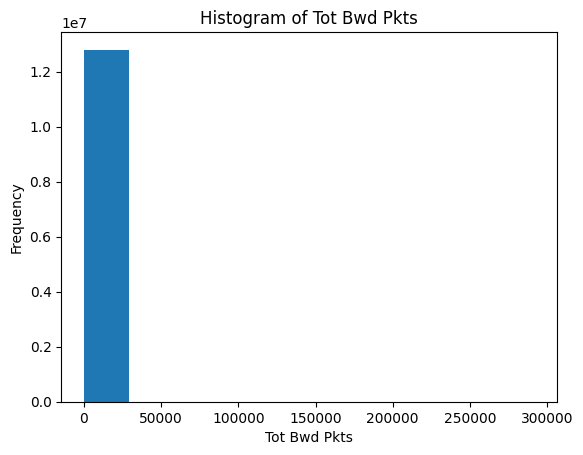

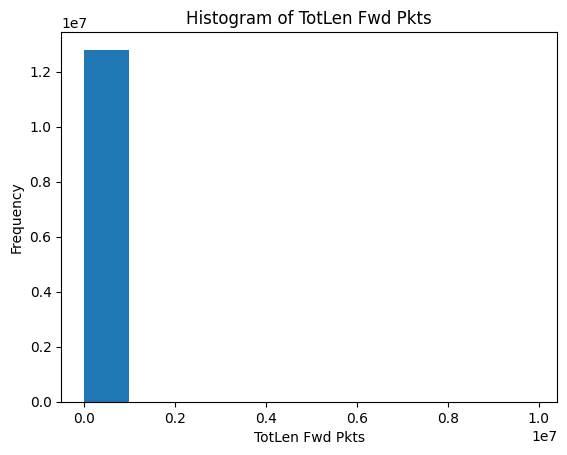

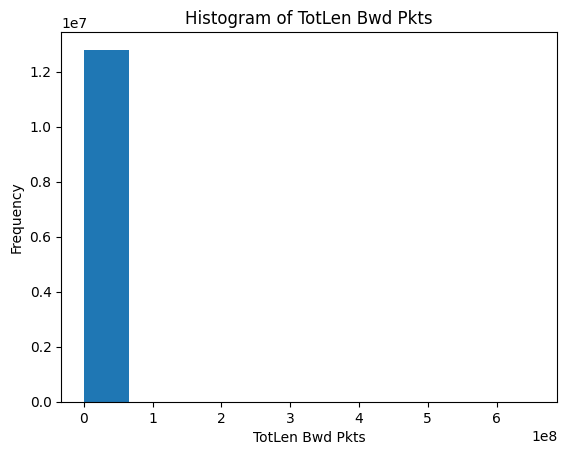

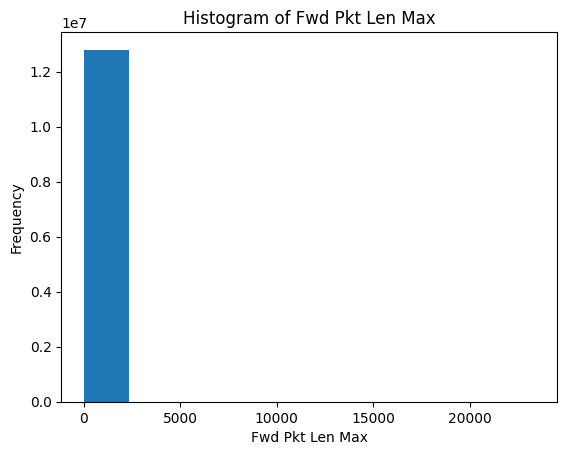

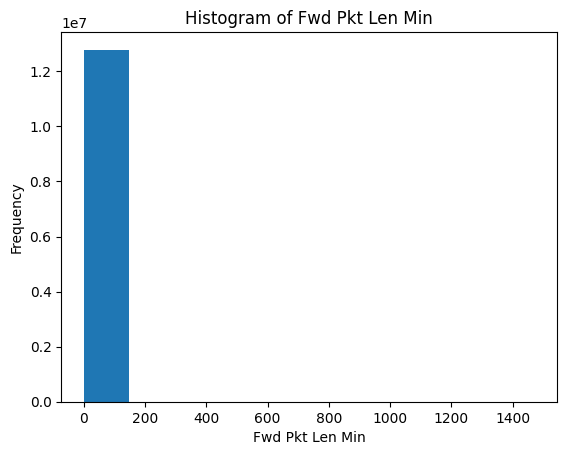

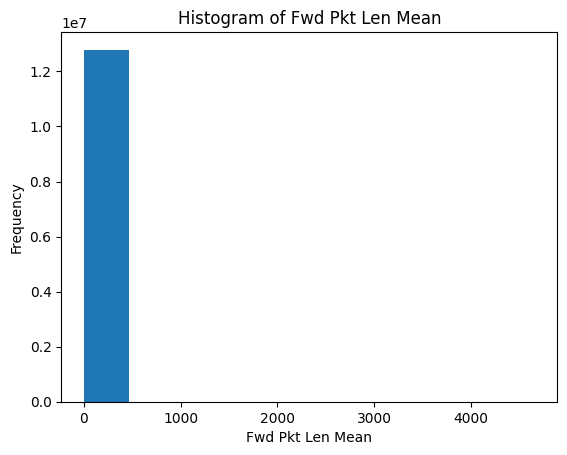

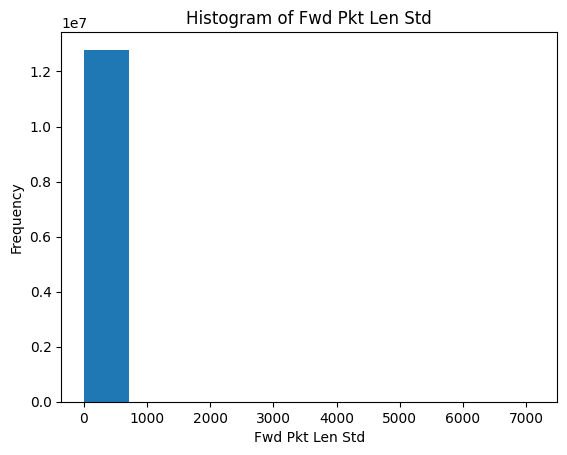

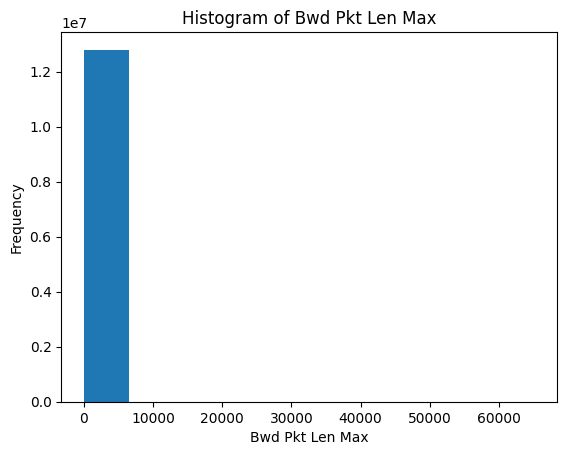

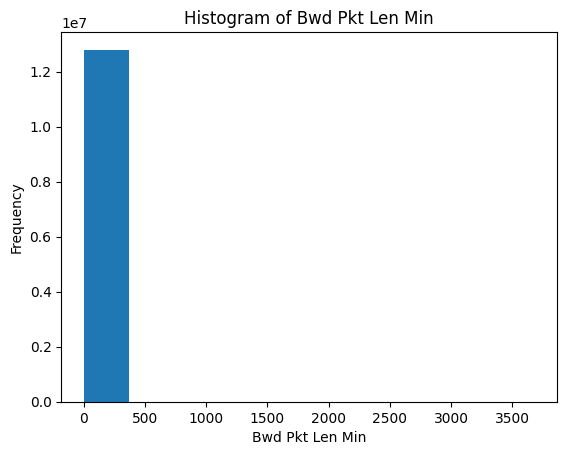

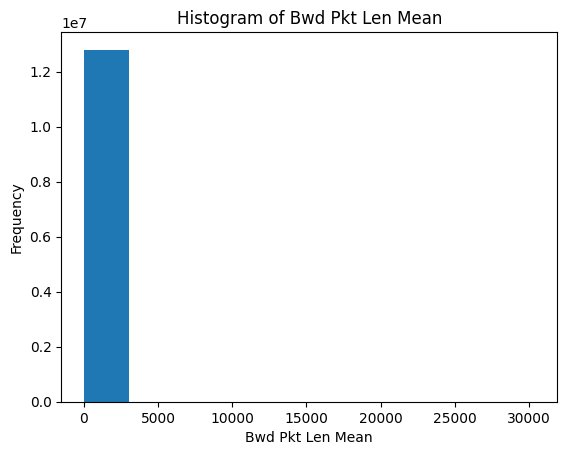

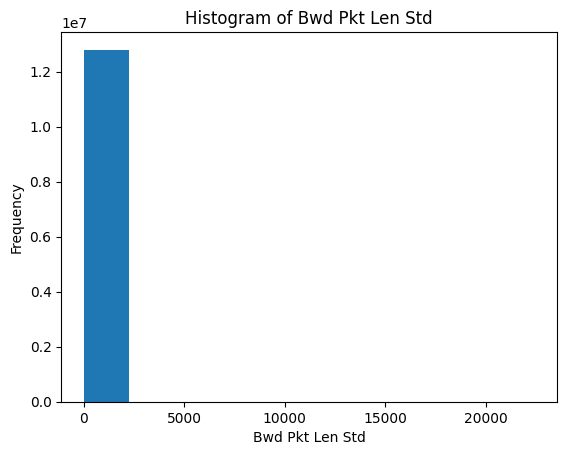

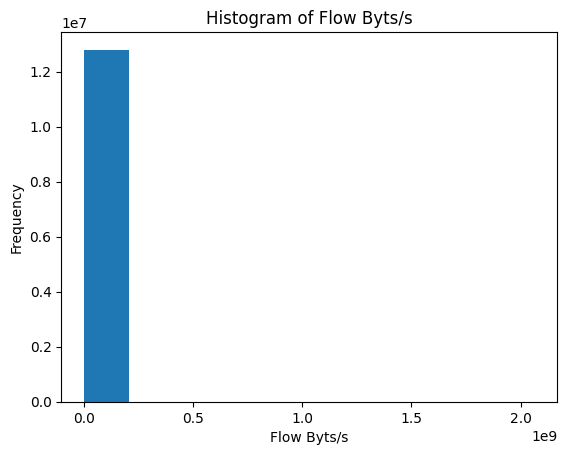

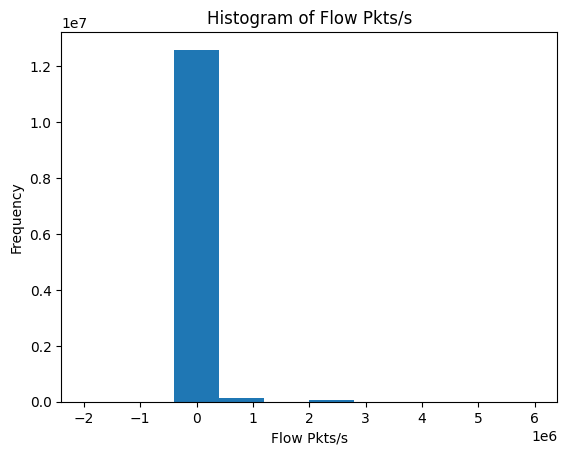

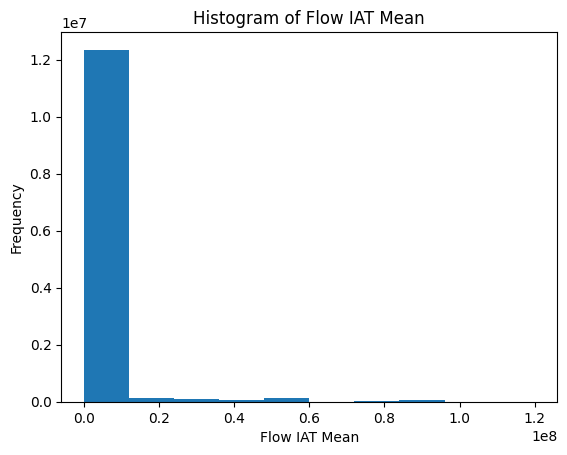

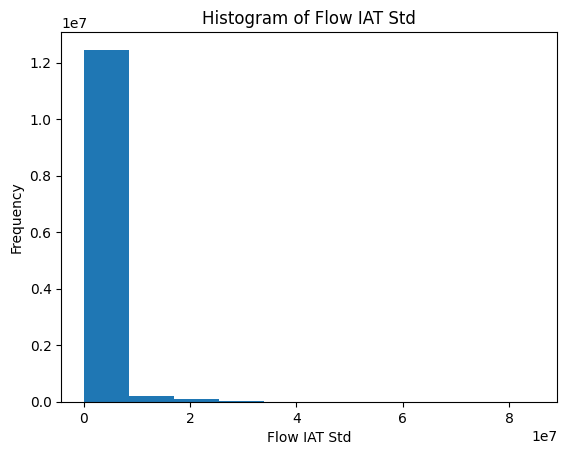

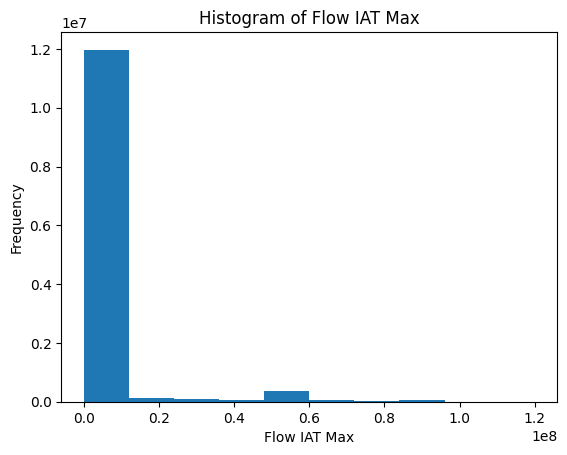

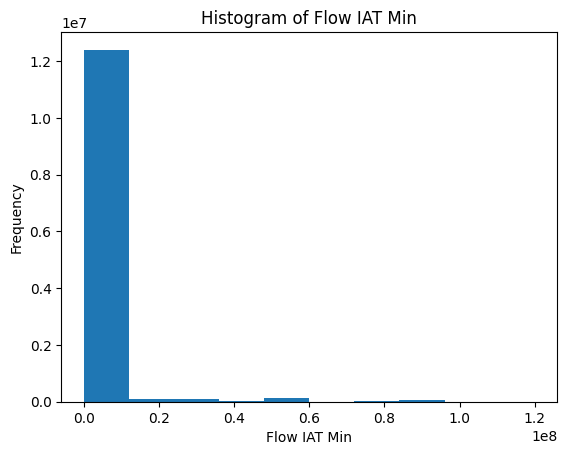

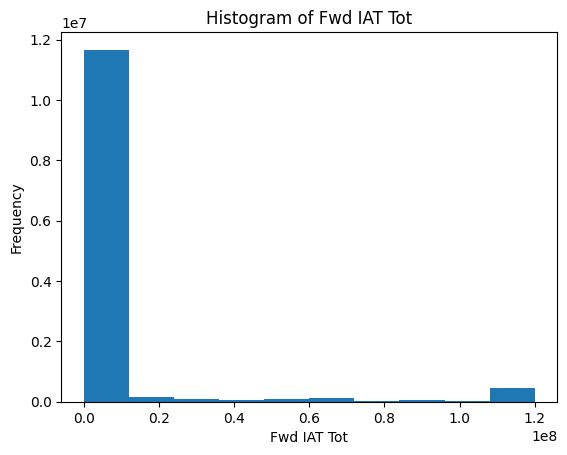

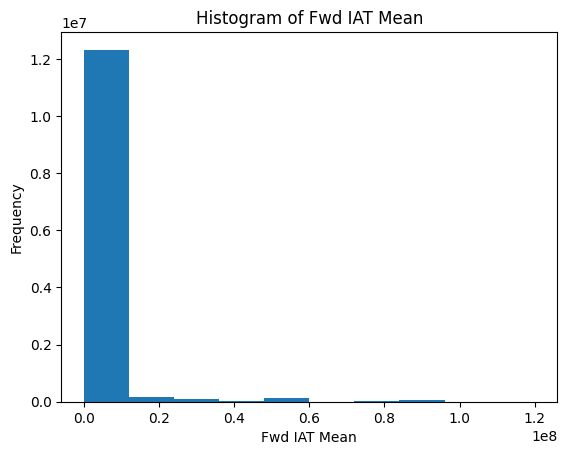

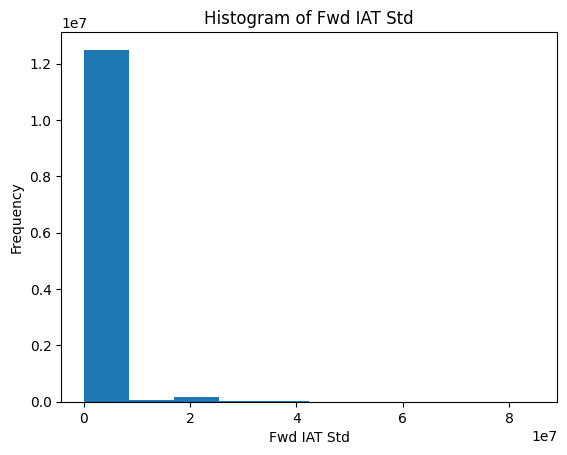

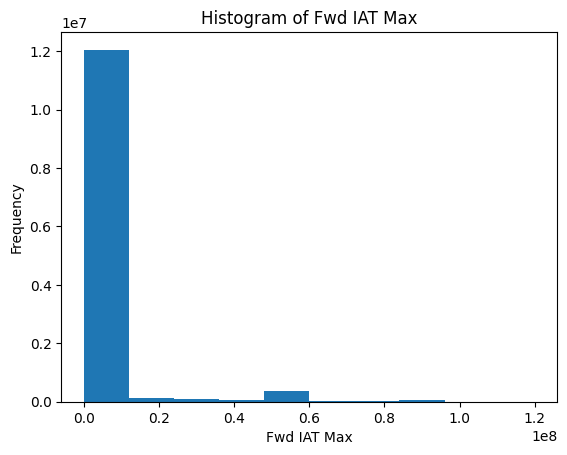

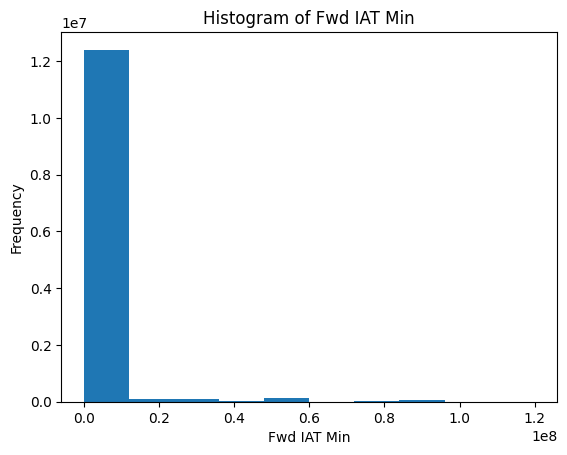

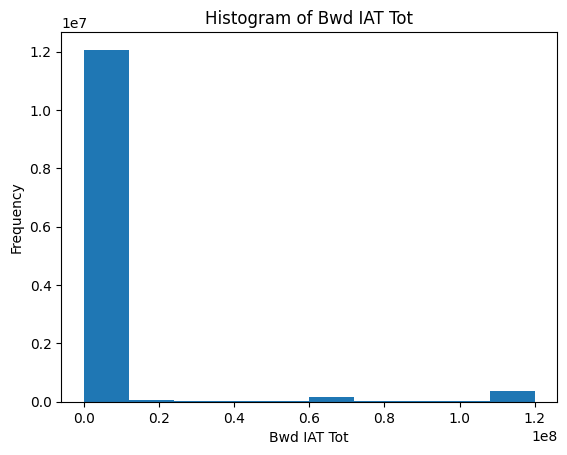

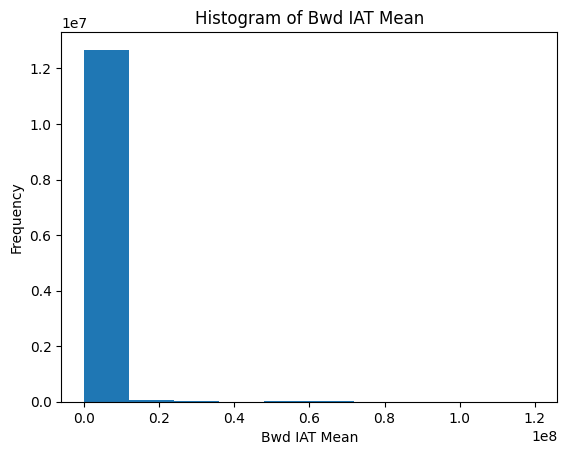

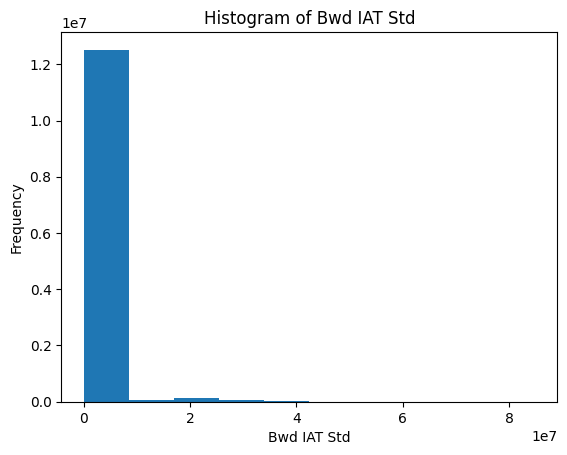

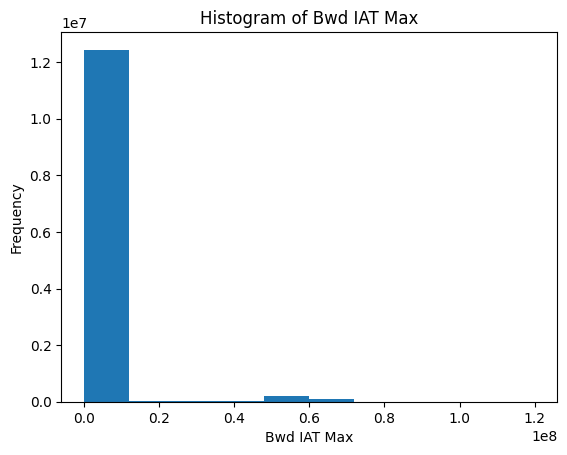

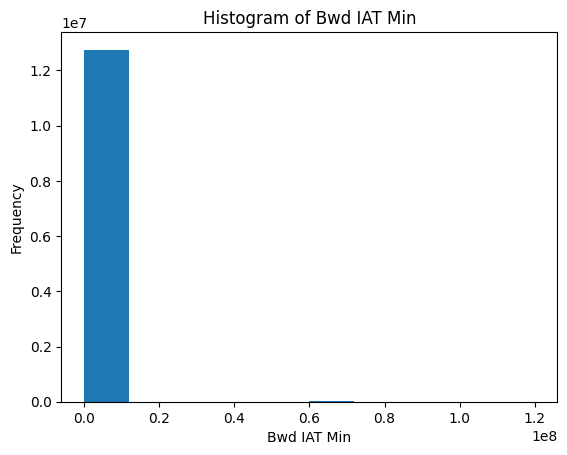

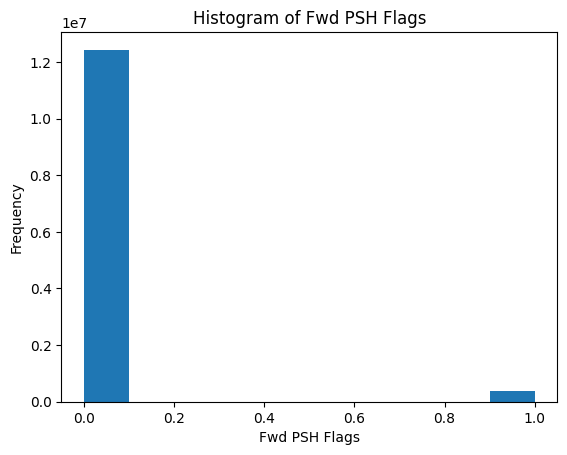

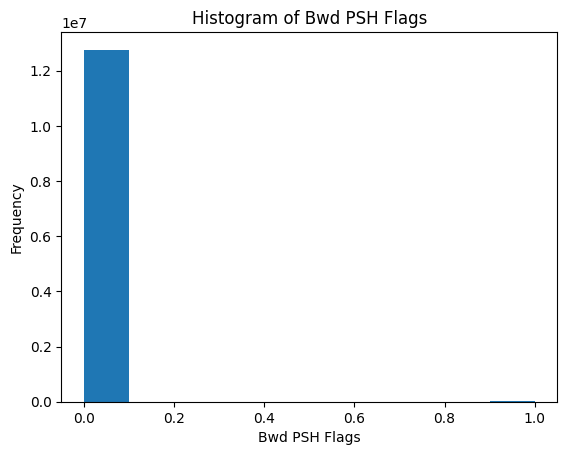

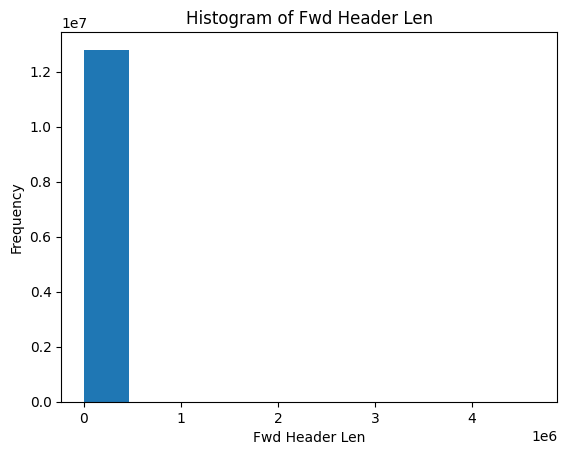

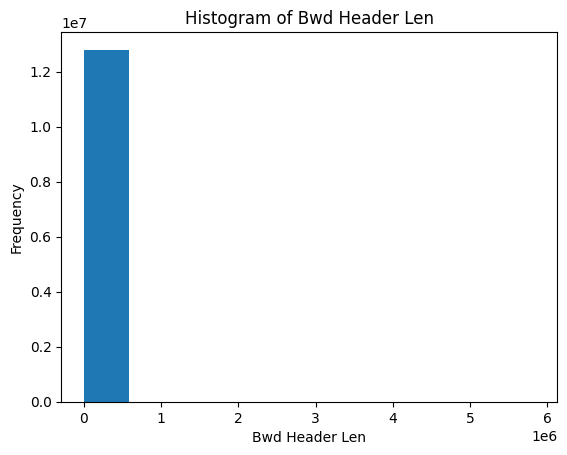

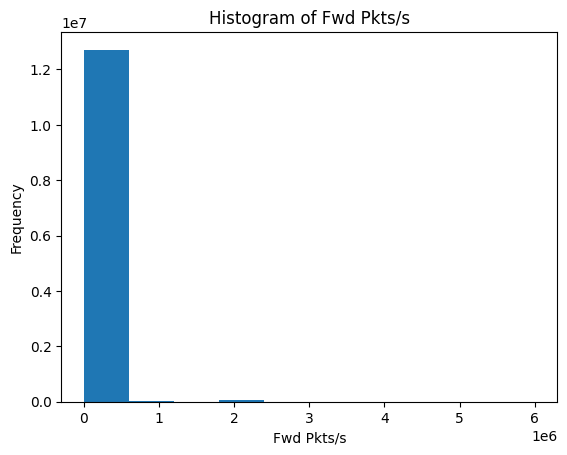

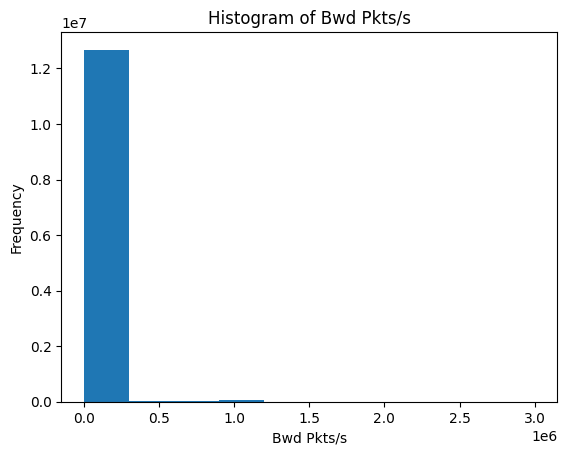

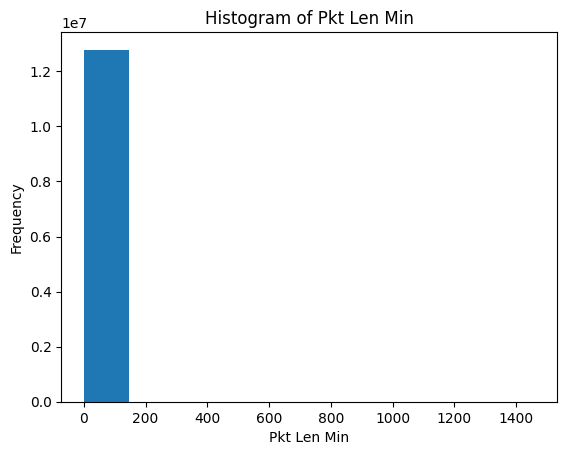

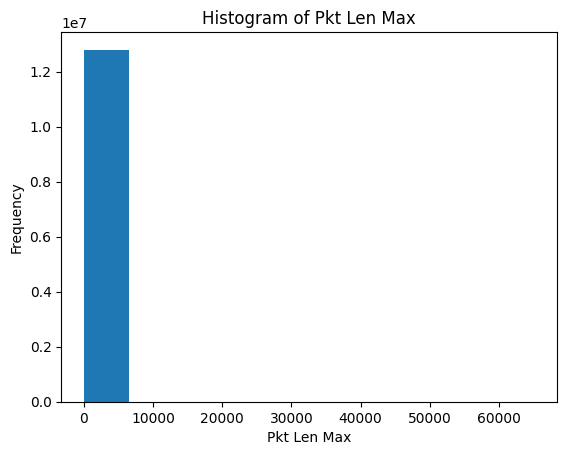

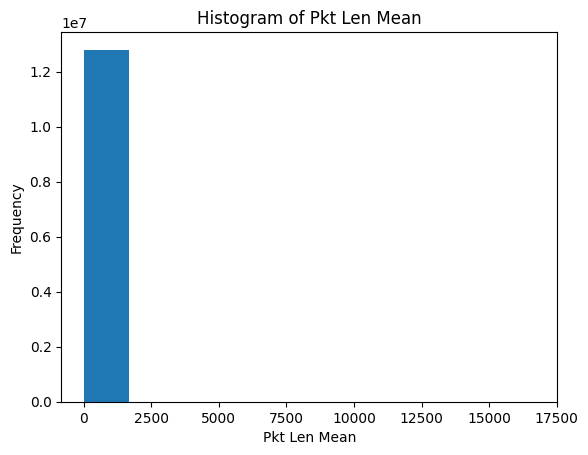

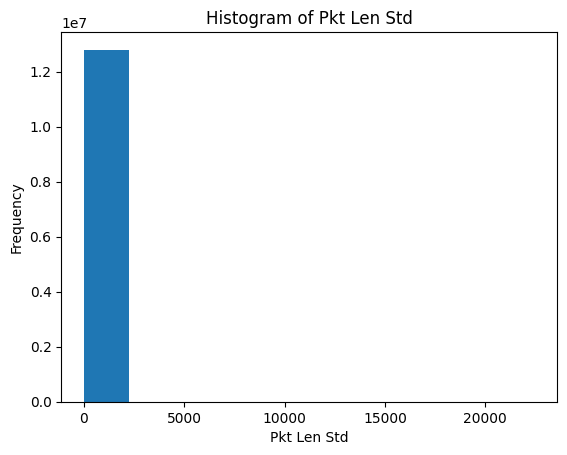

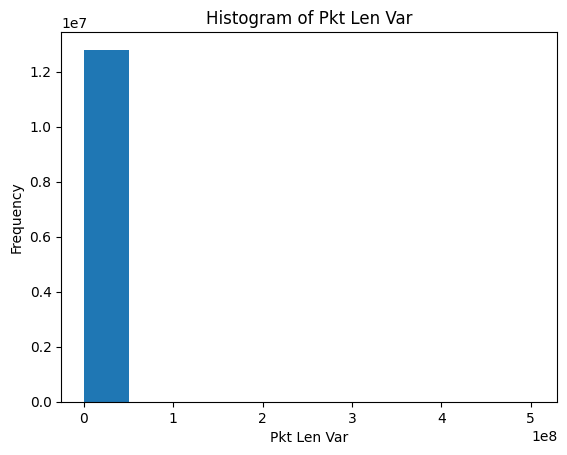

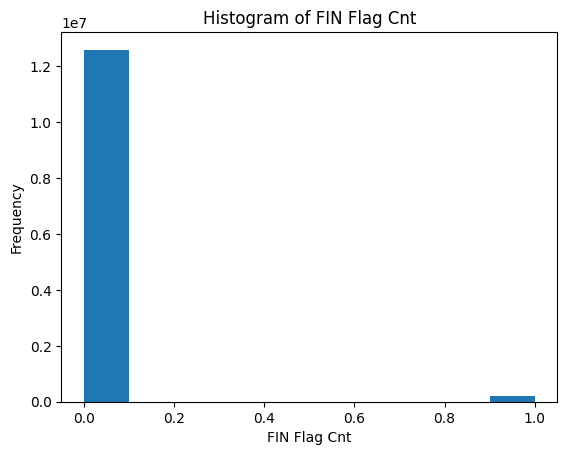

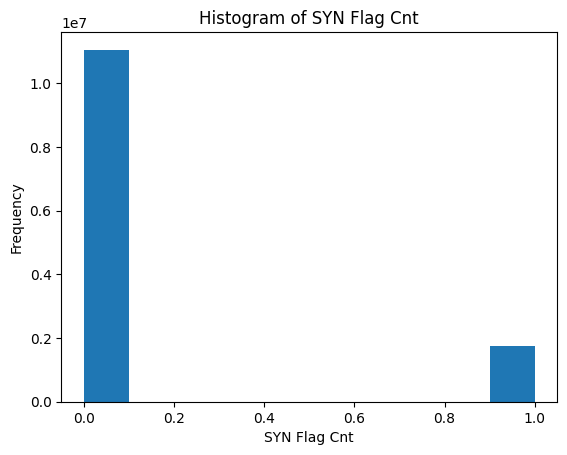

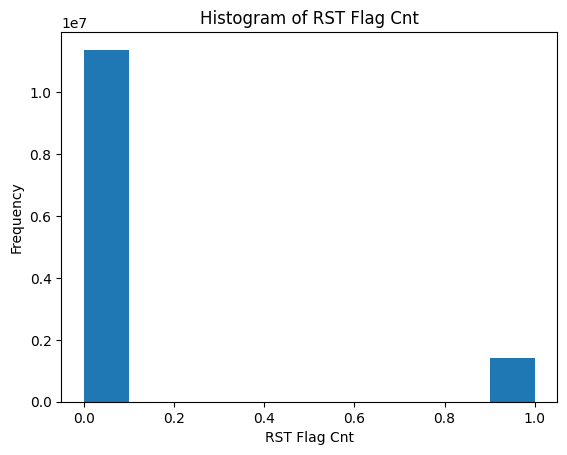

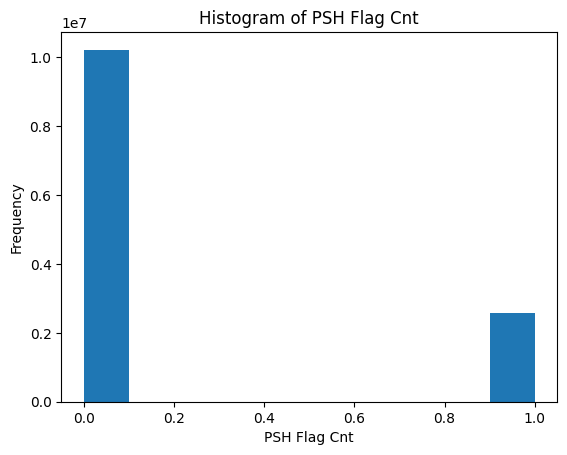

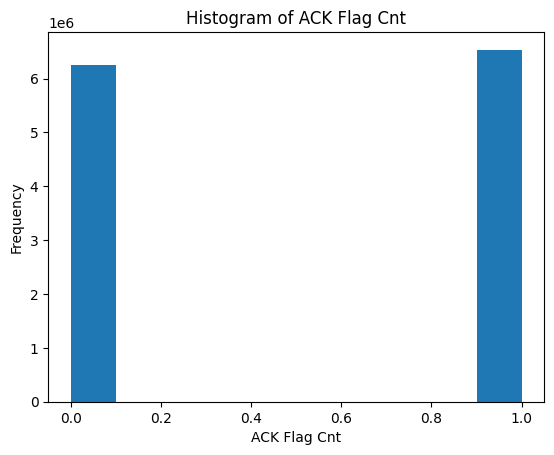

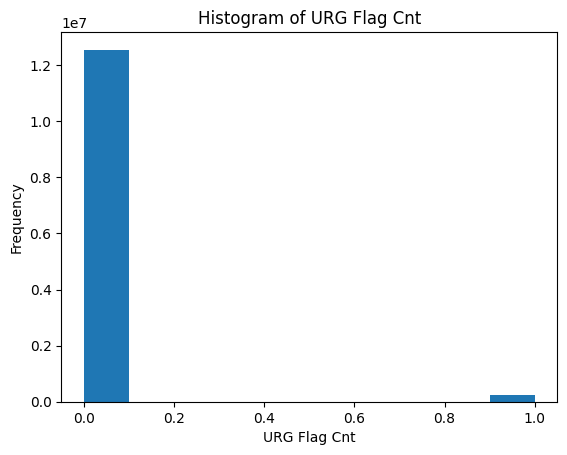

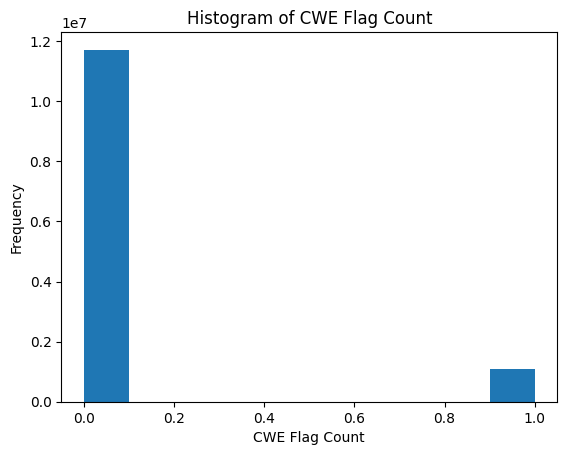

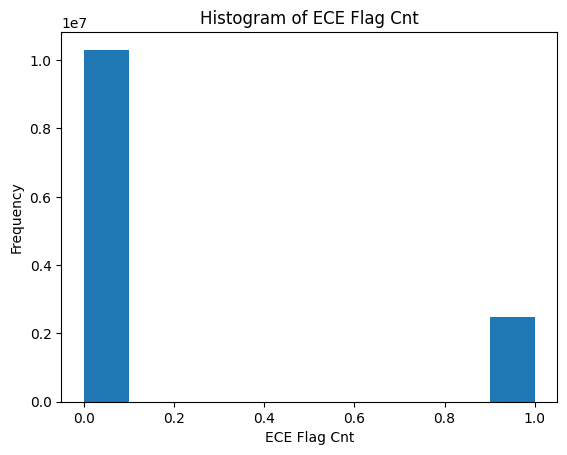

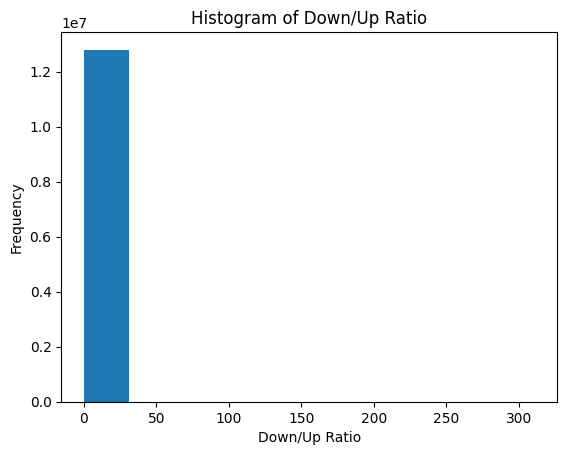

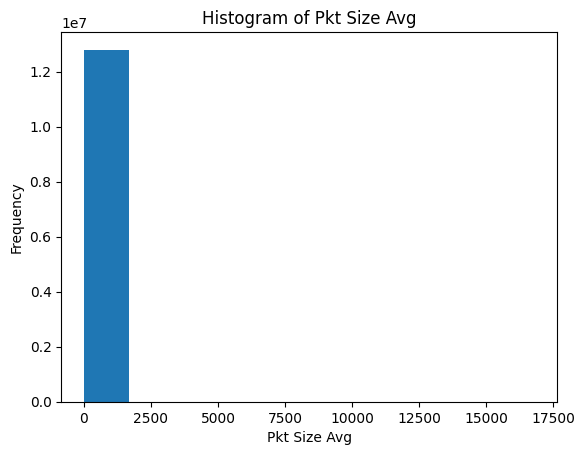

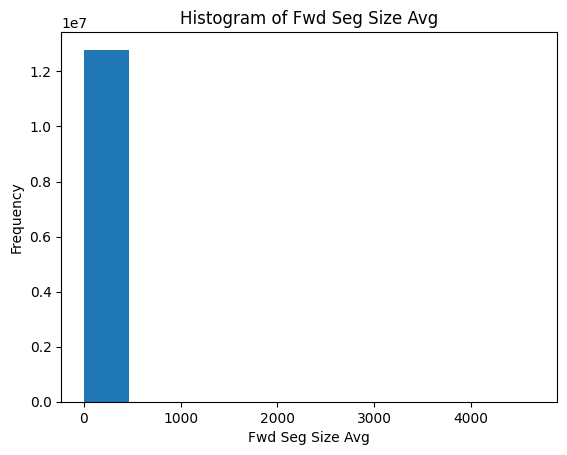

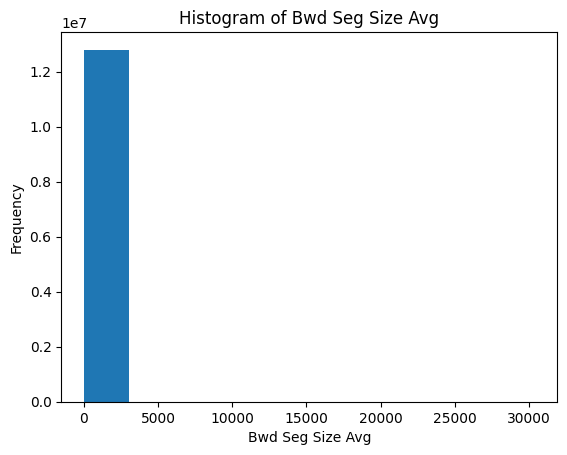

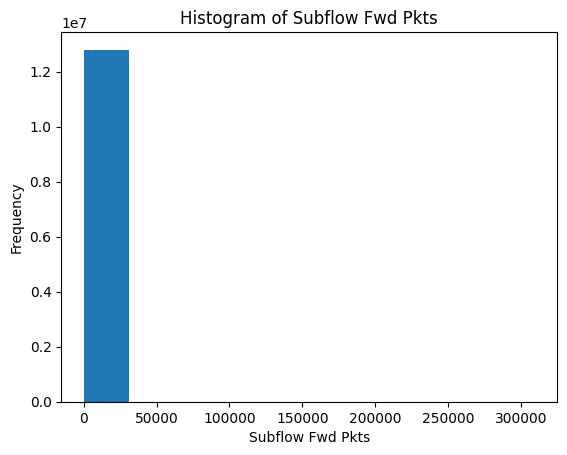

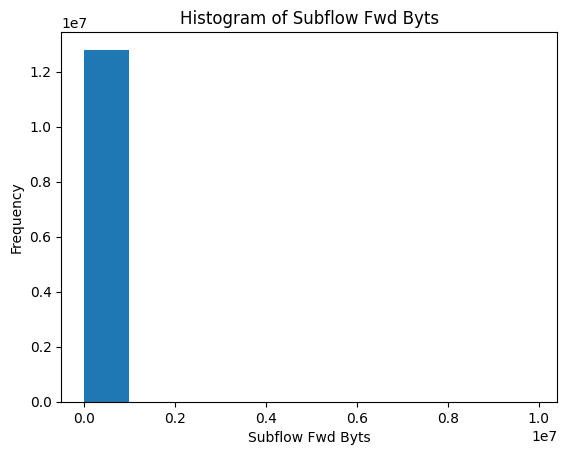

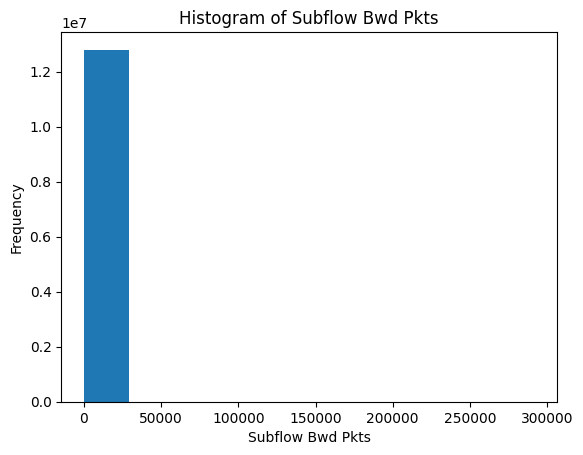

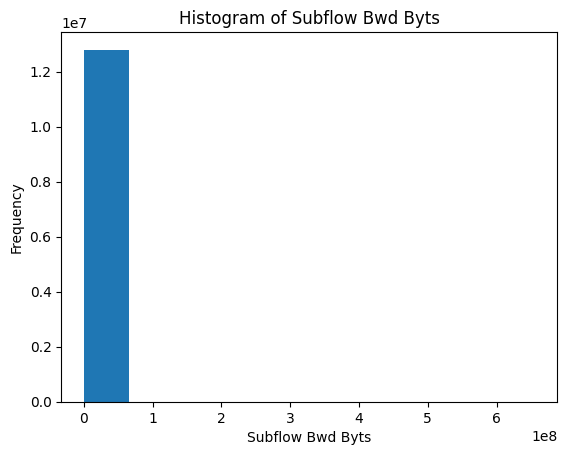

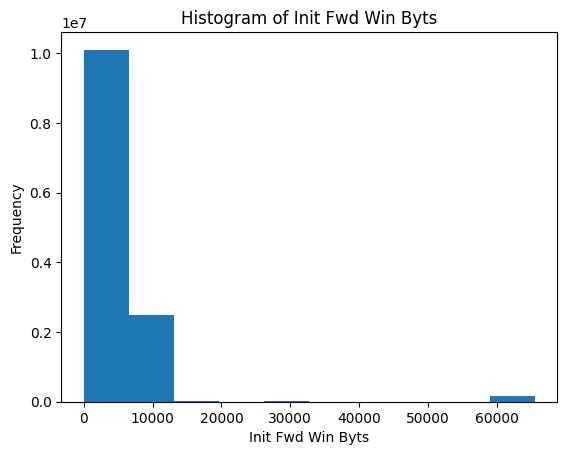

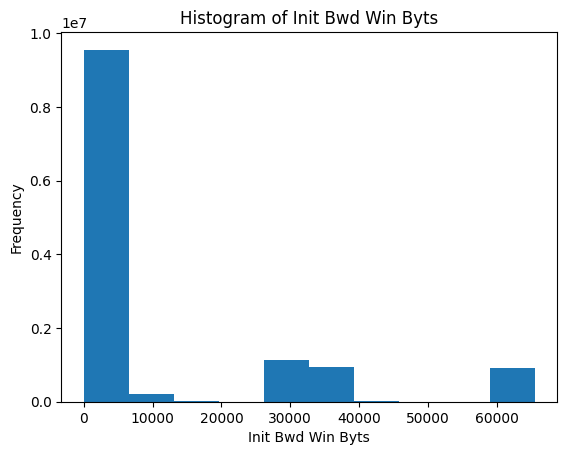

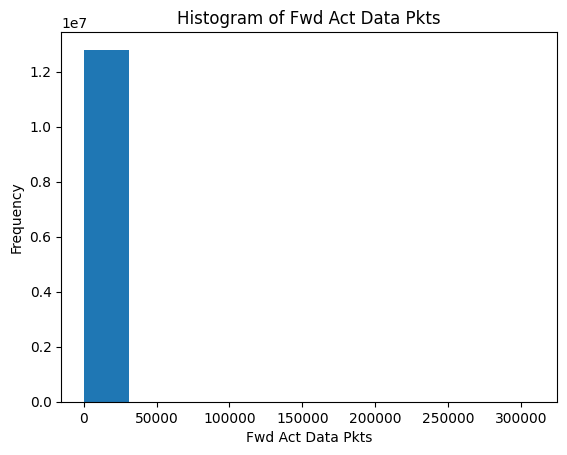

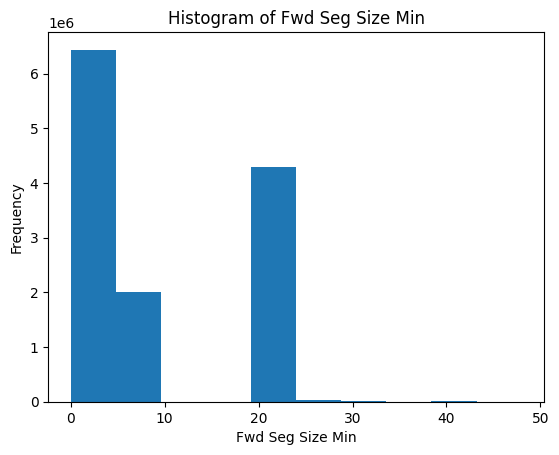

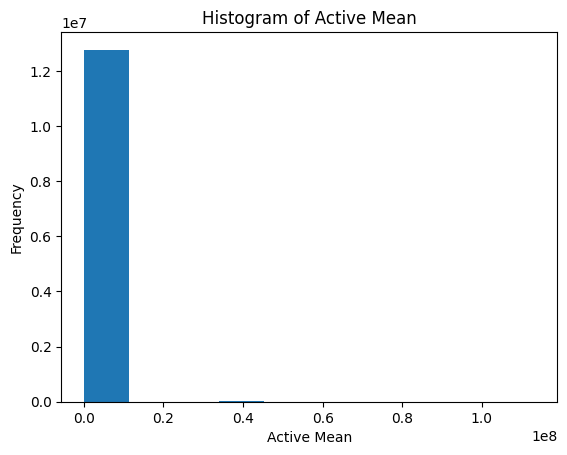

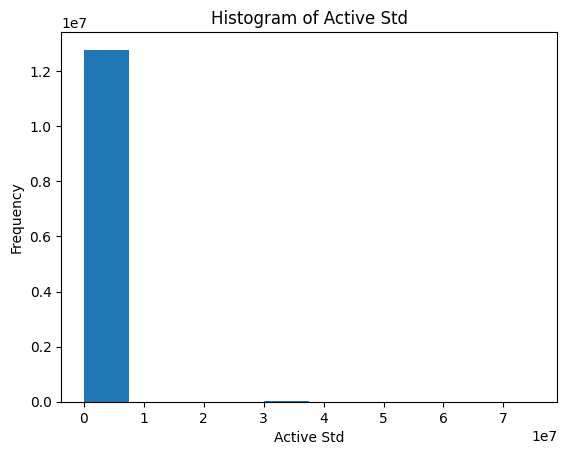

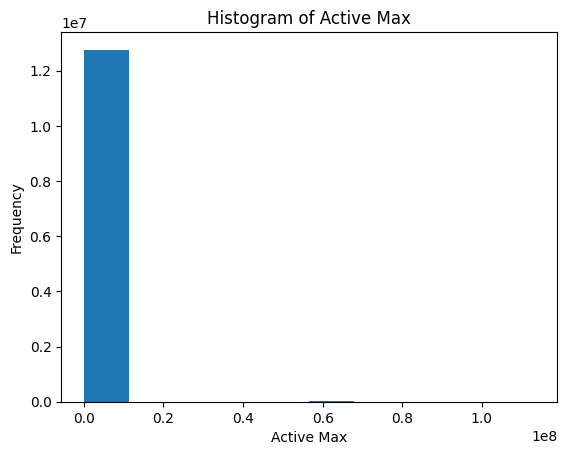

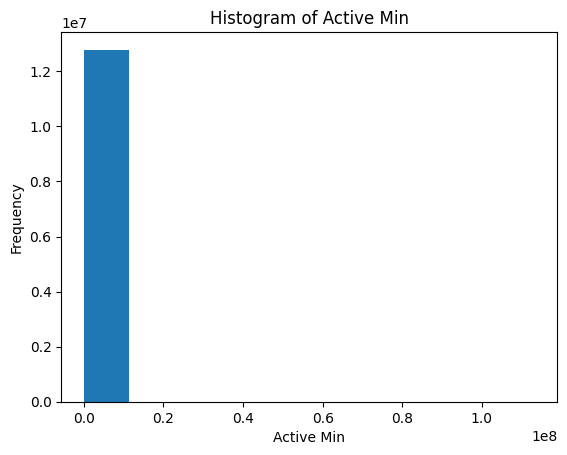

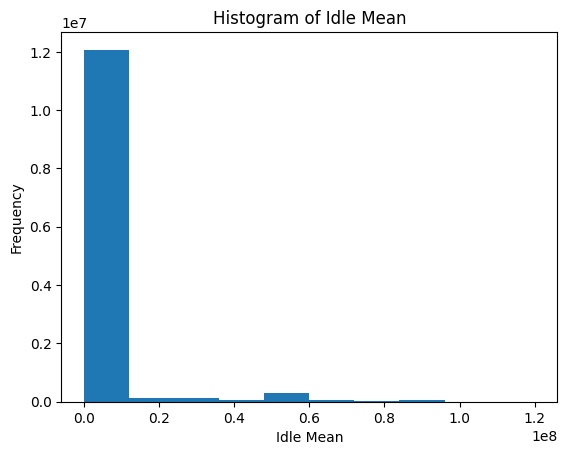

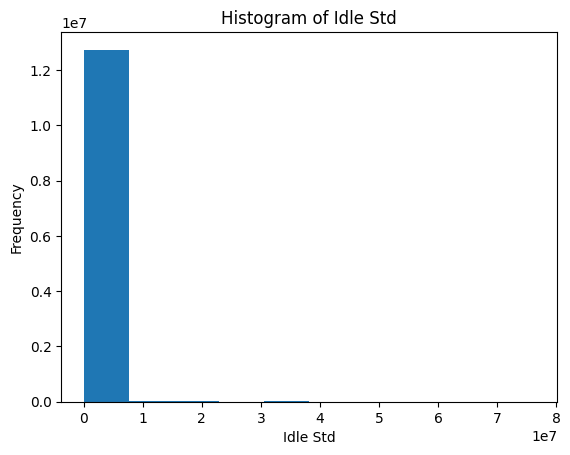

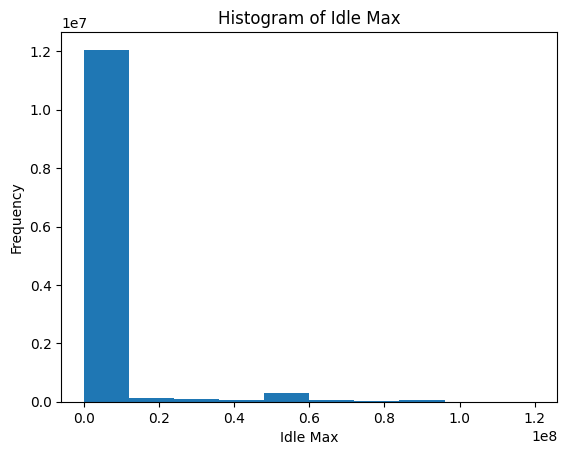

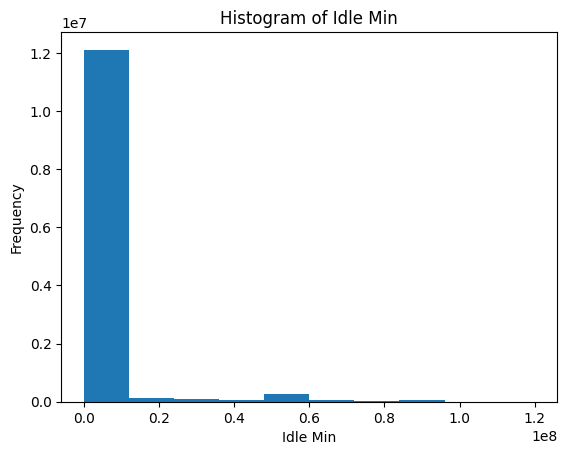

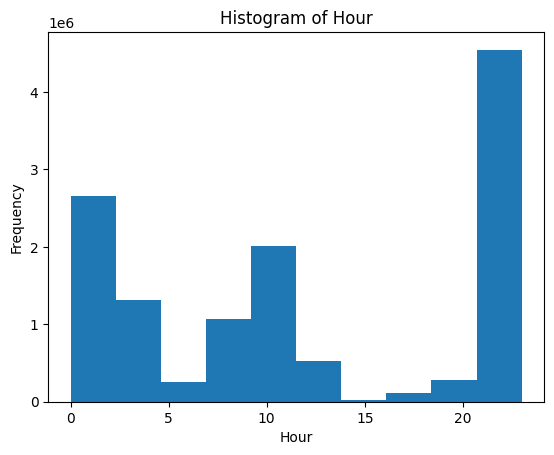

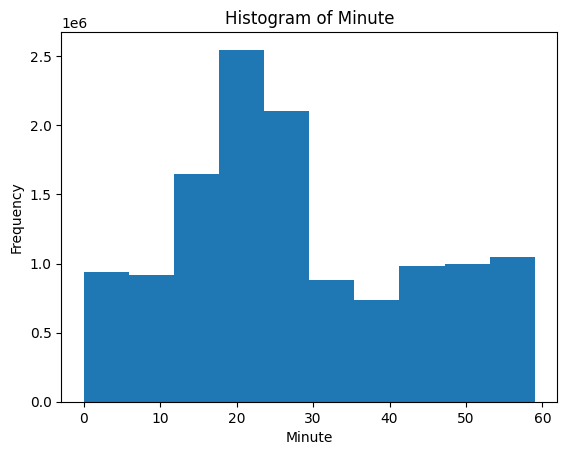

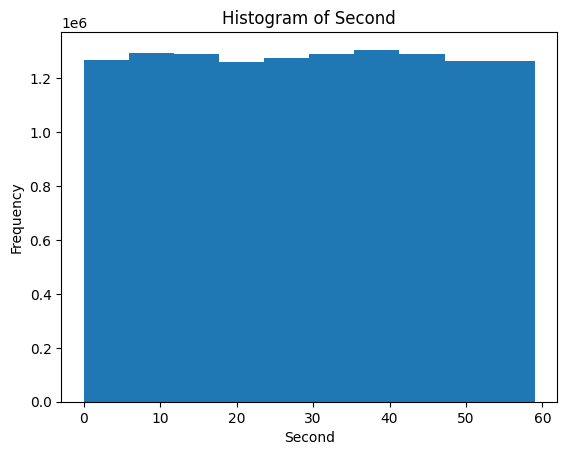

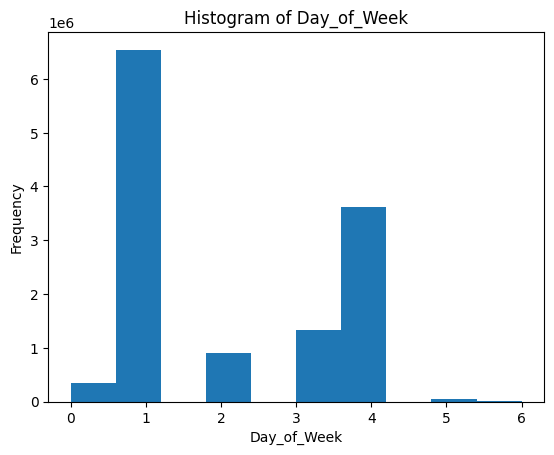

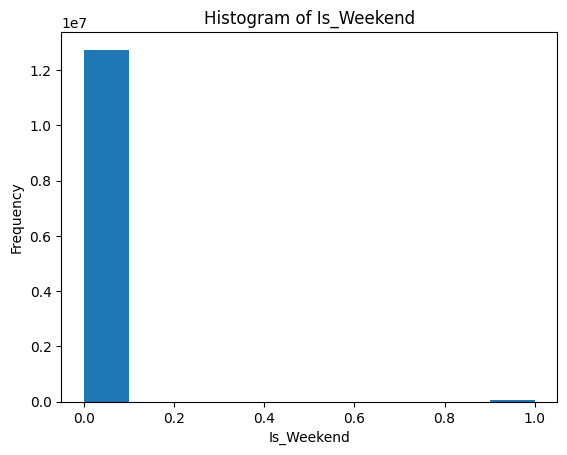

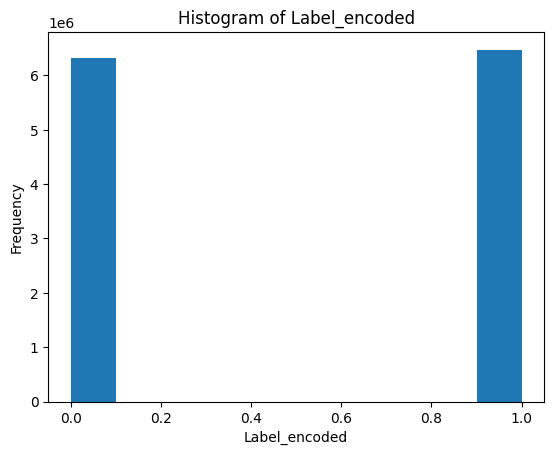

In [13]:
# Histograms for numerical data #2

numerical_columns = df.select_dtypes(include=['number']).columns

# Set the number of bins and figsize as per your preference
bins = 10
figsize = (10, 6)

# Loop through each numerical column and create a histogram
for column in numerical_columns:
    plt.hist(df[column], bins=bins)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {column}")
    plt.show()

In [13]:
# Split the whole dataset (13 million samples)

# Separate features and label
X = df.drop('Label_encoded', axis=1)  # Features
y = df['Label_encoded']  # Label
print("Features and label separated.")

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("Dataset split into training and testing sets.")

# Output the results of the split
print(f"Training Set Shape: {x_train.shape}, Testing Set Shape: {x_test.shape}")
print(f"Training Set Label Distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing Set Label Distribution:\n{y_test.value_counts(normalize=True)}")

Features and label separated.
Dataset split into training and testing sets.
Training Set Shape: (8956238, 46), Testing Set Shape: (3838389, 46)
Training Set Label Distribution:
Label_encoded
1    0.505888
0    0.494112
Name: proportion, dtype: float64
Testing Set Label Distribution:
Label_encoded
1    0.505888
0    0.494112
Name: proportion, dtype: float64


In [15]:
# Split 50k samples (for initial model testing and hyperparam tuning)
# Ensure a balanced dataset with an equal number of samples for each label
balanced_df = df.groupby('Label_encoded').apply(lambda x: x.sample(n=25000, random_state=42)).reset_index(drop=True)

# Separate features and label
X_balanced = balanced_df.drop('Label_encoded', axis=1)  # Features
y_balanced = balanced_df['Label_encoded']  # Label
print("Features and label separated from the balanced dataset.")

# Split the dataset into training and testing sets (70/30 split)
x_train, x_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42, stratify=y_balanced)
print("Balanced dataset split into training and testing sets.")

# Output the results of the split
print(f"Training Set Shape: {x_train.shape}, Testing Set Shape: {x_test.shape}")
print(f"Training Set Label Distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Testing Set Label Distribution:\n{y_test.value_counts(normalize=True)}")

Features and label separated from the balanced dataset.
Balanced dataset split into training and testing sets.
Training Set Shape: (35000, 46), Testing Set Shape: (15000, 46)
Training Set Label Distribution:
Label_encoded
1    0.5
0    0.5
Name: proportion, dtype: float64
Testing Set Label Distribution:
Label_encoded
0    0.5
1    0.5
Name: proportion, dtype: float64


In [15]:
# Random Forest Preparation + hyperparam tuning + performance evaluation 

# Record the start time
start_time = time.time()

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Calculate the time taken for training
training_time = time.time() - start_time

# Record the start time for hyperparameter tuning
tuning_start_time = time.time()

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='recall')
grid_search.fit(x_train, y_train)

# Calculate the time taken for hyperparameter tuning
tuning_time = time.time() - tuning_start_time

# Evaluate the tuned model
best_rf = grid_search.best_estimator_
tuned_predictions = best_rf.predict(x_test)

prediction_start_time = time.time()

print("Tuned Model Accuracy:", accuracy_score(y_test, tuned_predictions))
print("Classification Report:\n", classification_report(y_test, tuned_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, tuned_predictions))
print("Best Parameters:", grid_search.best_params_)

# Calculate the time taken for prediction
prediction_time = time.time() - prediction_start_time

# Calculate the total running time
total_time = time.time() - start_time

print(f"Training Time: {training_time:.2f} seconds")
print(f"Tuning Time: {tuning_time:.2f} seconds")
print(f"Prediction Time: {prediction_time:.2f} seconds")
print(f"Total Running Time: {total_time:.2f} seconds")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Tuned Model Accuracy: 0.9996
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7500
           1       1.00      1.00      1.00      7500

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Confusion Matrix:
 [[7499    1]
 [   5 7495]]
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Training Time: 7.75 seconds
Tuning Time: 324.11 seconds
Prediction Time: 0.02 seconds
Total Running Time: 332.06 seconds


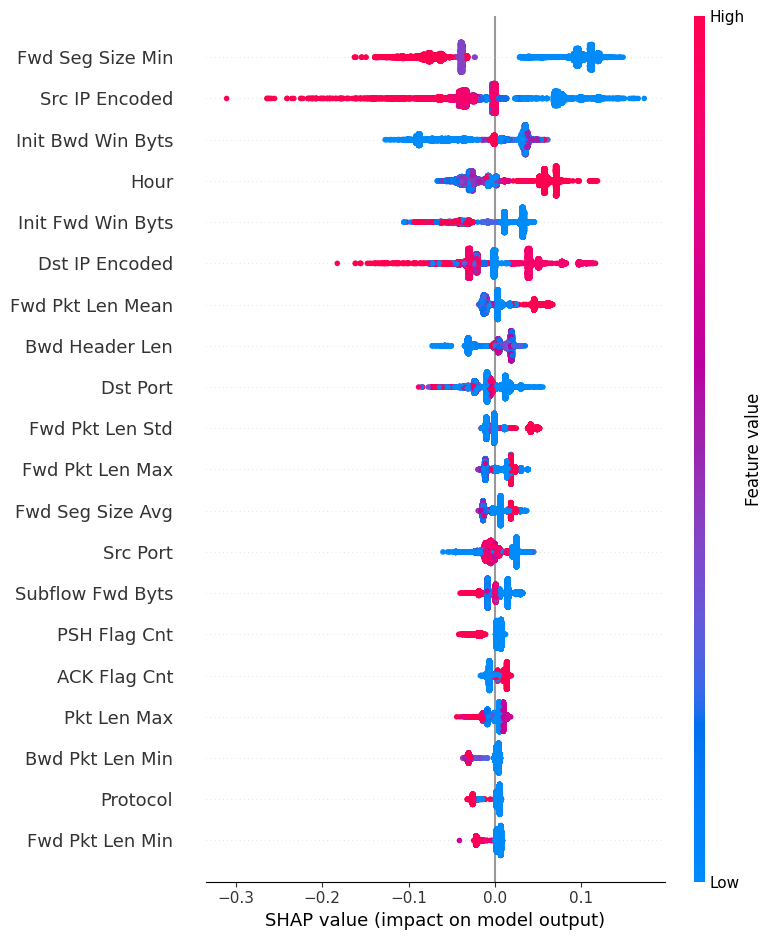

SHAP Calculation Time: 36.53 seconds
Visualization Time: 0.00 seconds
Total Time: 38.11 seconds


In [16]:
# SHAP for feature importance and impact on model

start_time = time.time()
# Create the SHAP explainer object with Random Forest model
explainer = shap.TreeExplainer(best_rf)
# Calculate SHAP values
shap_values = explainer.shap_values(x_test)
# Calculate the time taken for calculating SHAP values
shap_calculation_time = time.time() - start_time
# Visualize the first prediction's explanation
shap.initjs()  # Initialize JavaScript visualization in Jupyter
# Record the start time for visualization
visualization_start_time = time.time()
# Visualize the first prediction's explanation
shap.force_plot(explainer.expected_value[1], shap_values[1][0], x_test.iloc[0])
# Calculate the time taken for visualization
visualization_time = time.time() - visualization_start_time
# Summary plot
shap.summary_plot(shap_values[1], x_test)
# Calculate the time taken for the entire process
total_time = time.time() - start_time

print(f"SHAP Calculation Time: {shap_calculation_time:.2f} seconds")
print(f"Visualization Time: {visualization_time:.2f} seconds")
print(f"Total Time: {total_time:.2f} seconds")

In [20]:
# mini batches \ ensemble model \ enhanced evaluation 

# Function to split data into mini-batches
def batch_splitter(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

# Define the size of each mini-batch
batch_size = 650000  # Adjustable 
num_batches = math.ceil(len(x_train) / batch_size)

# Initialize a list to store mini-batch trained models
mini_batch_models = []

# Mini-batch training
print("Training on mini-batches:")
for i, (X_mini, y_mini) in enumerate(batch_splitter(x_train, y_train, batch_size)):
    print(f"Training batch {i + 1}/{num_batches}...")
    rf_mini = RandomForestClassifier(random_state=42, n_estimators=1, max_depth=15) # Adjustable 
    rf_mini.fit(X_mini, y_mini)
    mini_batch_models.append(rf_mini)

print("Mini-batch training completed.")

# Function to aggregate predictions from all mini-batch models
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    predictions = np.array(predictions)
    final_prediction = np.mean(predictions, axis=0).round()  # Rounding for classification
    return final_prediction

# Function to aggregate probabilities from all mini-batch models for ROC AUC
def ensemble_predict_proba(models, X):
    probabilities = np.mean([model.predict_proba(X)[:, 1] for model in models], axis=0)
    return probabilities

# Evaluation of the ensemble model
ensemble_predictions = ensemble_predict(mini_batch_models, x_test)
ensemble_probabilities = ensemble_predict_proba(mini_batch_models, x_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, ensemble_predictions)
precision = precision_score(y_test, ensemble_predictions)
recall = recall_score(y_test, ensemble_predictions)
f1 = f1_score(y_test, ensemble_predictions)
roc_auc = roc_auc_score(y_test, ensemble_probabilities)

print("Ensemble Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", classification_report(y_test, ensemble_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ensemble_predictions))


Training on mini-batches:
Training batch 1/180...
Training batch 2/180...
Training batch 3/180...
Training batch 4/180...
Training batch 5/180...
Training batch 6/180...
Training batch 7/180...
Training batch 8/180...
Training batch 9/180...
Training batch 10/180...
Training batch 11/180...
Training batch 12/180...
Training batch 13/180...
Training batch 14/180...
Training batch 15/180...
Training batch 16/180...
Training batch 17/180...
Training batch 18/180...
Training batch 19/180...
Training batch 20/180...
Training batch 21/180...
Training batch 22/180...
Training batch 23/180...
Training batch 24/180...
Training batch 25/180...
Training batch 26/180...
Training batch 27/180...
Training batch 28/180...
Training batch 29/180...
Training batch 30/180...
Training batch 31/180...
Training batch 32/180...
Training batch 33/180...
Training batch 34/180...
Training batch 35/180...
Training batch 36/180...
Training batch 37/180...
Training batch 38/180...
Training batch 39/180...
Training

Training on mini-batches:
Mini-batch training completed in 20.67 seconds.


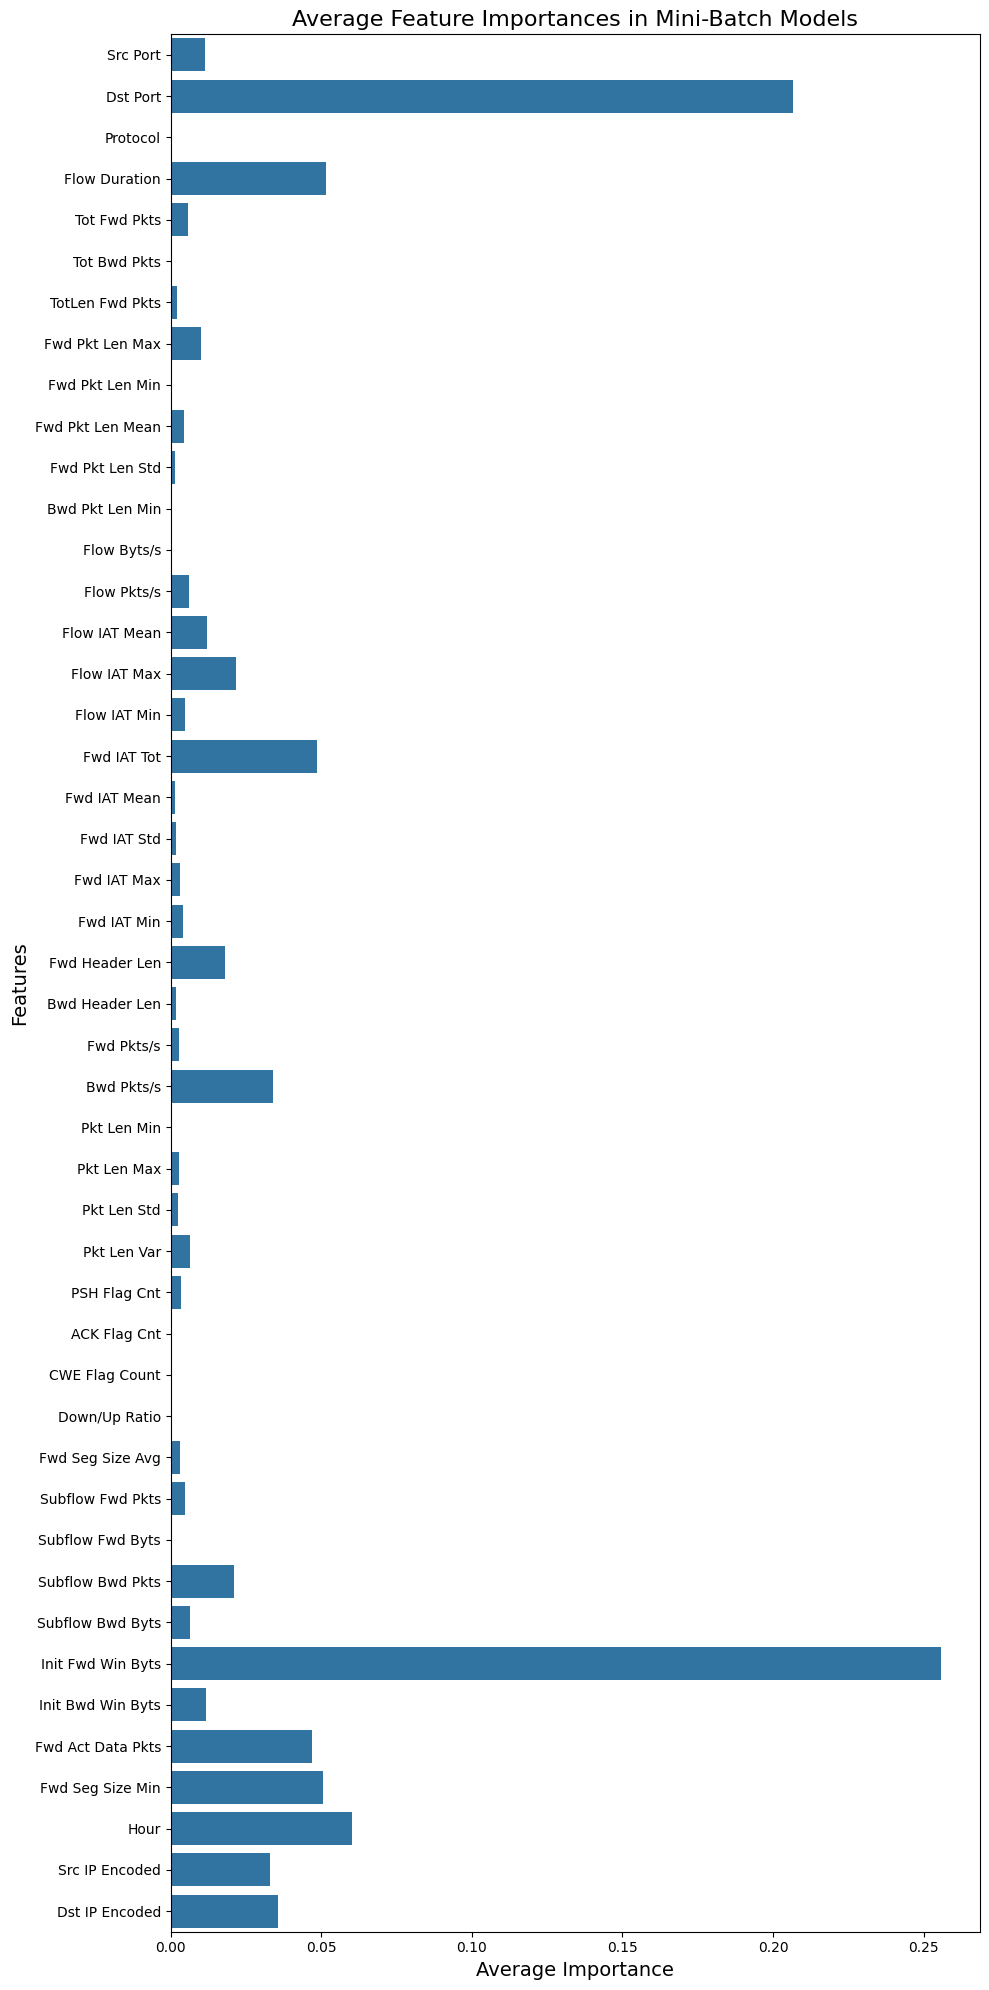

Ensemble Model Metrics:
Accuracy: 0.9999835868641767
Precision: 0.999997939991966
Recall: 0.9999696157421355
F1 Score: 0.9999837776664817
ROC AUC: 0.9999999994988863
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1896594
           1       1.00      1.00      1.00   1941795

    accuracy                           1.00   3838389
   macro avg       1.00      1.00      1.00   3838389
weighted avg       1.00      1.00      1.00   3838389

Confusion Matrix:
 [[1896590       4]
 [     59 1941736]]
Mini-batch training time: 20.67 seconds
Ensemble model evaluation time: 23.91 seconds


In [24]:
# mini batches \ ensemble model \ enhanced evaluation \ importance of features

# Function to split data into mini-batches
def batch_splitter(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

# Define the size of each mini-batch
batch_size = 650000  # 1 gb/s (ethernet port bandwidth)
num_batches = math.ceil(len(x_train) / batch_size)

# Initialize a list to store mini-batch trained models
mini_batch_models = []

# Start timing
start_time = time.time()

# Mini-batch training
print("Training on mini-batches:")
for i, (X_mini, y_mini) in enumerate(batch_splitter(x_train, y_train, batch_size)):
    # print(f"Training batch {i + 1}/{num_batches}...") # verbose training
    rf_mini = RandomForestClassifier(random_state=42, n_estimators=1, max_depth=15)  
    rf_mini.fit(X_mini, y_mini)
    mini_batch_models.append(rf_mini)

# End timing for mini-batch training
mini_batch_training_time = time.time() - start_time
print(f"Mini-batch training completed in {mini_batch_training_time:.2f} seconds.")

# Calculate average feature importances from all mini-batch models
feature_importances = np.mean([model.feature_importances_ for model in mini_batch_models], axis=0)

# Plotting the average feature importances
plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
sns.barplot(x=feature_importances, y=x_train.columns)
plt.title('Average Feature Importances in Mini-Batch Models', fontsize=16)
plt.xlabel('Average Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# Start timing for ensemble model evaluation
start_time = time.time()

# Function to aggregate predictions from all mini-batch models
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    predictions = np.array(predictions)
    final_prediction = np.mean(predictions, axis=0).round()  # Rounding for classification
    return final_prediction

# Function to aggregate probabilities from all mini-batch models for ROC AUC
def ensemble_predict_proba(models, X):
    probabilities = np.mean([model.predict_proba(X)[:, 1] for model in models], axis=0)
    return probabilities

# Evaluation of the ensemble model
ensemble_predictions = ensemble_predict(mini_batch_models, x_test)
ensemble_probabilities = ensemble_predict_proba(mini_batch_models, x_test)

# End timing for ensemble model evaluation
ensemble_evaluation_time = time.time() - start_time

# Compute evaluation metrics
accuracy = accuracy_score(y_test, ensemble_predictions)
precision = precision_score(y_test, ensemble_predictions)
recall = recall_score(y_test, ensemble_predictions)
f1 = f1_score(y_test, ensemble_predictions)
roc_auc = roc_auc_score(y_test, ensemble_probabilities)

print("Ensemble Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", classification_report(y_test, ensemble_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ensemble_predictions))

# Print overall timing information
print(f"Mini-batch training time: {mini_batch_training_time:.2f} seconds")
print(f"Ensemble model evaluation time: {ensemble_evaluation_time:.2f} seconds")

Training on mini-batches:
Training batch 1/35...
Training batch 2/35...
Training batch 3/35...
Training batch 4/35...
Training batch 5/35...
Training batch 6/35...
Training batch 7/35...
Training batch 8/35...
Training batch 9/35...
Training batch 10/35...
Training batch 11/35...
Training batch 12/35...
Training batch 13/35...
Training batch 14/35...
Training batch 15/35...
Training batch 16/35...
Training batch 17/35...
Training batch 18/35...
Training batch 19/35...
Training batch 20/35...
Training batch 21/35...
Training batch 22/35...
Training batch 23/35...
Training batch 24/35...
Training batch 25/35...
Training batch 26/35...
Training batch 27/35...
Training batch 28/35...
Training batch 29/35...
Training batch 30/35...
Training batch 31/35...
Training batch 32/35...
Training batch 33/35...
Training batch 34/35...
Training batch 35/35...
Mini-batch training completed in 3.01 seconds.


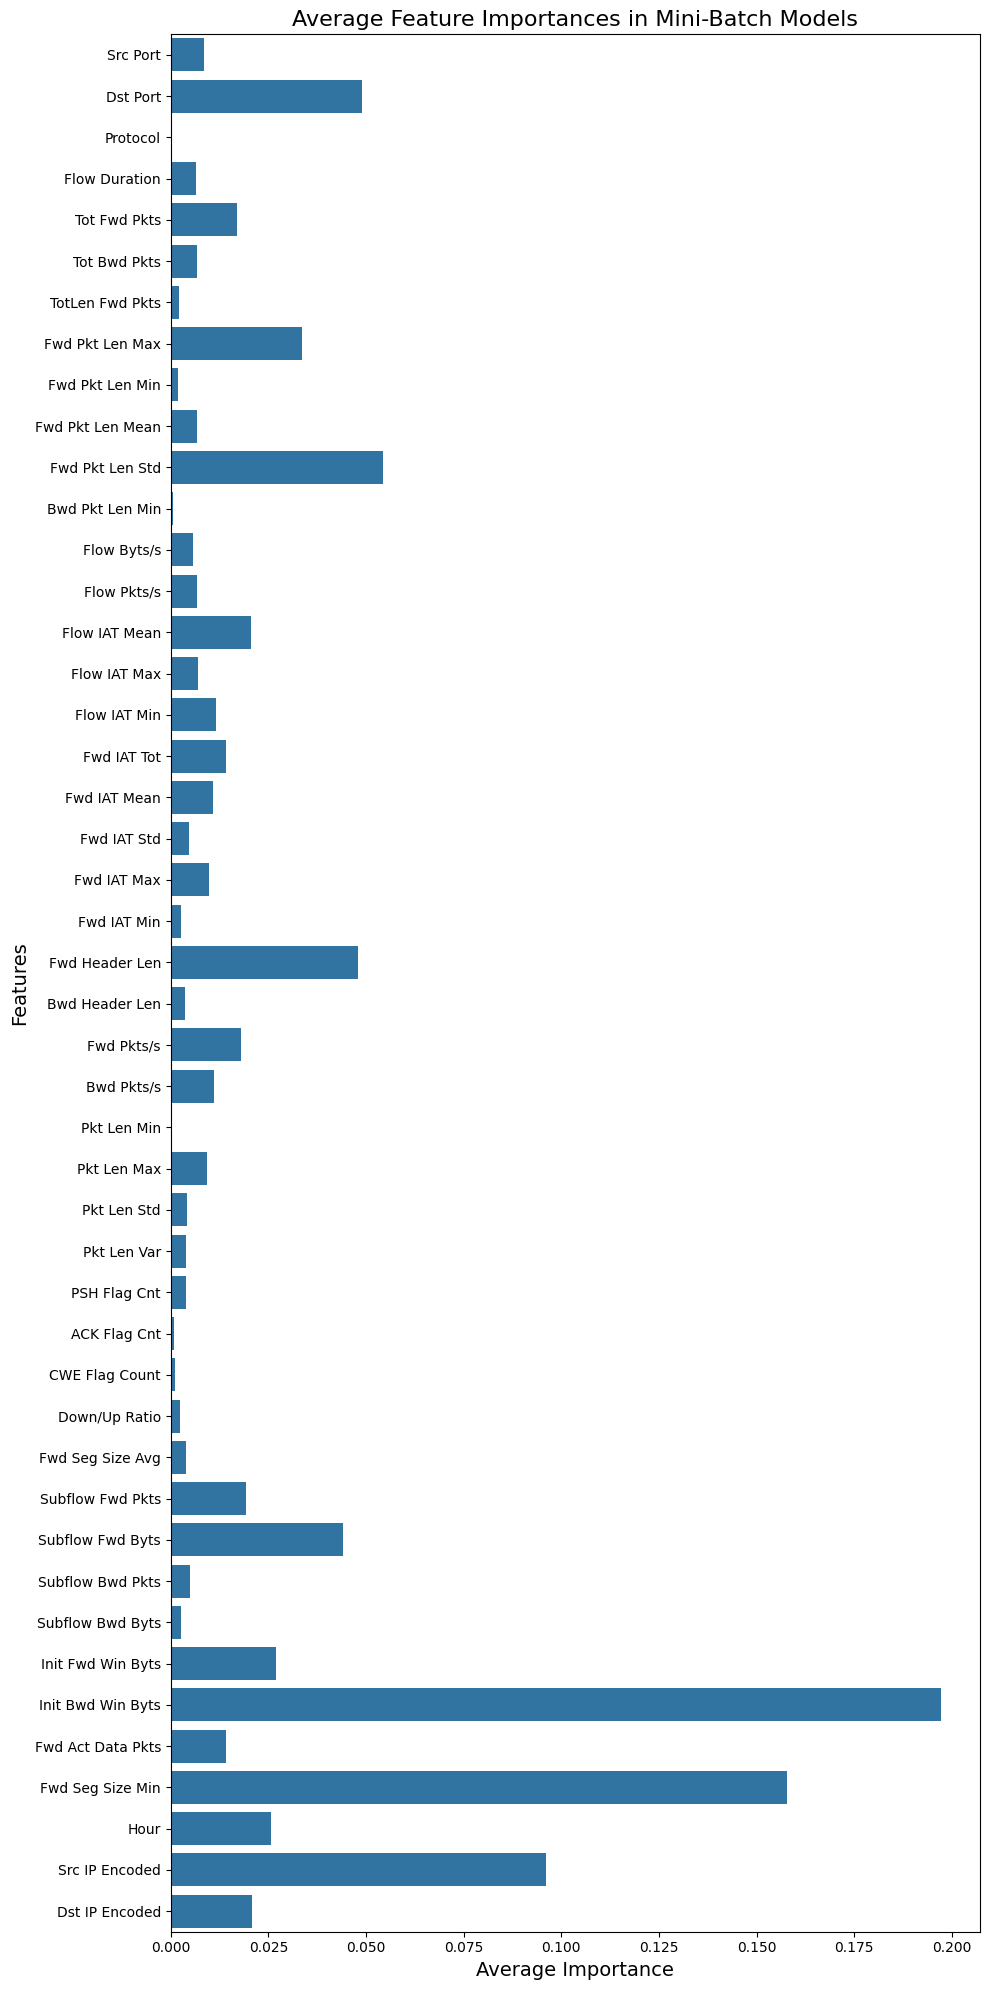

Ensemble Model Metrics:
Accuracy: 0.9991666666666666
Precision: 0.9999732902415898
Recall: 0.99836
F1 Score: 0.9991659939017474
ROC AUC: 0.9999985704888888
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     75000
           1       1.00      1.00      1.00     75000

    accuracy                           1.00    150000
   macro avg       1.00      1.00      1.00    150000
weighted avg       1.00      1.00      1.00    150000

Confusion Matrix:
 [[74998     2]
 [  123 74877]]


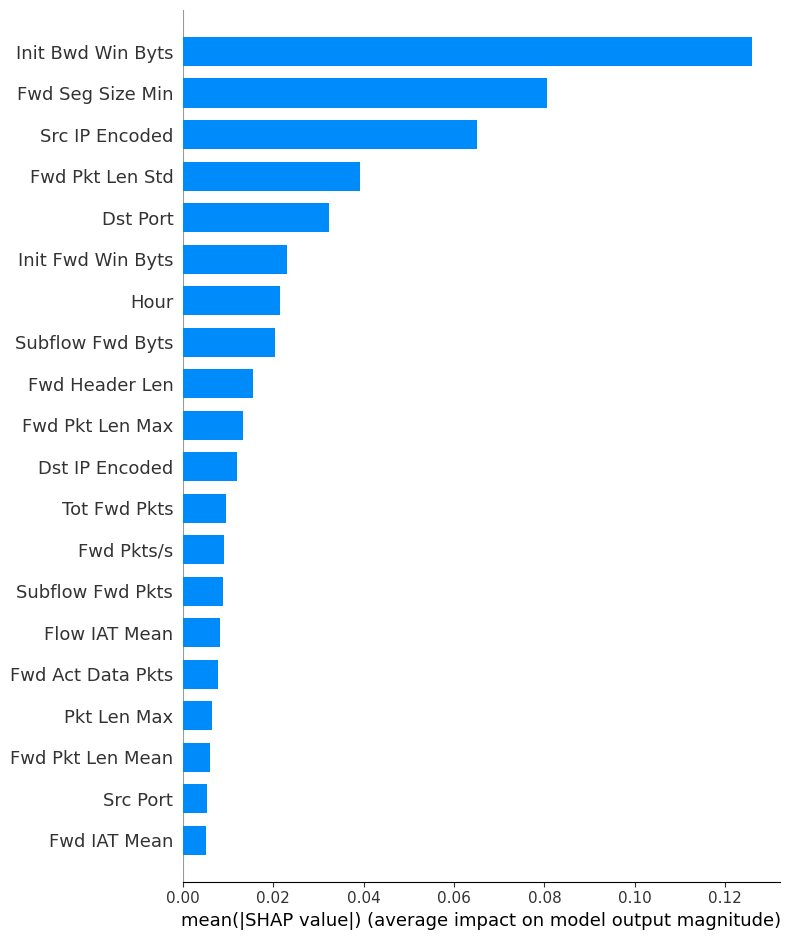

SHAP Calculation Time: 226.78 seconds
Ensemble Model Evaluation Time: 4.74 seconds
Feature Importance Calculation Time: 0.00 seconds
Total Time: 237.15 seconds


In [54]:
# Testing out mini batches ensemble model with enhanced evaluation with shap

# Record the start time
start_time = time.time()

# Function to split data into mini-batches
def batch_splitter(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        yield (X[i:i + batch_size], y[i:i + batch_size])

# Define the size of each mini-batch
batch_size = 650000  # Adjustable
num_batches = math.ceil(len(x_train) / batch_size)

# Initialize a list to store mini-batch trained models
mini_batch_models = []

# Mini-batch training
print("Training on mini-batches:")
mini_batch_training_start_time = time.time()
for i, (X_mini, y_mini) in enumerate(batch_splitter(x_train, y_train, batch_size)):
    print(f"Training batch {i + 1}/{num_batches}...")
    rf_mini = RandomForestClassifier(random_state=42, n_estimators=1, max_depth=15)  # Adjustable
    rf_mini.fit(X_mini, y_mini)
    mini_batch_models.append(rf_mini)

mini_batch_training_time = time.time() - mini_batch_training_start_time
print(f"Mini-batch training completed in {mini_batch_training_time:.2f} seconds.")

# Calculate and average feature importances from all mini-batch models
avg_feature_importances_start_time = time.time()
avg_feature_importances = np.mean([model.feature_importances_ for model in mini_batch_models], axis=0)
avg_feature_importances_time = time.time() - avg_feature_importances_start_time

# Plotting the average feature importances
plt.figure(figsize=(10, 20))  # Adjust the figure size as needed
sns.barplot(x=avg_feature_importances, y=x_train.columns)
plt.title('Average Feature Importances in Mini-Batch Models', fontsize=16)
plt.xlabel('Average Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()
plt.show()

# Function to aggregate predictions from all mini-batch models
def ensemble_predict(models, X):
    predictions = [model.predict(X) for model in models]
    predictions = np.array(predictions)
    final_prediction = np.mean(predictions, axis=0).round()  # Rounding for classification
    return final_prediction

# Function to aggregate probabilities from all mini-batch models for ROC AUC
def ensemble_predict_proba(models, X):
    probabilities = np.mean([model.predict_proba(X)[:, 1] for model in models], axis=0)
    return probabilities

# Evaluation of the ensemble model
ensemble_evaluation_start_time = time.time()
ensemble_predictions = ensemble_predict(mini_batch_models, x_test)
ensemble_probabilities = ensemble_predict_proba(mini_batch_models, x_test)

# Compute evaluation metrics
accuracy = accuracy_score(y_test, ensemble_predictions)
precision = precision_score(y_test, ensemble_predictions)
recall = recall_score(y_test, ensemble_predictions)
f1 = f1_score(y_test, ensemble_predictions)
roc_auc = roc_auc_score(y_test, ensemble_probabilities)

ensemble_evaluation_time = time.time() - ensemble_evaluation_start_time
print("Ensemble Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("Classification Report:\n", classification_report(y_test, ensemble_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, ensemble_predictions))

# SHAP Value Analysis
# Initialize a list to store SHAP values from all mini-batch models
all_shap_values = []

# Calculate SHAP values for each model in the ensemble
shap_calculation_start_time = time.time()
for model in mini_batch_models:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(x_test)
    all_shap_values.append(shap_values)

shap_calculation_time = time.time() - shap_calculation_start_time

# Average the SHAP values across all models
avg_shap_values = np.mean(all_shap_values, axis=0)

# Visualize the SHAP values (assuming binary classification, focusing on class 1)
shap.summary_plot(avg_shap_values[1], x_test, plot_type="bar")

# Calculate the total running time
total_time = time.time() - start_time

print(f"SHAP Calculation Time: {shap_calculation_time:.2f} seconds")
print(f"Ensemble Model Evaluation Time: {ensemble_evaluation_time:.2f} seconds")
print(f"Feature Importance Calculation Time: {avg_feature_importances_time:.2f} seconds")
print(f"Total Time: {total_time:.2f} seconds")

Accuracy for Fold 0: 0.9999810188203978
Fold 0 elapsed time: 99.43 seconds
Accuracy for Fold 1: 0.9999849267103159
Fold 1 elapsed time: 98.70 seconds
Accuracy for Fold 2: 0.9999860432502925
Fold 2 elapsed time: 96.21 seconds
Accuracy for Fold 3: 0.9999804605395013
Fold 3 elapsed time: 102.49 seconds
Accuracy for Fold 4: 0.9999787857286013
Fold 4 elapsed time: 99.31 seconds
Average Accuracy across all folds: 0.9999822470098216
Average Precision across all folds: 0.9999964684468106
Average Recall across all folds: 0.9999684378404767
Average F1 across all folds: 0.9999824529349471
Average Roc_auc across all folds: 0.9999998857905237
Total elapsed time: 504.04 seconds
Final Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1896594
           1       1.00      1.00      1.00   1941795

    accuracy                           1.00   3838389
   macro avg       1.00      1.00      1.00   3838389
weighted avg       

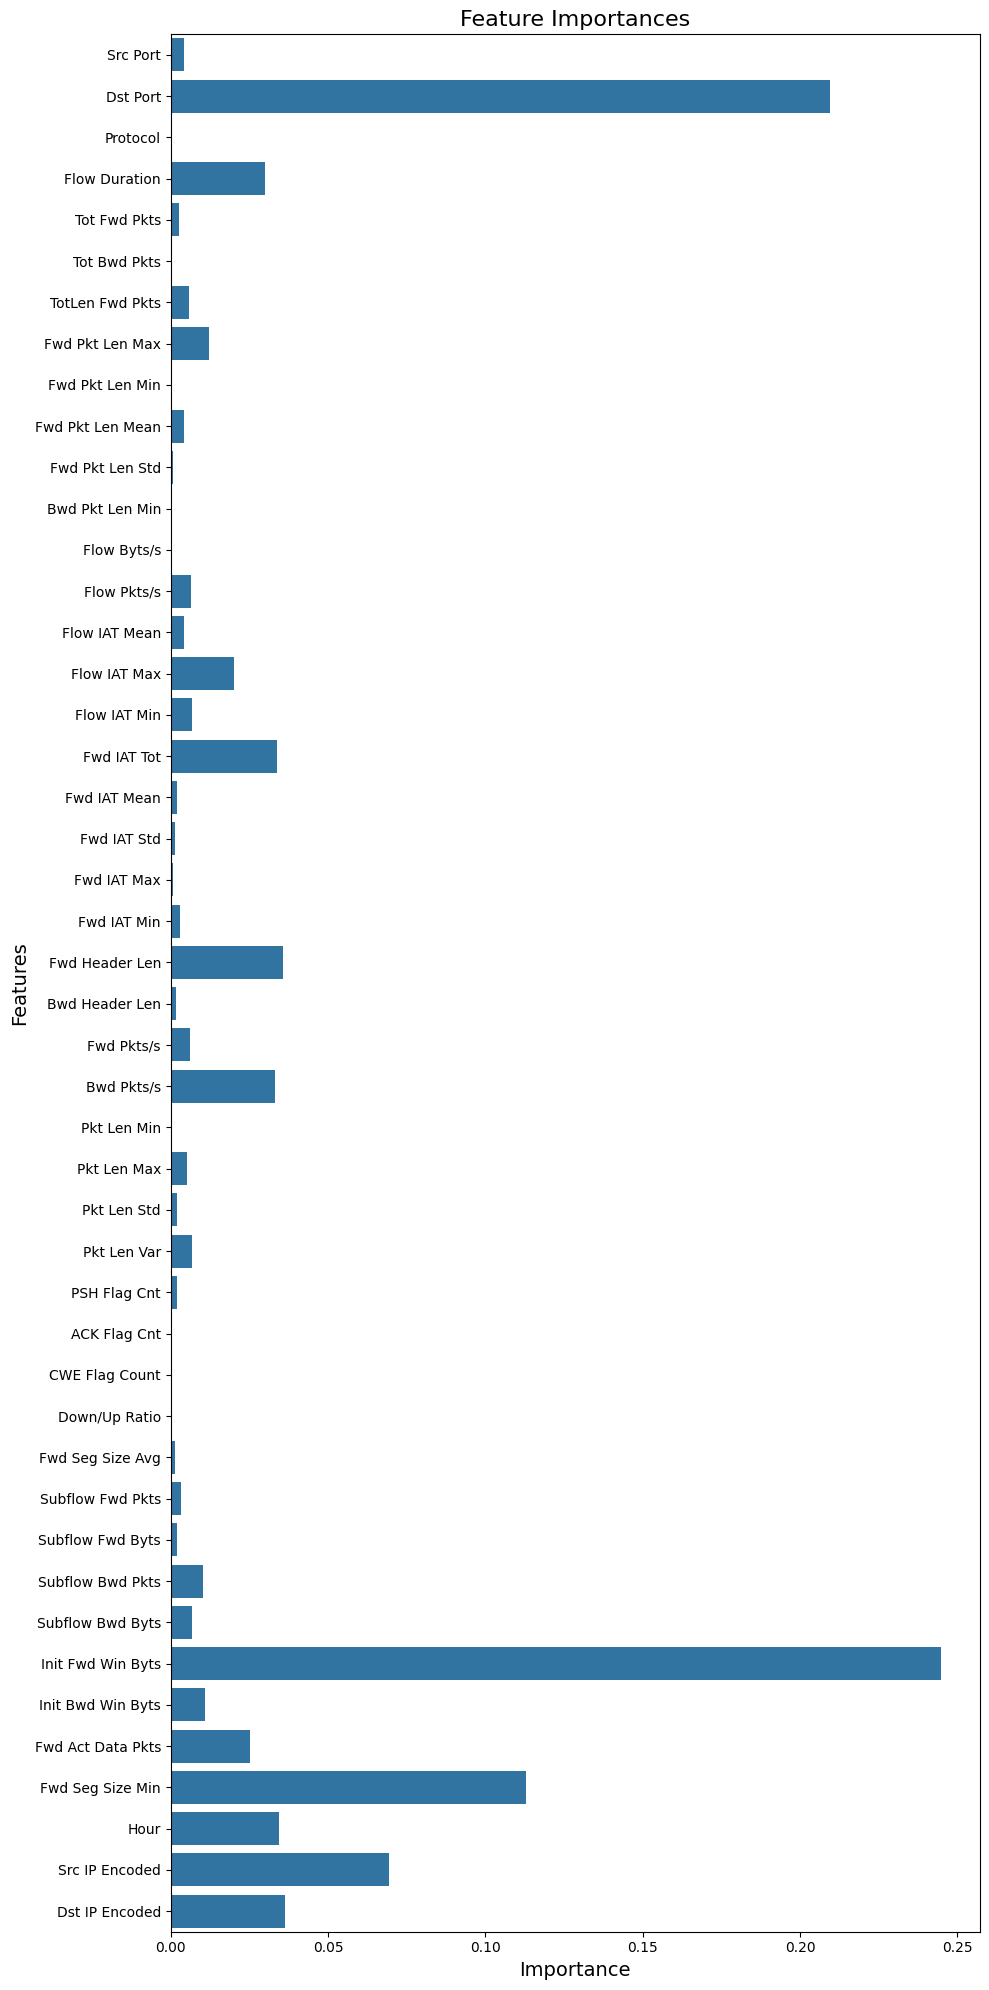

130986

In [29]:
# Folds and ensemble with mini batches model
# Define the number of folds for cross-validation and batch size

n_folds = 5 # Adjustable
batch_size = 650000  # Adjustable
kf = KFold(n_splits=n_folds)

# Function to split data into mini-batches
def batch_splitter(X, y, batch_size):
    for i in range(0, len(X), batch_size):
        X_mini = X.iloc[i:i + batch_size]
        y_mini = y.iloc[i:i + batch_size]
        if len(X_mini) != len(y_mini):
            raise ValueError(f"Batch size mismatch: X_mini length: {len(X_mini)}, y_mini length: {len(y_mini)}")
        yield X_mini, y_mini


def ensemble_predict(models, X):
    # Collect predictions from each model
    predictions = [model.predict(X) for model in models]

    # Convert list of predictions to a numpy array for easier manipulation
    predictions = np.array(predictions)

    # Use majority voting for the final prediction
    # For each sample, find the mode (most frequent class) across model predictions
    # The mode function is more efficient for finding the most frequent class
    final_predictions, _ = mode(predictions, axis=0)

    # The mode function returns a 2D array, so we need to reshape it to 1D
    return final_predictions.reshape(-1)


# Function to perform ensemble predictions for probabilities
def ensemble_predict_proba(models, X):
    # Average the probabilities from all models
    probabilities = np.mean([model.predict_proba(X) for model in models], axis=0)
    return probabilities


# Function to calculate additional metrics
def evaluate_metrics(y_true, y_pred, y_prob):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_prob)
    return precision, recall, f1, roc_auc

# Enhanced train and evaluate function with feature importance integration
def train_evaluate_on_fold(X_train_fold, y_train_fold, X_test_fold, y_test_fold):
    mini_batch_models = []
    feature_importance_accumulator = []  
    num_batches = np.ceil(len(X_train_fold) / batch_size).astype(int)

    for i, (X_mini, y_mini) in enumerate(batch_splitter(X_train_fold, y_train_fold, batch_size)):
        rf_mini = RandomForestClassifier(random_state=42, n_estimators=1, max_depth=15)  # Adjustable
        rf_mini.fit(X_mini, y_mini)
        mini_batch_models.append(rf_mini)
        feature_importance_accumulator.append(rf_mini.feature_importances_)

    # Aggregation and evaluation logic
    ensemble_predictions = ensemble_predict(mini_batch_models, X_test_fold)
    ensemble_probabilities = ensemble_predict_proba(mini_batch_models, X_test_fold)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test_fold, ensemble_predictions)
    precision, recall, f1, roc_auc = evaluate_metrics(y_test_fold, ensemble_predictions, ensemble_probabilities[:, 1])

    # Calculate mean feature importance
    mean_feature_importance = np.mean(feature_importance_accumulator, axis=0)

    return accuracy, precision, recall, f1, roc_auc, mini_batch_models, mean_feature_importance

# Record the start time
start_time = time.time()

# Main loop to process folds
all_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
all_feature_importances = []
ensemble_predictions_list = []  # To store predictions of each fold
ensemble_probabilities_list = []  # To store probabilities of each fold

for fold, (train_index, test_index) in enumerate(kf.split(x_train)):
    # Fold processing logic
    X_train_fold, X_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Record the start time for this fold
    fold_start_time = time.time()

    accuracy, precision, recall, f1, roc_auc, fold_models, fold_feature_importances = train_evaluate_on_fold(X_train_fold, y_train_fold, X_test_fold, y_test_fold)
    
    # Print accuracy for current fold
    print(f"Accuracy for Fold {fold}: {accuracy}")
    
    all_feature_importances.append(fold_feature_importances)
    all_metrics['accuracy'].append(accuracy)
    all_metrics['precision'].append(precision)
    all_metrics['recall'].append(recall)
    all_metrics['f1'].append(f1)
    all_metrics['roc_auc'].append(roc_auc)
    # Store predictions and probabilities
    ensemble_predictions_list.append(ensemble_predict(fold_models, X_test_fold))
    ensemble_probabilities_list.append(ensemble_predict_proba(fold_models, X_test_fold))

    # Calculate and print the time taken for this fold
    fold_end_time = time.time()
    fold_elapsed_time = fold_end_time - fold_start_time
    print(f"Fold {fold} elapsed time: {fold_elapsed_time:.2f} seconds")

# Calculate and display average performance across folds
for metric in all_metrics:
    average = np.mean(all_metrics[metric])
    print(f"Average {metric.capitalize()} across all folds: {average}")

# Calculate and print the total running time
end_time = time.time()
total_elapsed_time = end_time - start_time
print(f"Total elapsed time: {total_elapsed_time:.2f} seconds")

# Train the final model on the entire training set
final_model = RandomForestClassifier(random_state=42, n_estimators=1, max_depth=15) # Adjustable
final_model.fit(x_train, y_train)

# Make predictions on the separate test set
final_test_predictions = final_model.predict(x_test) 

# Evaluate these predictions against y_test
print("Final Model Classification Report:\n", classification_report(y_test, final_test_predictions))
print("Final Model Confusion Matrix:\n", confusion_matrix(y_test, final_test_predictions))

# Calculate the accuracy, precision, recall, F1-score, and ROC AUC of the final model on the test set
final_test_accuracy = accuracy_score(y_test, final_test_predictions)
precision = precision_score(y_test, final_test_predictions)
recall = recall_score(y_test, final_test_predictions)
f1 = f1_score(y_test, final_test_predictions)
roc_auc = roc_auc_score(y_test, final_test_predictions)

# Print the results
print("Final Model Accuracy:", final_test_accuracy)
print("Final Model Precision:", precision)
print("Final Model Recall:", recall)
print("Final Model F1-Score:", f1)
print("Final Model ROC AUC:", roc_auc)

# Feature Importance Plotting
mean_feature_importances = np.mean(all_feature_importances, axis=0)

# Set the size of the plot
plt.figure(figsize=(10, 20)) 

# Create a barplot with vertical bars
sns.barplot(x=mean_feature_importances, y=x_train.columns)

# Set title and labels with a larger font if needed
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjusts plot parameters for better layout
plt.show()

# Memory cleanup
del all_feature_importances, ensemble_predictions_list, ensemble_probabilities_list
gc.collect()  # Trigger garbage collection

Average Accuracy across all folds: 0.9979142857142855
Average Precision across all folds: 0.9999422632794458
Average Recall across all folds: 0.9958846813569593
Average F1 across all folds: 0.9979092199940831
Average Roc_auc across all folds: 0.9999908730693832
Final Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7500
           1       1.00      1.00      1.00      7500

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Final Model Confusion Matrix:
 [[7499    1]
 [   4 7496]]
Features considered for dropping (less than 3% of the max importance):
Index(['TotLen Bwd Pkts', 'Bwd Pkt Len Max', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow IAT Std', 'Bwd IAT Tot', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Pkt Len Mean',

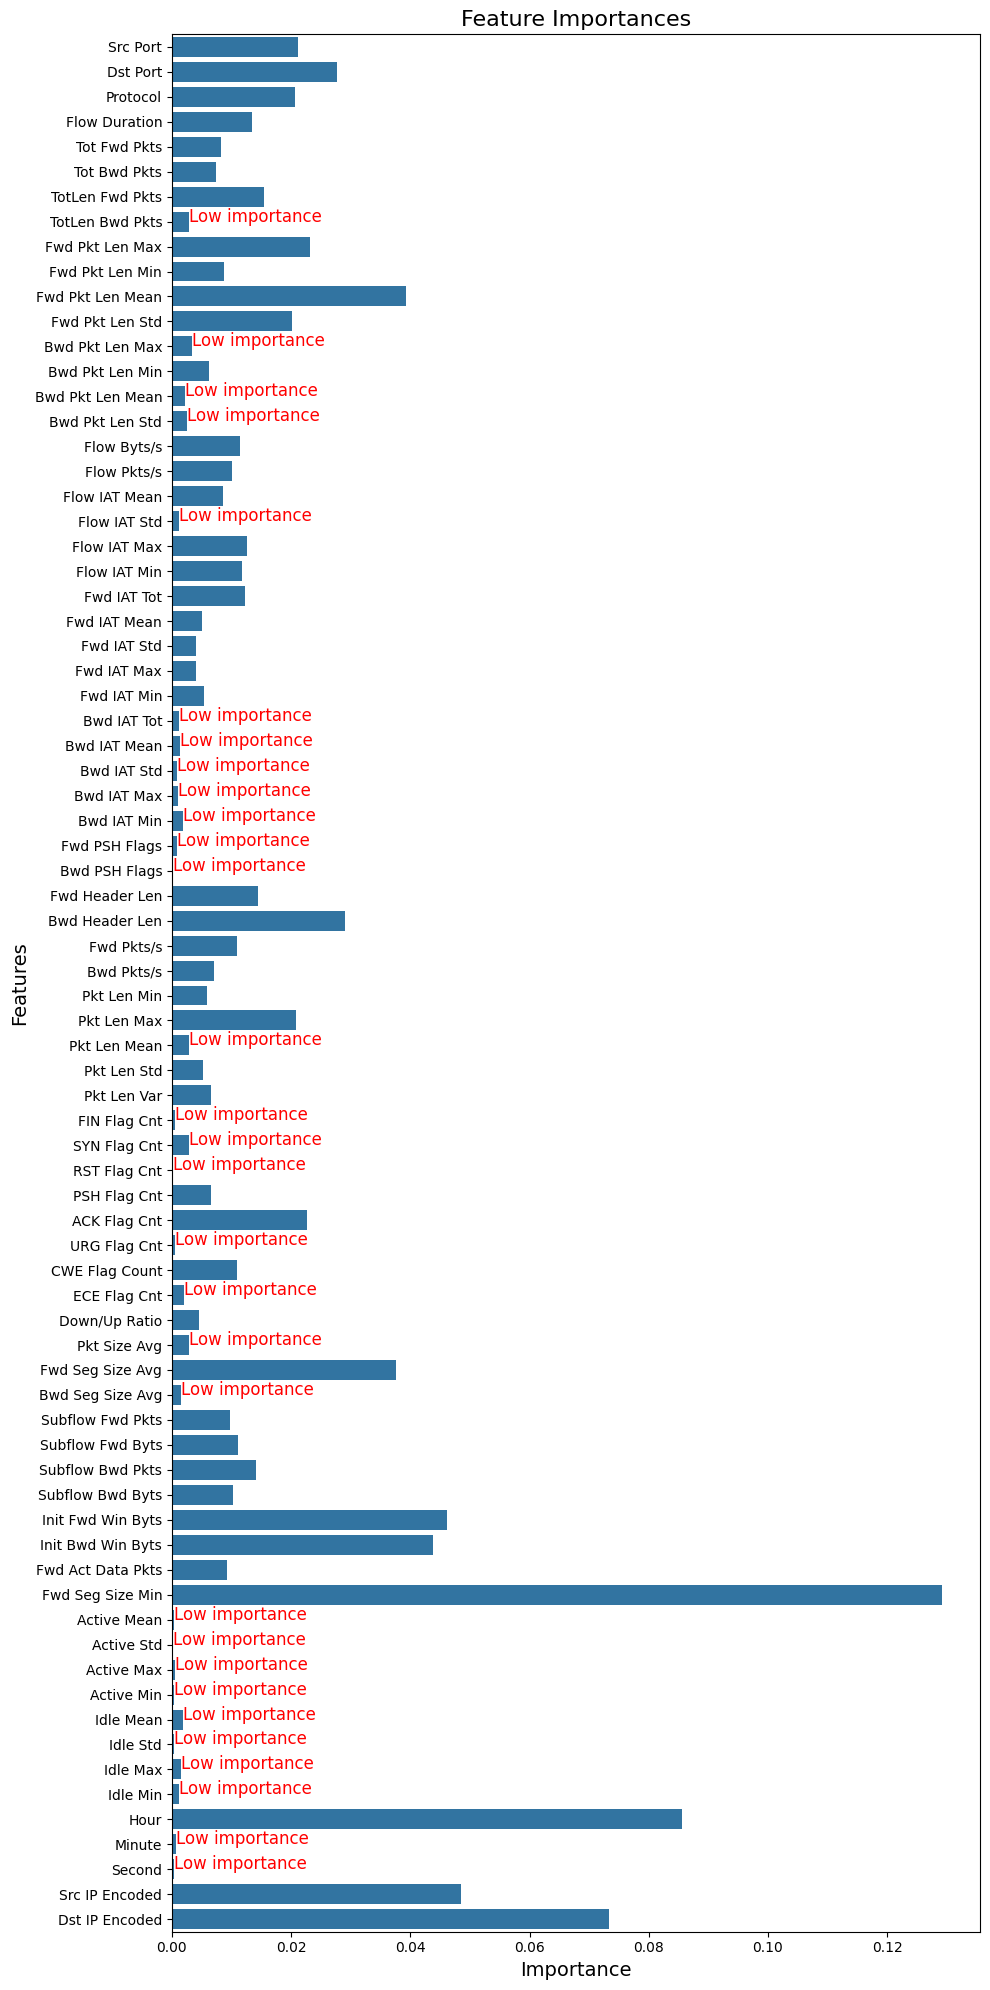

In [34]:
# Calculate and display average performance across folds
for metric in all_metrics:
    average = np.mean(all_metrics[metric])
    print(f"Average {metric.capitalize()} across all folds: {average}")

# Use final_ensemble_predictions for final classification report and confusion matrix
print("Final Model Classification Report:\n", classification_report(y_test, final_test_predictions))
print("Final Model Confusion Matrix:\n", confusion_matrix(y_test, final_test_predictions))

# Use mean_feature_importances calculated earlier
# mean_feature_importances = np.mean(all_feature_importances, axis=0)

# Find the maximum feature importance
max_importance = np.max(mean_feature_importances)

# Calculate the threshold as 3% of the maximum importance
threshold = 0.03 * max_importance

# Identify features with importance less than or equal to the threshold
low_importance_features = x_train.columns[mean_feature_importances <= threshold]

# Print the features considered for dropping
print("Features considered for dropping (less than 3% of the max importance):")
print(low_importance_features)

# Set the size of the plot
plt.figure(figsize=(10, 20))  

# Create a barplot with vertical bars
sns.barplot(x=mean_feature_importances, y=x_train.columns)

# Highlight features with low importance
for i, feature in enumerate(x_train.columns):
    if mean_feature_importances[i] <= threshold:
        plt.text(mean_feature_importances[i], i, 'Low importance', color='red', fontsize=12)

# Set title and labels with a larger font if needed
plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show the plot
plt.tight_layout()  # Adjusts plot parameters for better layout
plt.show()

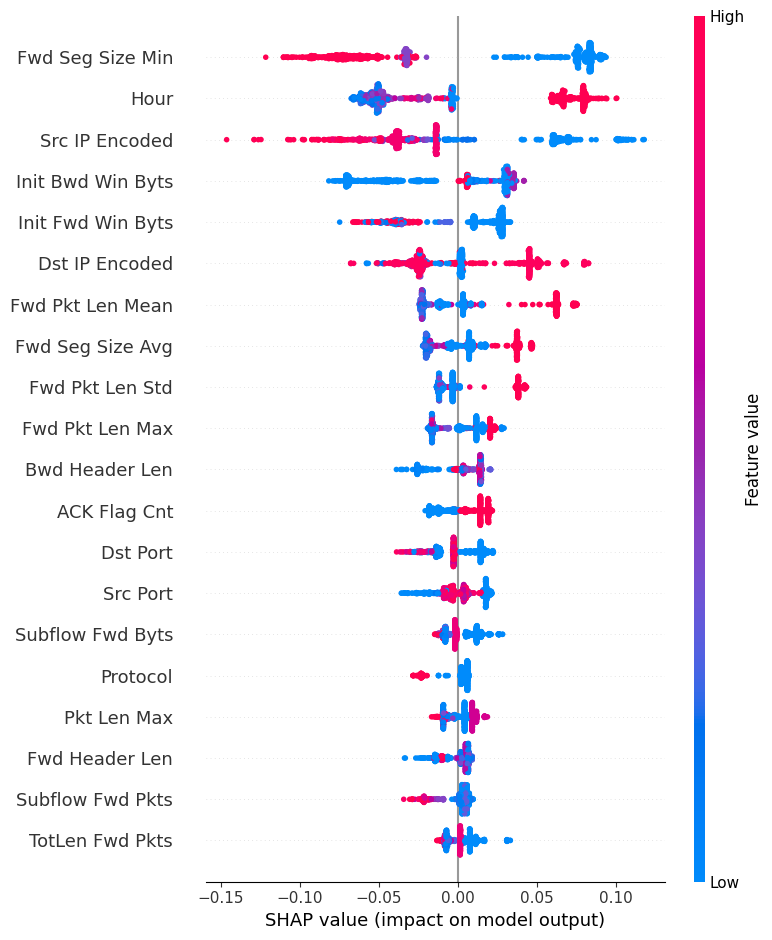

In [30]:
import shap


X_sample = x_train.sample(n=1000, random_state=42)  # Adjustable

# Initialize an array to store SHAP values
shap_values = np.zeros((len(X_sample), len(x_train.columns)))

for model in all_models:
    explainer = shap.TreeExplainer(model)
    shap_values += explainer.shap_values(X_sample)[1]  # For binary classification, used index 1 for positive class

# Average the SHAP values
shap_values /= len(all_models)

# Now shap_values contains the average SHAP values for each feature across all models
shap.summary_plot(shap_values, X_sample)


In [14]:
# Neural Network model
# Building the Neural Network Model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Training the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype("int32")  # Converting probabilities to binary output

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred))



Epoch 1/10


1094/1094 [==============================] - 2s 924us/step - loss: 0.0286 - accuracy: 0.9926
Epoch 2/10
1094/1094 [==============================] - 1s 906us/step - loss: 0.0062 - accuracy: 0.9979
Epoch 3/10
1094/1094 [==============================] - 1s 902us/step - loss: 0.0050 - accuracy: 0.9983
Epoch 4/10
1094/1094 [==============================] - 1s 895us/step - loss: 0.0043 - accuracy: 0.9987
Epoch 5/10
1094/1094 [==============================] - 1s 925us/step - loss: 0.0039 - accuracy: 0.9987
Epoch 6/10
1094/1094 [==============================] - 1s 905us/step - loss: 0.0033 - accuracy: 0.9989
Epoch 7/10
1094/1094 [==============================] - 1s 918us/step - loss: 0.0028 - accuracy: 0.9990
Epoch 8/10
1094/1094 [==============================] - 1s 919us/step - loss: 0.0024 - accuracy: 0.9991
Epoch 9/10
1094/1094 [==============================] - 1s 902us/step - loss: 0.0027 - accuracy: 0.9992
Epoch 10/10
469/469 [==============================] - 0s 74

Feature ranking:
1. Feature Label_encoded (0.23560667037963867)
2. Feature Src Port (0.18074666261672973)
3. Feature Src IP Encoded (0.0980733335018158)
4. Feature Fwd Seg Size Min (0.09134001135826111)
5. Feature ACK Flag Cnt (0.08590000867843628)
6. Feature Hour (0.06346666812896729)
7. Feature CWE Flag Count (0.046580010652542116)
8. Feature Dst Port (0.043353337049484256)
9. Feature ECE Flag Cnt (0.009886670112609863)
10. Feature Init Bwd Win Byts (0.009293341636657714)
11. Feature Minute (0.003913336992263794)
12. Feature Fwd PSH Flags (0.003453350067138672)
13. Feature SYN Flag Cnt (0.00208667516708374)
14. Feature Bwd IAT Tot (0.000580000877380371)
15. Feature PSH Flag Cnt (0.0005400002002716065)
16. Feature RST Flag Cnt (0.0002533555030822754)
17. Feature Fwd IAT Tot (0.000153350830078125)
18. Feature FIN Flag Cnt (0.00014667510986328126)
19. Feature Init Fwd Win Byts (0.0001333475112915039)
20. Feature Second (0.00011335015296936035)
21. Feature Fwd Pkt Len Max (7.334351539611

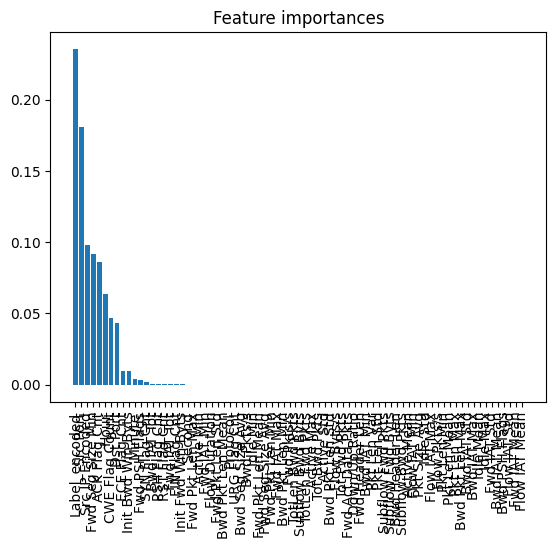

In [15]:
feature_names = df.columns.tolist()

def custom_scoring(estimator, X, y):
    loss, accuracy = estimator.evaluate(X, y, verbose=0)
    return accuracy  # or return -loss if you want to use loss as the metric

# Compute the permutation feature importance
perm_importance = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42, n_jobs=-1, scoring=custom_scoring)
# Get the importances and the corresponding feature names
importances = perm_importance.importances_mean
feature_names = np.array(feature_names)  

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Display the feature importances
print("Feature ranking:")
for i in range(x_test.shape[1]):
    print(f"{i + 1}. Feature {feature_names[indices[i]]} ({importances[indices[i]]})")
import matplotlib.pyplot as plt

plt.figure()
plt.title("Feature importances")
plt.bar(range(x_test.shape[1]), importances[indices])
plt.xticks(range(x_test.shape[1]), feature_names[indices], rotation=90)
plt.show()


In [18]:
# Neural Network model 2 ()
# Building the Neural Network Model
# Start time
start_time = time.time()

# Building the Neural Network Model
model = keras.Sequential([
    Dense(32, input_shape=(x_train.shape[1],)),
    Activation('relu'),
    
    Dense(1, activation='sigmoid')
])

# Training the Model
training_start_time = time.time()  # Start time for training
model.compile(optimizer=Adam(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=2048,
    verbose=1,
    validation_split=0.2
)
training_end_time = time.time()  # End time for training
training_time = training_end_time - training_start_time

# Model Evaluation
evaluation_start_time = time.time()  # Start time for evaluation
loss, accuracy = model.evaluate(x_test, y_test)
evaluation_end_time = time.time()  # End time for evaluation
evaluation_time = evaluation_end_time - evaluation_start_time

# Predictions
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype("int32") 

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred))

print("Recall Score:")
print(recall_score(y_test, y_pred_binary))

print("Test Accuracy:", accuracy)

# Print time measurements at the end
print("Training Time:", training_time, "seconds")
print("Evaluation Time:", evaluation_time, "seconds")

# End time
end_time = time.time()

# Calculate the overall time taken
overall_time = end_time - start_time
print("Overall Time Taken:", overall_time, "seconds")

Epoch 1/10
14/14 [==============================] - 2s 102ms/step - loss: 0.1697 - accuracy: 0.9273 - val_loss: 0.0357 - val_accuracy: 0.9913
Epoch 2/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9909 - val_loss: 0.0223 - val_accuracy: 0.9957
Epoch 3/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9948 - val_loss: 0.0165 - val_accuracy: 0.9961
Epoch 4/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0154 - val_accuracy: 0.9970
Epoch 5/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0124 - val_accuracy: 0.9969
Epoch 6/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0118 - val_accuracy: 0.9979
Epoch 7/10
14/14 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 0.0153 - val_accuracy: 0.9973
Epoch 8/10
14/14 [

In [16]:
# Neural Network model \ batch normalization
# Building the Neural Network Model

model = keras.Sequential([
    Dense(128, input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    Activation('relu'),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),

    Dense(32),
    BatchNormalization(),
    Activation('relu'),

    Dense(1, activation='sigmoid')
])

# Training the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", accuracy)

# Predictions
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype("int32")  # Converting probabilities to binary output

# Evaluation Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred))


Epoch 1/10
1094/1094 [==============================] - 6s 3ms/step - loss: 0.0336 - accuracy: 0.9912
Epoch 2/10
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 3/10
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0059 - accuracy: 0.9981
Epoch 4/10
1094/1094 [==============================] - 4s 3ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 5/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0045 - accuracy: 0.9985
Epoch 6/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0051 - accuracy: 0.9983
Epoch 7/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 8/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0036 - accuracy: 0.9990
Epoch 9/10
1094/1094 [==============================] - 4s 4ms/step - loss: 0.0033 - accuracy: 0.9988
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0051 

In [18]:
# SVM Model
start_time = time.time()

svm_model = SVC(C=4000.0, kernel='rbf', gamma=0.8 , probability=True, cache_size=3000) # Normalization and Standardization are both good options but normalization with very high c is better

training_start_time = time.time()
svm_model.fit(x_train, y_train)
training_end_time = time.time()
training_time = training_end_time - training_start_time

evaluation_start_time = time.time()
y_pred = svm_model.predict(x_test)
evaluation_end_time = time.time()
evaluation_time = evaluation_end_time - evaluation_start_time

y_pred_binary = (y_pred > 0.5).astype("int32")

print("Classification Report:")
print(classification_report(y_test, y_pred_binary))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
y_pred_proba = svm_model.predict_proba(x_test)[:, 1]
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_binary) * 100)
print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba) * 100)
print("Recall Score:")
print(recall_score(y_test, y_pred_binary))

print("Training Time:", training_time, "seconds")
print("Evaluation Time:", evaluation_time, "seconds")

end_time = time.time()
overall_time = end_time - start_time
print("Overall Time Taken:", overall_time, "seconds")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7500
           1       1.00      1.00      1.00      7500

    accuracy                           1.00     15000
   macro avg       1.00      1.00      1.00     15000
weighted avg       1.00      1.00      1.00     15000

Confusion Matrix:
[[7490   10]
 [   9 7491]]
Accuracy Score:
99.87333333333333
ROC-AUC Score:
99.95839644444445
Recall Score:
0.9988
Training Time: 21.95393180847168 seconds
Evaluation Time: 0.14616918563842773 seconds
Overall Time Taken: 22.2907555103302 seconds


In [17]:
# Light Gradient Boosting model (much more optimized than SGB and uses histogram based splitting which makes it suitable for large datasets)
# Start time for the whole process
start_time = time.time()

# Prepare the datasets
train_data = lgb.Dataset(x_train, label=y_train)
test_data = lgb.Dataset(x_test, label=y_test, reference=train_data)

# LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.8,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_col_wise': True
}

# Training the model with early stopping
training_start_time = time.time()
num_boost_round = 1000  # Set a high number for num_boost_round and let early stopping decide the optimal number
lgbm_model = lgb.train(
    params,
    train_data,
    num_boost_round=num_boost_round,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=3)]
)
training_end_time = time.time()
training_time = training_end_time - training_start_time

# Evaluation
evaluation_start_time = time.time()
y_pred_proba = lgbm_model.predict(x_test)
y_pred_binary = (y_pred_proba > 0.5).astype("int32")
evaluation_end_time = time.time()
evaluation_time = evaluation_end_time - evaluation_start_time

# Metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_binary) * 100)

print("ROC-AUC Score:")
print(roc_auc_score(y_test, y_pred_proba) * 100)

print("Recall Score:")
print(recall_score(y_test, y_pred_binary)* 100)

print("Training Time:", training_time, "seconds")
print("Evaluation Time:", evaluation_time, "seconds")

# Overall time
end_time = time.time()
overall_time = end_time - start_time
print("Overall Time Taken:", overall_time, "seconds")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4530852, number of negative: 4425386
[LightGBM] [Info] Total Bins 9179
[LightGBM] [Info] Number of data points in the train set: 8956238, number of used features: 46
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505888 -> initscore=0.023552
[LightGBM] [Info] Start training from score 0.023552
Training until validation scores don't improve for 3 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

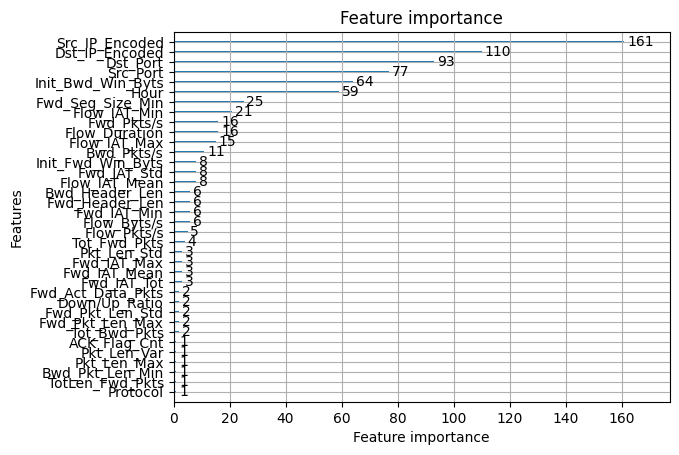

In [43]:
# Plotting feature importances
lgb.plot_importance(lgbm_model, max_num_features=45)
plt.show()

In [19]:
# cross validation for GBM
# Define parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',  # Changed to 'auc' for consistency with cv_results evaluation
    'num_leaves': 31,
    'learning_rate': 0.8,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'force_col_wise': True
}

# Number of folds for CV
nfold = 5

# Perform the cross-validation with specified parameters
cv_results = lgb.cv(
    params, 
    train_data, 
    num_boost_round=100, 
    nfold=nfold, 
    callbacks=[lgb.early_stopping(stopping_rounds=10)], 
    metrics='auc', 
    seed=42
)

# Output the average performance metric
# print("CV ACC Score: {:.4f} with std: {:.4f}".format(np.mean(cv_results['accuracy']), np.std(cv_results['accuracy']))) # not working, cba to look into it
print(cv_results)


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505888 -> initscore=0.023553
[LightGBM] [Info] Start training from score 0.023553
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505888 -> initscore=0.023552
[LightGBM] [Info] Start training from score 0.023552
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505888 -> initscore=0.023552
[LightGBM] [Info] Start training from score 0.023552
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505888 -> initscore=0.023553
[LightGBM] [Info] Start training from score 0.023553
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505888 -> initscore=0.023553
[LightGBM] [Info] Start training from score 0.023553
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[7]	cv_agg's valid auc: 1 + 0
{'valid auc-mean': [0.9996874256636648, 0.9999997545769697, 0.9999997745055058, 0.9999999998039975, 0.9999999999119733, 0.9999999999960101, 1.0], 'valid auc-stdv': [0.0003207971164788446, 4.4763130870076664e-07, 4.